In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train_spam.csv')
test = pd.read_csv('test_spam.csv')

## Посмотрим на данные
По сути, кроме текста ничего нет, так что надов весь анализ делать только по нему

In [3]:
train

,text_type,text
0,ham,make sure alex knows his birthday is over in f...
1,ham,a resume for john lavorato thanks vince i will...
2,spam,plzz visit my website moviesgodml to get all m...
3,spam,urgent your mobile number has been awarded wit...
4,ham,overview of hr associates analyst project per ...
...,...,...
16273,spam,if you are interested in binary options tradin...
16274,spam,dirty pictureblyk on aircel thanks you for bei...
16275,ham,or you could do this g on mon 1635465 sep 1635...
16276,ham,insta reels par 80 गंद bhara pada hai 👀 kuch b...


In [4]:
test

,text
0,j jim whitehead ejw cse ucsc edu writes j you ...
1,original message from bitbitch magnesium net p...
2,java for managers vince durasoft who just taug...
3,there is a youtuber name saiman says
4,underpriced issue with high return on equity t...
...,...
4065,husband to wifetum meri zindagi hoorwifeor kya...
4066,baylor enron case study cindy yes i shall co a...
4067,boring as compared to tp
4068,hellogorgeous hows u my fone was on charge lst...


### Посмотриим на распределение длины мейла относительно всего датасета и таргета
Видно что распределения отличаются. В длинна сообщений в спаме в среднем выше чем в не спаме

In [5]:
train['len'] = train['text'].apply(len)

<AxesSubplot:ylabel='Frequency'>

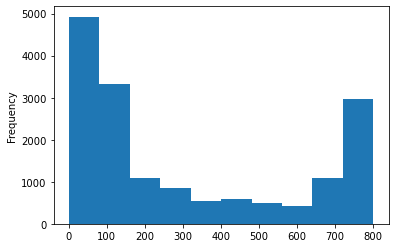

In [6]:
train['len'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

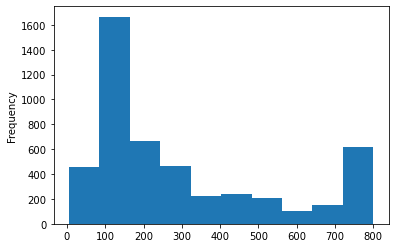

In [7]:
train[train['text_type'] == 'spam']['len'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

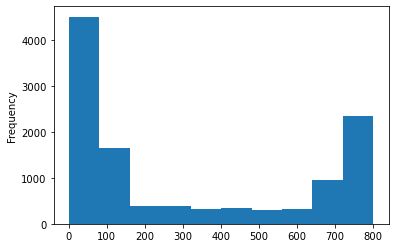

In [8]:
train[train['text_type'] == 'ham']['len'].plot(kind='hist')

In [9]:
print(f"Mean length : {train['len'].mean()}")
print(f"Median length : {train['len'].median()}")
print()
print(f"Mean length on spam: {train[train['text_type'] == 'spam']['len'].mean()}")
print(f"Median length on spam: {train[train['text_type'] == 'spam']['len'].median()}")
print()
print(f"Mean length on ham: {train[train['text_type'] == 'ham']['len'].mean()}")
print(f"Median length on ham: {train[train['text_type'] == 'ham']['len'].median()}")

Mean length : 310.3835237744195
Median length : 157.0

Mean length on spam: 301.35724682886257
Median length on spam: 195.0

Mean length on ham: 314.168279710524
Median length on ham: 141.0


### Посчитаем количество эмодзи в тексте и сравним.
Видно, что в спаме гораздо чаще попадаются эмодзи. При очисти данных надо учесть это и не удалять эмодзи.

In [10]:
# !pip install emoji==1.7
from emoji import UNICODE_EMOJI

In [11]:
def count_emoji(string):
    n_emojis = 0
    for ch in string:
        n_emojis += ch in UNICODE_EMOJI['en']
    return n_emojis

In [12]:
train['n_emojis'] = train['text'].apply(count_emoji)

In [13]:
# 0.7% из не-спама содержат эмодзи
train[train['text_type'] == 'ham']['n_emojis'].value_counts()[1:].sum() / len(train[train['text_type'] == 'ham'])

0.007062516348417473

In [14]:
# 27.5% спама содержат смайлы
train[train['text_type'] == 'spam']['n_emojis'].value_counts()[1:].sum() / len(train[train['text_type'] == 'spam'])

0.27510917030567683

### Препроцессим данные.
Пайплайн: tokenize -> lowercase -> remove punctuation -> remove stop words -> lemmatization

In [15]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dinislam\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Dinislam\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [16]:
import nltk
import string

def preprocess_text(sent):
    # Tokenize sentence
    tokens = nltk.word_tokenize(sent)
    # Lowercase
    tokens = [token.lower().strip() for token in tokens]
    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]
    # Rrmove stopwords
    stopwords = nltk.corpus.stopwords.words("english")
    tokens = [token for token in tokens if token not in stopwords]
    # Create lemmatizer
    lemmatizer = nltk.stem.WordNetLemmatizer()
    # lemmatize each token
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Join tokens to text
    tokens = ' '.join(tokens)
    return tokens

In [17]:
train['preprocessed'] = train['text'].apply(preprocess_text)

In [18]:
train

,text_type,text,len,n_emojis,preprocessed
0,ham,make sure alex knows his birthday is over in f...,86,0,make sure alex know birthday fifteen minute fa...
1,ham,a resume for john lavorato thanks vince i will...,520,0,resume john lavorato thanks vince get moving r...
2,spam,plzz visit my website moviesgodml to get all m...,126,5,plzz visit website moviesgodml get movie free ...
3,spam,urgent your mobile number has been awarded wit...,139,0,urgent mobile number awarded £2000 prize guara...
4,ham,overview of hr associates analyst project per ...,733,0,overview hr associate analyst project per davi...
...,...,...,...,...,...
16273,spam,if you are interested in binary options tradin...,114,0,interested binary option trading may continue ...
16274,spam,dirty pictureblyk on aircel thanks you for bei...,454,0,dirty pictureblyk aircel thanks valued member ...
16275,ham,or you could do this g on mon 1635465 sep 1635...,799,0,could g mon 1635465 sep 1635465 david rees wro...
16276,ham,insta reels par 80 गंद bhara pada hai 👀 kuch b...,102,2,insta reel par 80 गंद bhara pada hai 👀 kuch bh...


In [19]:
# Эмодзи сохранены
list(train['preprocessed'][train['text_type'] == 'spam'])[0]

'plzz visit website moviesgodml get movie free also provide direct download link redirect ads😊😊😊😊😁'

### Энкодим spam -> 1, ham -> 0

In [20]:
train['y'] = train['text_type'].apply(lambda x: 1 if x == 'spam' else 0)

### Данные не сбалансированы. Надо учесть при обучении

In [21]:
train['text_type'].value_counts()

ham     11469
spam     4809
Name: text_type, dtype: int64

In [22]:
train_ham_downsampled = train[train['text_type'] == 'ham'].sample(n=train['text_type'].value_counts()['spam'])

In [23]:
train_balanced = pd.concat([train_ham_downsampled, train[train['text_type'] == 'spam']]).reset_index().drop('index', axis=1)

In [24]:
train_balanced['text_type'].value_counts()

ham     4809
spam    4809
Name: text_type, dtype: int64

### Train/val/test split

In [25]:
from sklearn.model_selection import train_test_split

test_size = 0.15
val_size = 0.15
train_size = 1 - test_size - val_size

train, val = train_test_split(train_balanced,
                              train_size=train_size,
                              shuffle=True,
                              random_state=0,
                              stratify=train_balanced['text_type'])
val, test = train_test_split(val,
                             train_size=val_size/(val_size+test_size),
                             shuffle=True,
                             random_state=0,
                             stratify=val['text_type'])

In [26]:
len(train), len(test), len(val)

(6732, 1443, 1443)

In [27]:
y_train = list(train['y'])
y_test = list(test['y'])
y_val = list(val['y'])

## TFIDF vectorize

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = list(train['preprocessed'])
vectorizer = TfidfVectorizer(max_features=200)
X_train_tfidf = vectorizer.fit_transform(corpus).toarray()
X_val_tfidf = vectorizer.transform(list(val['preprocessed'])).toarray()
X_test_tfidf = vectorizer.transform(list(test['preprocessed'])).toarray()

## Bert Embeddings
Попробуем также эмбеддинги с берта для сравнения

In [27]:
from transformers import BertTokenizer, BertModel
import torch

#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")


tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased").to(device)

C:\Users\Dinislam\AppData\Roaming\Python\Python39\site-packages\transformers\utils\generic.py:485: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
C:\Users\Dinislam\AppData\Roaming\Python\Python39\site-packages\transformers\utils\generic.py:342: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
C:\Users\Dinislam\AppData\Roaming\Python\Python39\site-packages\transformers\utils\generic.py:342: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [28]:
from tqdm import tqdm

def get_embeddings(text_corpus):
    embeddings = np.zeros((len(text_corpus), 768), dtype=np.float32)

    batch_size = 64
    for idx in tqdm(range(0, len(text_corpus), batch_size), total=len(text_corpus)//batch_size):
        end_idx = min(idx + batch_size, len(text_corpus) - 1)
        
        # Get tokens
        tokens = tokenizer.batch_encode_plus(text_corpus[idx:end_idx], max_length=512, pad_to_max_length=True)
        # Get input, token types and attention mask
        inp = torch.tensor(tokens['input_ids']).to(device)
        token_types = torch.tensor(tokens['token_type_ids']).to(device)
        attn_mask = torch.tensor(tokens['attention_mask']).to(device)

        emb = model(inp, token_type_ids=token_types, attention_mask=attn_mask)[0].detach().cpu()
        print(emb.shape)
        # Берем эмбеддинг с CLS токена
        emb = emd[:, 0]
        embeddings[idx:end_idx] = emb.numpy().astype(np.float16)
    return embeddings

In [ ]:
X_train_embs = get_embeddings(list(train['preprocessed']))
X_val_embs = get_embeddings(list(val['preprocessed']))
X_test_embs = get_embeddings(list(test['preprocessed']))

  0%|                                                                                          | 0/105 [00:00<?, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
C:\Users\Dinislam\AppData\Roaming\Python\Python39\site-packages\transformers\tokenization_utils_base.py:2674: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the 

# KNN + TFIDF

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'metric': ['cosine', 'l1', 'l2'], 'n_neighbors': [3, 5, 8, 11]}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5, scoring='f1', verbose=3)

X_full = np.concatenate((X_train_tfidf, X_val_tfidf), axis=0)
y_full = y_train + y_val

grid_knn.fit(X_full, y_full)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ......metric=cosine, n_neighbors=3;, score=0.772 total time=   0.4s
[CV 2/5] END ......metric=cosine, n_neighbors=3;, score=0.777 total time=   0.3s
[CV 3/5] END ......metric=cosine, n_neighbors=3;, score=0.804 total time=   0.4s
[CV 4/5] END ......metric=cosine, n_neighbors=3;, score=0.786 total time=   0.4s
[CV 5/5] END ......metric=cosine, n_neighbors=3;, score=0.776 total time=   0.3s
[CV 1/5] END ......metric=cosine, n_neighbors=5;, score=0.765 total time=   0.3s
[CV 2/5] END ......metric=cosine, n_neighbors=5;, score=0.780 total time=   0.4s
[CV 3/5] END ......metric=cosine, n_neighbors=5;, score=0.805 total time=   0.3s
[CV 4/5] END ......metric=cosine, n_neighbors=5;, score=0.763 total time=   0.4s
[CV 5/5] END ......metric=cosine, n_neighbors=5;, score=0.760 total time=   0.3s
[CV 1/5] END ......metric=cosine, n_neighbors=8;, score=0.743 total time=   0.3s
[CV 2/5] END ......metric=cosine, n_neighbors=8;

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['cosine', 'l1', 'l2'],
                         'n_neighbors': [3, 5, 8, 11]},
             scoring='f1', verbose=3)

In [37]:
from sklearn.metrics import roc_auc_score

y_pred = grid_knn.predict(X_test_tfidf)
score = roc_auc_score(y_test, y_pred)
print(f"Roc-auc score: {score}")

Roc-auc score: 0.7498492014399822


# KNN + BertEmbeddings

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'metric': ['cosine', 'l1', 'l2'], 'n_neighbors': [3, 5, 8, 11]}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5, scoring='f1', verbose=3)

X_full = np.concatenate((X_train_embs, X_val_embs), axis=0)
y_full = y_train + y_val

grid_knn.fit(X_full, y_full)

In [ ]:
from sklearn.metrics import roc_auc_score

y_pred = grid_knn.predict(X_test_embs)
score = roc_auc_score(y_test, y_pred)
print(f"Roc-auc score: {score}")

# Catboost + TFIDF

In [91]:
from catboost import CatBoostClassifier

grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6],
        'l2_leaf_reg': [3, 5, 7]}

cls = CatBoostClassifier()

X_full = np.concatenate((X_train_tfidf, X_val_tfidf), axis=0)
y_full = y_train + y_val

grid_search_result = cls.grid_search(grid, X=X_full, y=y_full, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6795369	test: 0.6798485	best: 0.6798485 (0)	total: 12ms	remaining: 12s
1:	learn: 0.6677527	test: 0.6684497	best: 0.6684497 (1)	total: 23.5ms	remaining: 11.7s
2:	learn: 0.6574953	test: 0.6582003	best: 0.6582003 (2)	total: 35.1ms	remaining: 11.7s
3:	learn: 0.6491671	test: 0.6495879	best: 0.6495879 (3)	total: 46.8ms	remaining: 11.7s
4:	learn: 0.6401951	test: 0.6406836	best: 0.6406836 (4)	total: 58ms	remaining: 11.5s
5:	learn: 0.6314921	test: 0.6323518	best: 0.6323518 (5)	total: 68.7ms	remaining: 11.4s
6:	learn: 0.6244318	test: 0.6249412	best: 0.6249412 (6)	total: 80.6ms	remaining: 11.4s
7:	learn: 0.6192083	test: 0.6200233	best: 0.6200233 (7)	total: 92.2ms	remaining: 11.4s
8:	learn: 0.6125797	test: 0.6135251	best: 0.6135251 (8)	total: 105ms	remaining: 11.6s
9:	learn: 0.6090016	test: 0.6095943	best: 0.6095943 (9)	total: 116ms	remaining: 11.4s
10:	learn: 0.6055638	test: 0.6063635	best: 0.6063635 (10)	total: 126ms	remaining: 11.3s
11:	learn: 0.6021755	test: 0.6028984	best: 0.60289

101:	learn: 0.4688382	test: 0.4713518	best: 0.4713518 (101)	total: 1.39s	remaining: 12.3s
102:	learn: 0.4682042	test: 0.4706696	best: 0.4706696 (102)	total: 1.4s	remaining: 12.2s
103:	learn: 0.4675549	test: 0.4698981	best: 0.4698981 (103)	total: 1.42s	remaining: 12.2s
104:	learn: 0.4669329	test: 0.4694612	best: 0.4694612 (104)	total: 1.44s	remaining: 12.2s
105:	learn: 0.4662862	test: 0.4688172	best: 0.4688172 (105)	total: 1.45s	remaining: 12.2s
106:	learn: 0.4656711	test: 0.4681793	best: 0.4681793 (106)	total: 1.46s	remaining: 12.2s
107:	learn: 0.4651041	test: 0.4677209	best: 0.4677209 (107)	total: 1.48s	remaining: 12.2s
108:	learn: 0.4645237	test: 0.4672830	best: 0.4672830 (108)	total: 1.5s	remaining: 12.2s
109:	learn: 0.4630179	test: 0.4657008	best: 0.4657008 (109)	total: 1.51s	remaining: 12.2s
110:	learn: 0.4624318	test: 0.4652420	best: 0.4652420 (110)	total: 1.52s	remaining: 12.2s
111:	learn: 0.4617429	test: 0.4646310	best: 0.4646310 (111)	total: 1.53s	remaining: 12.2s
112:	learn: 

198:	learn: 0.4161678	test: 0.4223478	best: 0.4223478 (198)	total: 3.01s	remaining: 12.1s
199:	learn: 0.4158131	test: 0.4220421	best: 0.4220421 (199)	total: 3.03s	remaining: 12.1s
200:	learn: 0.4153917	test: 0.4216179	best: 0.4216179 (200)	total: 3.04s	remaining: 12.1s
201:	learn: 0.4150741	test: 0.4213744	best: 0.4213744 (201)	total: 3.06s	remaining: 12.1s
202:	learn: 0.4147355	test: 0.4210842	best: 0.4210842 (202)	total: 3.08s	remaining: 12.1s
203:	learn: 0.4144975	test: 0.4208182	best: 0.4208182 (203)	total: 3.1s	remaining: 12.1s
204:	learn: 0.4142059	test: 0.4205838	best: 0.4205838 (204)	total: 3.12s	remaining: 12.1s
205:	learn: 0.4138279	test: 0.4202937	best: 0.4202937 (205)	total: 3.13s	remaining: 12.1s
206:	learn: 0.4135496	test: 0.4200324	best: 0.4200324 (206)	total: 3.15s	remaining: 12.1s
207:	learn: 0.4132064	test: 0.4196024	best: 0.4196024 (207)	total: 3.17s	remaining: 12.1s
208:	learn: 0.4128841	test: 0.4193669	best: 0.4193669 (208)	total: 3.18s	remaining: 12s
209:	learn: 0

298:	learn: 0.3844440	test: 0.3946135	best: 0.3946135 (298)	total: 4.61s	remaining: 10.8s
299:	learn: 0.3842681	test: 0.3944103	best: 0.3944103 (299)	total: 4.63s	remaining: 10.8s
300:	learn: 0.3840208	test: 0.3942445	best: 0.3942445 (300)	total: 4.64s	remaining: 10.8s
301:	learn: 0.3837232	test: 0.3939791	best: 0.3939791 (301)	total: 4.66s	remaining: 10.8s
302:	learn: 0.3833418	test: 0.3935958	best: 0.3935958 (302)	total: 4.68s	remaining: 10.8s
303:	learn: 0.3830877	test: 0.3932836	best: 0.3932836 (303)	total: 4.72s	remaining: 10.8s
304:	learn: 0.3825516	test: 0.3927531	best: 0.3927531 (304)	total: 4.73s	remaining: 10.8s
305:	learn: 0.3822128	test: 0.3923639	best: 0.3923639 (305)	total: 4.75s	remaining: 10.8s
306:	learn: 0.3820573	test: 0.3922083	best: 0.3922083 (306)	total: 4.77s	remaining: 10.8s
307:	learn: 0.3817910	test: 0.3919983	best: 0.3919983 (307)	total: 4.78s	remaining: 10.7s
308:	learn: 0.3815327	test: 0.3917977	best: 0.3917977 (308)	total: 4.8s	remaining: 10.7s
309:	learn:

400:	learn: 0.3564999	test: 0.3723214	best: 0.3723214 (400)	total: 6s	remaining: 8.97s
401:	learn: 0.3563106	test: 0.3721979	best: 0.3721979 (401)	total: 6.01s	remaining: 8.95s
402:	learn: 0.3560840	test: 0.3721918	best: 0.3721918 (402)	total: 6.03s	remaining: 8.93s
403:	learn: 0.3558911	test: 0.3720935	best: 0.3720935 (403)	total: 6.04s	remaining: 8.91s
404:	learn: 0.3557271	test: 0.3719827	best: 0.3719827 (404)	total: 6.05s	remaining: 8.88s
405:	learn: 0.3554494	test: 0.3719308	best: 0.3719308 (405)	total: 6.06s	remaining: 8.86s
406:	learn: 0.3550810	test: 0.3715862	best: 0.3715862 (406)	total: 6.07s	remaining: 8.84s
407:	learn: 0.3548699	test: 0.3714951	best: 0.3714951 (407)	total: 6.08s	remaining: 8.82s
408:	learn: 0.3546696	test: 0.3713557	best: 0.3713557 (408)	total: 6.09s	remaining: 8.8s
409:	learn: 0.3544628	test: 0.3712631	best: 0.3712631 (409)	total: 6.1s	remaining: 8.78s
410:	learn: 0.3542317	test: 0.3710349	best: 0.3710349 (410)	total: 6.11s	remaining: 8.76s
411:	learn: 0.3

501:	learn: 0.3362640	test: 0.3593119	best: 0.3593119 (501)	total: 6.98s	remaining: 6.92s
502:	learn: 0.3361071	test: 0.3591652	best: 0.3591652 (502)	total: 6.99s	remaining: 6.91s
503:	learn: 0.3359346	test: 0.3590489	best: 0.3590489 (503)	total: 7s	remaining: 6.89s
504:	learn: 0.3358082	test: 0.3589783	best: 0.3589783 (504)	total: 7.02s	remaining: 6.88s
505:	learn: 0.3356023	test: 0.3587111	best: 0.3587111 (505)	total: 7.06s	remaining: 6.89s
506:	learn: 0.3353995	test: 0.3585981	best: 0.3585981 (506)	total: 7.08s	remaining: 6.88s
507:	learn: 0.3352391	test: 0.3584481	best: 0.3584481 (507)	total: 7.09s	remaining: 6.87s
508:	learn: 0.3351340	test: 0.3584047	best: 0.3584047 (508)	total: 7.1s	remaining: 6.85s
509:	learn: 0.3349581	test: 0.3583537	best: 0.3583537 (509)	total: 7.12s	remaining: 6.84s
510:	learn: 0.3344322	test: 0.3576858	best: 0.3576858 (510)	total: 7.13s	remaining: 6.83s
511:	learn: 0.3343223	test: 0.3576466	best: 0.3576466 (511)	total: 7.14s	remaining: 6.81s
512:	learn: 0.

593:	learn: 0.3213823	test: 0.3499168	best: 0.3499168 (593)	total: 8.19s	remaining: 5.6s
594:	learn: 0.3212275	test: 0.3498840	best: 0.3498840 (594)	total: 8.2s	remaining: 5.58s
595:	learn: 0.3210676	test: 0.3498183	best: 0.3498183 (595)	total: 8.22s	remaining: 5.57s
596:	learn: 0.3209529	test: 0.3497551	best: 0.3497551 (596)	total: 8.23s	remaining: 5.56s
597:	learn: 0.3208395	test: 0.3496749	best: 0.3496749 (597)	total: 8.24s	remaining: 5.54s
598:	learn: 0.3207129	test: 0.3496284	best: 0.3496284 (598)	total: 8.25s	remaining: 5.52s
599:	learn: 0.3205585	test: 0.3494955	best: 0.3494955 (599)	total: 8.26s	remaining: 5.51s
600:	learn: 0.3204293	test: 0.3494481	best: 0.3494481 (600)	total: 8.27s	remaining: 5.49s
601:	learn: 0.3202694	test: 0.3494129	best: 0.3494129 (601)	total: 8.29s	remaining: 5.48s
602:	learn: 0.3201213	test: 0.3492825	best: 0.3492825 (602)	total: 8.3s	remaining: 5.46s
603:	learn: 0.3200024	test: 0.3493140	best: 0.3492825 (602)	total: 8.31s	remaining: 5.45s
604:	learn: 0

693:	learn: 0.3086132	test: 0.3423358	best: 0.3422445 (692)	total: 9.34s	remaining: 4.12s
694:	learn: 0.3084635	test: 0.3423479	best: 0.3422445 (692)	total: 9.35s	remaining: 4.1s
695:	learn: 0.3083683	test: 0.3422898	best: 0.3422445 (692)	total: 9.36s	remaining: 4.09s
696:	learn: 0.3082597	test: 0.3423017	best: 0.3422445 (692)	total: 9.37s	remaining: 4.07s
697:	learn: 0.3082384	test: 0.3422843	best: 0.3422445 (692)	total: 9.38s	remaining: 4.06s
698:	learn: 0.3081084	test: 0.3422209	best: 0.3422209 (698)	total: 9.39s	remaining: 4.04s
699:	learn: 0.3079894	test: 0.3421721	best: 0.3421721 (699)	total: 9.4s	remaining: 4.03s
700:	learn: 0.3079321	test: 0.3421661	best: 0.3421661 (700)	total: 9.41s	remaining: 4.01s
701:	learn: 0.3078487	test: 0.3421675	best: 0.3421661 (700)	total: 9.42s	remaining: 4s
702:	learn: 0.3077551	test: 0.3421570	best: 0.3421570 (702)	total: 9.43s	remaining: 3.98s
703:	learn: 0.3076356	test: 0.3421058	best: 0.3421058 (703)	total: 9.45s	remaining: 3.97s
704:	learn: 0.3

792:	learn: 0.2980781	test: 0.3365192	best: 0.3365192 (792)	total: 10.8s	remaining: 2.82s
793:	learn: 0.2979942	test: 0.3365079	best: 0.3365079 (793)	total: 10.8s	remaining: 2.8s
794:	learn: 0.2979253	test: 0.3365016	best: 0.3365016 (794)	total: 10.8s	remaining: 2.79s
795:	learn: 0.2978133	test: 0.3364680	best: 0.3364680 (795)	total: 10.8s	remaining: 2.78s
796:	learn: 0.2977111	test: 0.3364319	best: 0.3364319 (796)	total: 10.9s	remaining: 2.77s
797:	learn: 0.2976310	test: 0.3364828	best: 0.3364319 (796)	total: 10.9s	remaining: 2.75s
798:	learn: 0.2976012	test: 0.3364546	best: 0.3364319 (796)	total: 10.9s	remaining: 2.74s
799:	learn: 0.2975263	test: 0.3364362	best: 0.3364319 (796)	total: 10.9s	remaining: 2.73s
800:	learn: 0.2974735	test: 0.3363476	best: 0.3363476 (800)	total: 10.9s	remaining: 2.71s
801:	learn: 0.2973445	test: 0.3363203	best: 0.3363203 (801)	total: 10.9s	remaining: 2.7s
802:	learn: 0.2972537	test: 0.3362739	best: 0.3362739 (802)	total: 10.9s	remaining: 2.69s
803:	learn: 

886:	learn: 0.2894561	test: 0.3320859	best: 0.3320859 (886)	total: 12s	remaining: 1.52s
887:	learn: 0.2894279	test: 0.3320583	best: 0.3320583 (887)	total: 12s	remaining: 1.51s
888:	learn: 0.2893843	test: 0.3320496	best: 0.3320496 (888)	total: 12s	remaining: 1.5s
889:	learn: 0.2892549	test: 0.3319458	best: 0.3319458 (889)	total: 12s	remaining: 1.48s
890:	learn: 0.2892070	test: 0.3319122	best: 0.3319122 (890)	total: 12s	remaining: 1.47s
891:	learn: 0.2891135	test: 0.3318967	best: 0.3318967 (891)	total: 12s	remaining: 1.45s
892:	learn: 0.2889911	test: 0.3318300	best: 0.3318300 (892)	total: 12s	remaining: 1.44s
893:	learn: 0.2889102	test: 0.3317983	best: 0.3317983 (893)	total: 12s	remaining: 1.43s
894:	learn: 0.2888605	test: 0.3317801	best: 0.3317801 (894)	total: 12.1s	remaining: 1.41s
895:	learn: 0.2887985	test: 0.3317723	best: 0.3317723 (895)	total: 12.1s	remaining: 1.4s
896:	learn: 0.2886818	test: 0.3317016	best: 0.3317016 (896)	total: 12.1s	remaining: 1.39s
897:	learn: 0.2886661	test: 

978:	learn: 0.2818651	test: 0.3281851	best: 0.3281410 (977)	total: 13.2s	remaining: 283ms
979:	learn: 0.2817611	test: 0.3281577	best: 0.3281410 (977)	total: 13.2s	remaining: 269ms
980:	learn: 0.2817222	test: 0.3281658	best: 0.3281410 (977)	total: 13.2s	remaining: 256ms
981:	learn: 0.2816888	test: 0.3281595	best: 0.3281410 (977)	total: 13.2s	remaining: 242ms
982:	learn: 0.2816190	test: 0.3281465	best: 0.3281410 (977)	total: 13.2s	remaining: 229ms
983:	learn: 0.2815331	test: 0.3280818	best: 0.3280818 (983)	total: 13.2s	remaining: 215ms
984:	learn: 0.2814437	test: 0.3280718	best: 0.3280718 (984)	total: 13.3s	remaining: 202ms
985:	learn: 0.2813498	test: 0.3280152	best: 0.3280152 (985)	total: 13.3s	remaining: 188ms
986:	learn: 0.2812325	test: 0.3279241	best: 0.3279241 (986)	total: 13.3s	remaining: 175ms
987:	learn: 0.2811550	test: 0.3278759	best: 0.3278759 (987)	total: 13.3s	remaining: 162ms
988:	learn: 0.2811412	test: 0.3278625	best: 0.3278625 (988)	total: 13.3s	remaining: 148ms
989:	learn

82:	learn: 0.3878747	test: 0.3967847	best: 0.3967847 (82)	total: 913ms	remaining: 10.1s
83:	learn: 0.3866903	test: 0.3961754	best: 0.3961754 (83)	total: 924ms	remaining: 10.1s
84:	learn: 0.3859888	test: 0.3954790	best: 0.3954790 (84)	total: 934ms	remaining: 10.1s
85:	learn: 0.3853222	test: 0.3949832	best: 0.3949832 (85)	total: 944ms	remaining: 10s
86:	learn: 0.3846478	test: 0.3942365	best: 0.3942365 (86)	total: 952ms	remaining: 9.99s
87:	learn: 0.3836225	test: 0.3931478	best: 0.3931478 (87)	total: 962ms	remaining: 9.96s
88:	learn: 0.3828067	test: 0.3927728	best: 0.3927728 (88)	total: 971ms	remaining: 9.94s
89:	learn: 0.3819642	test: 0.3915126	best: 0.3915126 (89)	total: 982ms	remaining: 9.93s
90:	learn: 0.3814048	test: 0.3912340	best: 0.3912340 (90)	total: 992ms	remaining: 9.9s
91:	learn: 0.3805842	test: 0.3905020	best: 0.3905020 (91)	total: 1s	remaining: 9.87s
92:	learn: 0.3799920	test: 0.3902132	best: 0.3902132 (92)	total: 1.01s	remaining: 9.85s
93:	learn: 0.3791081	test: 0.3896616	b

176:	learn: 0.3201318	test: 0.3461903	best: 0.3461903 (176)	total: 1.88s	remaining: 8.74s
177:	learn: 0.3198374	test: 0.3460736	best: 0.3460736 (177)	total: 1.89s	remaining: 8.73s
178:	learn: 0.3192147	test: 0.3452832	best: 0.3452832 (178)	total: 1.91s	remaining: 8.74s
179:	learn: 0.3188053	test: 0.3450938	best: 0.3450938 (179)	total: 1.92s	remaining: 8.75s
180:	learn: 0.3184608	test: 0.3450661	best: 0.3450661 (180)	total: 1.94s	remaining: 8.77s
181:	learn: 0.3180840	test: 0.3448636	best: 0.3448636 (181)	total: 1.95s	remaining: 8.77s
182:	learn: 0.3175828	test: 0.3447211	best: 0.3447211 (182)	total: 1.97s	remaining: 8.79s
183:	learn: 0.3163952	test: 0.3431898	best: 0.3431898 (183)	total: 1.99s	remaining: 8.83s
184:	learn: 0.3160378	test: 0.3429459	best: 0.3429459 (184)	total: 2.01s	remaining: 8.84s
185:	learn: 0.3155638	test: 0.3426225	best: 0.3426225 (185)	total: 2.02s	remaining: 8.85s
186:	learn: 0.3151846	test: 0.3423930	best: 0.3423930 (186)	total: 2.04s	remaining: 8.85s
187:	learn

286:	learn: 0.2823428	test: 0.3271945	best: 0.3271945 (286)	total: 3.02s	remaining: 7.5s
287:	learn: 0.2821257	test: 0.3270295	best: 0.3270295 (287)	total: 3.03s	remaining: 7.49s
288:	learn: 0.2818089	test: 0.3268470	best: 0.3268470 (288)	total: 3.04s	remaining: 7.48s
289:	learn: 0.2814825	test: 0.3265726	best: 0.3265726 (289)	total: 3.05s	remaining: 7.47s
290:	learn: 0.2813452	test: 0.3265164	best: 0.3265164 (290)	total: 3.06s	remaining: 7.46s
291:	learn: 0.2810856	test: 0.3263706	best: 0.3263706 (291)	total: 3.07s	remaining: 7.45s
292:	learn: 0.2808026	test: 0.3264701	best: 0.3263706 (291)	total: 3.08s	remaining: 7.43s
293:	learn: 0.2805531	test: 0.3266486	best: 0.3263706 (291)	total: 3.09s	remaining: 7.42s
294:	learn: 0.2803097	test: 0.3263776	best: 0.3263706 (291)	total: 3.1s	remaining: 7.41s
295:	learn: 0.2801252	test: 0.3262880	best: 0.3262880 (295)	total: 3.11s	remaining: 7.4s
296:	learn: 0.2800225	test: 0.3261700	best: 0.3261700 (296)	total: 3.12s	remaining: 7.39s
297:	learn: 0

398:	learn: 0.2591658	test: 0.3178908	best: 0.3178325 (395)	total: 4.2s	remaining: 6.33s
399:	learn: 0.2590874	test: 0.3178380	best: 0.3178325 (395)	total: 4.21s	remaining: 6.32s
400:	learn: 0.2588856	test: 0.3181169	best: 0.3178325 (395)	total: 4.22s	remaining: 6.31s
401:	learn: 0.2586579	test: 0.3180573	best: 0.3178325 (395)	total: 4.23s	remaining: 6.3s
402:	learn: 0.2584763	test: 0.3181269	best: 0.3178325 (395)	total: 4.24s	remaining: 6.29s
403:	learn: 0.2582923	test: 0.3181361	best: 0.3178325 (395)	total: 4.25s	remaining: 6.27s
404:	learn: 0.2580990	test: 0.3179193	best: 0.3178325 (395)	total: 4.26s	remaining: 6.26s
405:	learn: 0.2579917	test: 0.3179115	best: 0.3178325 (395)	total: 4.27s	remaining: 6.25s
406:	learn: 0.2577567	test: 0.3176729	best: 0.3176729 (406)	total: 4.28s	remaining: 6.24s
407:	learn: 0.2576711	test: 0.3177794	best: 0.3176729 (406)	total: 4.29s	remaining: 6.23s
408:	learn: 0.2574636	test: 0.3177686	best: 0.3176729 (406)	total: 4.3s	remaining: 6.22s
409:	learn: 0

504:	learn: 0.2435919	test: 0.3143462	best: 0.3141448 (471)	total: 5.37s	remaining: 5.27s
505:	learn: 0.2434767	test: 0.3143434	best: 0.3141448 (471)	total: 5.38s	remaining: 5.25s
506:	learn: 0.2433599	test: 0.3144524	best: 0.3141448 (471)	total: 5.4s	remaining: 5.25s
507:	learn: 0.2433357	test: 0.3145216	best: 0.3141448 (471)	total: 5.42s	remaining: 5.25s
508:	learn: 0.2431352	test: 0.3144278	best: 0.3141448 (471)	total: 5.44s	remaining: 5.25s
509:	learn: 0.2429994	test: 0.3143454	best: 0.3141448 (471)	total: 5.45s	remaining: 5.24s
510:	learn: 0.2429412	test: 0.3143198	best: 0.3141448 (471)	total: 5.46s	remaining: 5.23s
511:	learn: 0.2427617	test: 0.3141767	best: 0.3141448 (471)	total: 5.47s	remaining: 5.21s
512:	learn: 0.2426101	test: 0.3141115	best: 0.3141115 (512)	total: 5.48s	remaining: 5.2s
513:	learn: 0.2424642	test: 0.3139597	best: 0.3139597 (513)	total: 5.49s	remaining: 5.19s
514:	learn: 0.2423802	test: 0.3139334	best: 0.3139334 (514)	total: 5.5s	remaining: 5.18s
515:	learn: 0

596:	learn: 0.2323679	test: 0.3095712	best: 0.3095337 (580)	total: 6.33s	remaining: 4.27s
597:	learn: 0.2322610	test: 0.3095948	best: 0.3095337 (580)	total: 6.33s	remaining: 4.26s
598:	learn: 0.2322060	test: 0.3095922	best: 0.3095337 (580)	total: 6.35s	remaining: 4.25s
599:	learn: 0.2321655	test: 0.3095821	best: 0.3095337 (580)	total: 6.36s	remaining: 4.24s
600:	learn: 0.2321298	test: 0.3096287	best: 0.3095337 (580)	total: 6.37s	remaining: 4.23s
601:	learn: 0.2319967	test: 0.3095922	best: 0.3095337 (580)	total: 6.38s	remaining: 4.22s
602:	learn: 0.2319435	test: 0.3096571	best: 0.3095337 (580)	total: 6.39s	remaining: 4.21s
603:	learn: 0.2319254	test: 0.3097067	best: 0.3095337 (580)	total: 6.4s	remaining: 4.2s
604:	learn: 0.2318113	test: 0.3095528	best: 0.3095337 (580)	total: 6.41s	remaining: 4.19s
605:	learn: 0.2317647	test: 0.3095242	best: 0.3095242 (605)	total: 6.43s	remaining: 4.18s
606:	learn: 0.2316458	test: 0.3094756	best: 0.3094756 (606)	total: 6.44s	remaining: 4.17s
607:	learn: 

700:	learn: 0.2223265	test: 0.3078604	best: 0.3077845 (696)	total: 7.46s	remaining: 3.18s
701:	learn: 0.2222136	test: 0.3078783	best: 0.3077845 (696)	total: 7.48s	remaining: 3.17s
702:	learn: 0.2221489	test: 0.3077807	best: 0.3077807 (702)	total: 7.49s	remaining: 3.16s
703:	learn: 0.2220080	test: 0.3078203	best: 0.3077807 (702)	total: 7.5s	remaining: 3.15s
704:	learn: 0.2218672	test: 0.3077756	best: 0.3077756 (704)	total: 7.51s	remaining: 3.14s
705:	learn: 0.2217363	test: 0.3077561	best: 0.3077561 (705)	total: 7.53s	remaining: 3.13s
706:	learn: 0.2216369	test: 0.3078271	best: 0.3077561 (705)	total: 7.54s	remaining: 3.12s
707:	learn: 0.2216046	test: 0.3078507	best: 0.3077561 (705)	total: 7.55s	remaining: 3.12s
708:	learn: 0.2215274	test: 0.3078575	best: 0.3077561 (705)	total: 7.57s	remaining: 3.11s
709:	learn: 0.2214417	test: 0.3081145	best: 0.3077561 (705)	total: 7.59s	remaining: 3.1s
710:	learn: 0.2212977	test: 0.3081326	best: 0.3077561 (705)	total: 7.61s	remaining: 3.09s
711:	learn: 

801:	learn: 0.2136201	test: 0.3077729	best: 0.3075163 (791)	total: 8.62s	remaining: 2.13s
802:	learn: 0.2135229	test: 0.3077613	best: 0.3075163 (791)	total: 8.63s	remaining: 2.12s
803:	learn: 0.2135095	test: 0.3077617	best: 0.3075163 (791)	total: 8.64s	remaining: 2.11s
804:	learn: 0.2134967	test: 0.3078125	best: 0.3075163 (791)	total: 8.65s	remaining: 2.1s
805:	learn: 0.2134239	test: 0.3078171	best: 0.3075163 (791)	total: 8.66s	remaining: 2.08s
806:	learn: 0.2133159	test: 0.3077961	best: 0.3075163 (791)	total: 8.67s	remaining: 2.07s
807:	learn: 0.2132661	test: 0.3079390	best: 0.3075163 (791)	total: 8.68s	remaining: 2.06s
808:	learn: 0.2131915	test: 0.3081324	best: 0.3075163 (791)	total: 8.69s	remaining: 2.05s
809:	learn: 0.2131398	test: 0.3080941	best: 0.3075163 (791)	total: 8.7s	remaining: 2.04s
810:	learn: 0.2130938	test: 0.3081000	best: 0.3075163 (791)	total: 8.71s	remaining: 2.03s
811:	learn: 0.2130562	test: 0.3081174	best: 0.3075163 (791)	total: 8.72s	remaining: 2.02s
812:	learn: 

901:	learn: 0.2061441	test: 0.3066749	best: 0.3062310 (878)	total: 9.57s	remaining: 1.04s
902:	learn: 0.2061188	test: 0.3066645	best: 0.3062310 (878)	total: 9.58s	remaining: 1.03s
903:	learn: 0.2060832	test: 0.3067094	best: 0.3062310 (878)	total: 9.59s	remaining: 1.02s
904:	learn: 0.2060209	test: 0.3067705	best: 0.3062310 (878)	total: 9.6s	remaining: 1.01s
905:	learn: 0.2059646	test: 0.3067525	best: 0.3062310 (878)	total: 9.61s	remaining: 997ms
906:	learn: 0.2059086	test: 0.3067680	best: 0.3062310 (878)	total: 9.62s	remaining: 986ms
907:	learn: 0.2058955	test: 0.3067993	best: 0.3062310 (878)	total: 9.63s	remaining: 975ms
908:	learn: 0.2057788	test: 0.3067184	best: 0.3062310 (878)	total: 9.63s	remaining: 965ms
909:	learn: 0.2056738	test: 0.3067788	best: 0.3062310 (878)	total: 9.64s	remaining: 954ms
910:	learn: 0.2056402	test: 0.3068300	best: 0.3062310 (878)	total: 9.65s	remaining: 943ms
911:	learn: 0.2056015	test: 0.3068697	best: 0.3062310 (878)	total: 9.66s	remaining: 932ms
912:	learn:

6:	learn: 0.6266390	test: 0.6270491	best: 0.6270491 (6)	total: 75.4ms	remaining: 10.7s
7:	learn: 0.6200340	test: 0.6207205	best: 0.6207205 (7)	total: 101ms	remaining: 12.6s
8:	learn: 0.6136345	test: 0.6144474	best: 0.6144474 (8)	total: 116ms	remaining: 12.7s
9:	learn: 0.6100894	test: 0.6105598	best: 0.6105598 (9)	total: 127ms	remaining: 12.6s
10:	learn: 0.6067814	test: 0.6074350	best: 0.6074350 (10)	total: 136ms	remaining: 12.2s
11:	learn: 0.6033454	test: 0.6038846	best: 0.6038846 (11)	total: 145ms	remaining: 11.9s
12:	learn: 0.5978336	test: 0.5982117	best: 0.5982117 (12)	total: 154ms	remaining: 11.7s
13:	learn: 0.5942518	test: 0.5946594	best: 0.5946594 (13)	total: 163ms	remaining: 11.5s
14:	learn: 0.5902669	test: 0.5906533	best: 0.5906533 (14)	total: 172ms	remaining: 11.3s
15:	learn: 0.5873789	test: 0.5874117	best: 0.5874117 (15)	total: 181ms	remaining: 11.2s
16:	learn: 0.5829444	test: 0.5826669	best: 0.5826669 (16)	total: 190ms	remaining: 11s
17:	learn: 0.5804567	test: 0.5801906	best

109:	learn: 0.4635892	test: 0.4663632	best: 0.4663632 (109)	total: 1.06s	remaining: 8.58s
110:	learn: 0.4630221	test: 0.4659231	best: 0.4659231 (110)	total: 1.07s	remaining: 8.57s
111:	learn: 0.4623741	test: 0.4653480	best: 0.4653480 (111)	total: 1.08s	remaining: 8.58s
112:	learn: 0.4617243	test: 0.4647817	best: 0.4647817 (112)	total: 1.09s	remaining: 8.57s
113:	learn: 0.4610733	test: 0.4641787	best: 0.4641787 (113)	total: 1.1s	remaining: 8.56s
114:	learn: 0.4604443	test: 0.4636904	best: 0.4636904 (114)	total: 1.11s	remaining: 8.55s
115:	learn: 0.4595651	test: 0.4626683	best: 0.4626683 (115)	total: 1.12s	remaining: 8.53s
116:	learn: 0.4590257	test: 0.4620218	best: 0.4620218 (116)	total: 1.13s	remaining: 8.52s
117:	learn: 0.4583205	test: 0.4613517	best: 0.4613517 (117)	total: 1.14s	remaining: 8.5s
118:	learn: 0.4577616	test: 0.4608612	best: 0.4608612 (118)	total: 1.15s	remaining: 8.49s
119:	learn: 0.4571133	test: 0.4602588	best: 0.4602588 (119)	total: 1.16s	remaining: 8.48s
120:	learn: 

213:	learn: 0.4119583	test: 0.4186686	best: 0.4186686 (213)	total: 2.03s	remaining: 7.45s
214:	learn: 0.4115258	test: 0.4181923	best: 0.4181923 (214)	total: 2.04s	remaining: 7.44s
215:	learn: 0.4112317	test: 0.4178866	best: 0.4178866 (215)	total: 2.05s	remaining: 7.43s
216:	learn: 0.4108069	test: 0.4175594	best: 0.4175594 (216)	total: 2.06s	remaining: 7.42s
217:	learn: 0.4104881	test: 0.4170782	best: 0.4170782 (217)	total: 2.06s	remaining: 7.41s
218:	learn: 0.4101921	test: 0.4168769	best: 0.4168769 (218)	total: 2.07s	remaining: 7.4s
219:	learn: 0.4099004	test: 0.4165469	best: 0.4165469 (219)	total: 2.08s	remaining: 7.39s
220:	learn: 0.4096026	test: 0.4162799	best: 0.4162799 (220)	total: 2.09s	remaining: 7.37s
221:	learn: 0.4093258	test: 0.4160508	best: 0.4160508 (221)	total: 2.1s	remaining: 7.36s
222:	learn: 0.4089801	test: 0.4157085	best: 0.4157085 (222)	total: 2.11s	remaining: 7.35s
223:	learn: 0.4086307	test: 0.4155340	best: 0.4155340 (223)	total: 2.12s	remaining: 7.34s
224:	learn: 

315:	learn: 0.3808488	test: 0.3906093	best: 0.3906093 (315)	total: 2.97s	remaining: 6.42s
316:	learn: 0.3805362	test: 0.3902942	best: 0.3902942 (316)	total: 2.98s	remaining: 6.41s
317:	learn: 0.3802422	test: 0.3900126	best: 0.3900126 (317)	total: 2.99s	remaining: 6.41s
318:	learn: 0.3799663	test: 0.3898135	best: 0.3898135 (318)	total: 3s	remaining: 6.41s
319:	learn: 0.3797855	test: 0.3896754	best: 0.3896754 (319)	total: 3.01s	remaining: 6.4s
320:	learn: 0.3795431	test: 0.3895523	best: 0.3895523 (320)	total: 3.02s	remaining: 6.39s
321:	learn: 0.3793660	test: 0.3893770	best: 0.3893770 (321)	total: 3.03s	remaining: 6.38s
322:	learn: 0.3791393	test: 0.3892986	best: 0.3892986 (322)	total: 3.04s	remaining: 6.37s
323:	learn: 0.3788288	test: 0.3890050	best: 0.3890050 (323)	total: 3.05s	remaining: 6.36s
324:	learn: 0.3785735	test: 0.3887885	best: 0.3887885 (324)	total: 3.06s	remaining: 6.35s
325:	learn: 0.3779755	test: 0.3882683	best: 0.3882683 (325)	total: 3.06s	remaining: 6.34s
326:	learn: 0.

417:	learn: 0.3549095	test: 0.3710122	best: 0.3710122 (417)	total: 3.92s	remaining: 5.45s
418:	learn: 0.3547270	test: 0.3708980	best: 0.3708980 (418)	total: 3.92s	remaining: 5.44s
419:	learn: 0.3545117	test: 0.3707173	best: 0.3707173 (419)	total: 3.94s	remaining: 5.43s
420:	learn: 0.3543232	test: 0.3706583	best: 0.3706583 (420)	total: 3.94s	remaining: 5.42s
421:	learn: 0.3541532	test: 0.3705637	best: 0.3705637 (421)	total: 3.95s	remaining: 5.41s
422:	learn: 0.3539835	test: 0.3704455	best: 0.3704455 (422)	total: 3.96s	remaining: 5.41s
423:	learn: 0.3538596	test: 0.3703234	best: 0.3703234 (423)	total: 3.98s	remaining: 5.4s
424:	learn: 0.3536403	test: 0.3700847	best: 0.3700847 (424)	total: 3.99s	remaining: 5.39s
425:	learn: 0.3533950	test: 0.3699008	best: 0.3699008 (425)	total: 4s	remaining: 5.38s
426:	learn: 0.3531199	test: 0.3697377	best: 0.3697377 (426)	total: 4s	remaining: 5.37s
427:	learn: 0.3529069	test: 0.3696464	best: 0.3696464 (427)	total: 4.01s	remaining: 5.36s
428:	learn: 0.352

522:	learn: 0.3357129	test: 0.3585280	best: 0.3585280 (522)	total: 4.89s	remaining: 4.46s
523:	learn: 0.3356230	test: 0.3584351	best: 0.3584351 (523)	total: 4.9s	remaining: 4.45s
524:	learn: 0.3354088	test: 0.3582405	best: 0.3582405 (524)	total: 4.92s	remaining: 4.46s
525:	learn: 0.3352353	test: 0.3581749	best: 0.3581749 (525)	total: 4.94s	remaining: 4.45s
526:	learn: 0.3350757	test: 0.3581054	best: 0.3581054 (526)	total: 4.95s	remaining: 4.44s
527:	learn: 0.3348885	test: 0.3579218	best: 0.3579218 (527)	total: 4.96s	remaining: 4.44s
528:	learn: 0.3347296	test: 0.3577977	best: 0.3577977 (528)	total: 4.97s	remaining: 4.43s
529:	learn: 0.3345811	test: 0.3577952	best: 0.3577952 (529)	total: 4.98s	remaining: 4.42s
530:	learn: 0.3345110	test: 0.3577999	best: 0.3577952 (529)	total: 4.99s	remaining: 4.41s
531:	learn: 0.3343403	test: 0.3576656	best: 0.3576656 (531)	total: 5s	remaining: 4.4s
532:	learn: 0.3341761	test: 0.3574690	best: 0.3574690 (532)	total: 5.01s	remaining: 4.39s
533:	learn: 0.3

623:	learn: 0.3211649	test: 0.3496249	best: 0.3496249 (623)	total: 5.85s	remaining: 3.52s
624:	learn: 0.3210322	test: 0.3495022	best: 0.3495022 (624)	total: 5.86s	remaining: 3.52s
625:	learn: 0.3208905	test: 0.3494107	best: 0.3494107 (625)	total: 5.87s	remaining: 3.51s
626:	learn: 0.3207561	test: 0.3492854	best: 0.3492854 (626)	total: 5.88s	remaining: 3.5s
627:	learn: 0.3207318	test: 0.3492587	best: 0.3492587 (627)	total: 5.89s	remaining: 3.49s
628:	learn: 0.3205677	test: 0.3490142	best: 0.3490142 (628)	total: 5.89s	remaining: 3.48s
629:	learn: 0.3203667	test: 0.3489403	best: 0.3489403 (629)	total: 5.9s	remaining: 3.47s
630:	learn: 0.3202997	test: 0.3489552	best: 0.3489403 (629)	total: 5.91s	remaining: 3.46s
631:	learn: 0.3201877	test: 0.3488906	best: 0.3488906 (631)	total: 5.92s	remaining: 3.45s
632:	learn: 0.3200246	test: 0.3487905	best: 0.3487905 (632)	total: 5.93s	remaining: 3.44s
633:	learn: 0.3199667	test: 0.3487819	best: 0.3487819 (633)	total: 5.94s	remaining: 3.43s
634:	learn: 

724:	learn: 0.3097231	test: 0.3431318	best: 0.3431034 (723)	total: 6.79s	remaining: 2.57s
725:	learn: 0.3096560	test: 0.3430980	best: 0.3430980 (725)	total: 6.8s	remaining: 2.56s
726:	learn: 0.3095373	test: 0.3430031	best: 0.3430031 (726)	total: 6.81s	remaining: 2.56s
727:	learn: 0.3094237	test: 0.3429697	best: 0.3429697 (727)	total: 6.82s	remaining: 2.55s
728:	learn: 0.3093067	test: 0.3429077	best: 0.3429077 (728)	total: 6.83s	remaining: 2.54s
729:	learn: 0.3091990	test: 0.3428279	best: 0.3428279 (729)	total: 6.84s	remaining: 2.53s
730:	learn: 0.3090805	test: 0.3427667	best: 0.3427667 (730)	total: 6.85s	remaining: 2.52s
731:	learn: 0.3089745	test: 0.3426706	best: 0.3426706 (731)	total: 6.86s	remaining: 2.51s
732:	learn: 0.3089166	test: 0.3426361	best: 0.3426361 (732)	total: 6.86s	remaining: 2.5s
733:	learn: 0.3089031	test: 0.3426247	best: 0.3426247 (733)	total: 6.87s	remaining: 2.49s
734:	learn: 0.3087670	test: 0.3425083	best: 0.3425083 (734)	total: 6.88s	remaining: 2.48s
735:	learn: 

825:	learn: 0.3004551	test: 0.3382991	best: 0.3382991 (825)	total: 7.73s	remaining: 1.63s
826:	learn: 0.3003794	test: 0.3383831	best: 0.3382991 (825)	total: 7.74s	remaining: 1.62s
827:	learn: 0.3002874	test: 0.3382815	best: 0.3382815 (827)	total: 7.75s	remaining: 1.61s
828:	learn: 0.3001437	test: 0.3381639	best: 0.3381639 (828)	total: 7.76s	remaining: 1.6s
829:	learn: 0.3001011	test: 0.3381338	best: 0.3381338 (829)	total: 7.77s	remaining: 1.59s
830:	learn: 0.3000017	test: 0.3380933	best: 0.3380933 (830)	total: 7.78s	remaining: 1.58s
831:	learn: 0.2999461	test: 0.3380458	best: 0.3380458 (831)	total: 7.79s	remaining: 1.57s
832:	learn: 0.2998842	test: 0.3380385	best: 0.3380385 (832)	total: 7.8s	remaining: 1.56s
833:	learn: 0.2998319	test: 0.3380114	best: 0.3380114 (833)	total: 7.8s	remaining: 1.55s
834:	learn: 0.2997867	test: 0.3379849	best: 0.3379849 (834)	total: 7.81s	remaining: 1.54s
835:	learn: 0.2996754	test: 0.3379238	best: 0.3379238 (835)	total: 7.82s	remaining: 1.53s
836:	learn: 0

929:	learn: 0.2924713	test: 0.3332321	best: 0.3332321 (929)	total: 8.7s	remaining: 655ms
930:	learn: 0.2923810	test: 0.3332307	best: 0.3332307 (930)	total: 8.71s	remaining: 645ms
931:	learn: 0.2923029	test: 0.3332000	best: 0.3332000 (931)	total: 8.72s	remaining: 636ms
932:	learn: 0.2921246	test: 0.3330130	best: 0.3330130 (932)	total: 8.73s	remaining: 627ms
933:	learn: 0.2920486	test: 0.3329933	best: 0.3329933 (933)	total: 8.74s	remaining: 617ms
934:	learn: 0.2919446	test: 0.3329460	best: 0.3329460 (934)	total: 8.75s	remaining: 608ms
935:	learn: 0.2919238	test: 0.3329380	best: 0.3329380 (935)	total: 8.76s	remaining: 599ms
936:	learn: 0.2917800	test: 0.3328527	best: 0.3328527 (936)	total: 8.77s	remaining: 589ms
937:	learn: 0.2916940	test: 0.3328531	best: 0.3328527 (936)	total: 8.77s	remaining: 580ms
938:	learn: 0.2916557	test: 0.3328534	best: 0.3328527 (936)	total: 8.78s	remaining: 571ms
939:	learn: 0.2915615	test: 0.3328691	best: 0.3328527 (936)	total: 8.79s	remaining: 561ms
940:	learn:

34:	learn: 0.4576422	test: 0.4622013	best: 0.4622013 (34)	total: 325ms	remaining: 8.96s
35:	learn: 0.4550982	test: 0.4599772	best: 0.4599772 (35)	total: 335ms	remaining: 8.97s
36:	learn: 0.4533731	test: 0.4581645	best: 0.4581645 (36)	total: 354ms	remaining: 9.21s
37:	learn: 0.4517600	test: 0.4566550	best: 0.4566550 (37)	total: 363ms	remaining: 9.18s
38:	learn: 0.4497270	test: 0.4554226	best: 0.4554226 (38)	total: 372ms	remaining: 9.17s
39:	learn: 0.4476594	test: 0.4537484	best: 0.4537484 (39)	total: 382ms	remaining: 9.16s
40:	learn: 0.4457029	test: 0.4522615	best: 0.4522615 (40)	total: 391ms	remaining: 9.13s
41:	learn: 0.4441925	test: 0.4508350	best: 0.4508350 (41)	total: 400ms	remaining: 9.11s
42:	learn: 0.4427926	test: 0.4497095	best: 0.4497095 (42)	total: 408ms	remaining: 9.09s
43:	learn: 0.4414211	test: 0.4483486	best: 0.4483486 (43)	total: 418ms	remaining: 9.08s
44:	learn: 0.4400559	test: 0.4473744	best: 0.4473744 (44)	total: 427ms	remaining: 9.06s
45:	learn: 0.4386577	test: 0.446

131:	learn: 0.3502616	test: 0.3687394	best: 0.3687394 (131)	total: 1.26s	remaining: 8.3s
132:	learn: 0.3482678	test: 0.3663829	best: 0.3663829 (132)	total: 1.27s	remaining: 8.29s
133:	learn: 0.3475235	test: 0.3653406	best: 0.3653406 (133)	total: 1.28s	remaining: 8.28s
134:	learn: 0.3468825	test: 0.3654510	best: 0.3653406 (133)	total: 1.29s	remaining: 8.27s
135:	learn: 0.3460121	test: 0.3651911	best: 0.3651911 (135)	total: 1.3s	remaining: 8.25s
136:	learn: 0.3453116	test: 0.3646947	best: 0.3646947 (136)	total: 1.31s	remaining: 8.24s
137:	learn: 0.3448249	test: 0.3645291	best: 0.3645291 (137)	total: 1.32s	remaining: 8.22s
138:	learn: 0.3442284	test: 0.3641301	best: 0.3641301 (138)	total: 1.32s	remaining: 8.21s
139:	learn: 0.3439070	test: 0.3641277	best: 0.3641277 (139)	total: 1.33s	remaining: 8.2s
140:	learn: 0.3431465	test: 0.3630693	best: 0.3630693 (140)	total: 1.34s	remaining: 8.19s
141:	learn: 0.3427349	test: 0.3628316	best: 0.3628316 (141)	total: 1.35s	remaining: 8.17s
142:	learn: 0

236:	learn: 0.3024556	test: 0.3396442	best: 0.3396442 (236)	total: 2.23s	remaining: 7.2s
237:	learn: 0.3021409	test: 0.3394227	best: 0.3394227 (237)	total: 2.25s	remaining: 7.19s
238:	learn: 0.3020243	test: 0.3394453	best: 0.3394227 (237)	total: 2.25s	remaining: 7.18s
239:	learn: 0.3016135	test: 0.3390001	best: 0.3390001 (239)	total: 2.26s	remaining: 7.17s
240:	learn: 0.3013064	test: 0.3387806	best: 0.3387806 (240)	total: 2.27s	remaining: 7.16s
241:	learn: 0.3012600	test: 0.3387432	best: 0.3387432 (241)	total: 2.28s	remaining: 7.15s
242:	learn: 0.3010828	test: 0.3387556	best: 0.3387432 (241)	total: 2.29s	remaining: 7.14s
243:	learn: 0.3007667	test: 0.3385218	best: 0.3385218 (243)	total: 2.3s	remaining: 7.13s
244:	learn: 0.3005625	test: 0.3385551	best: 0.3385218 (243)	total: 2.31s	remaining: 7.11s
245:	learn: 0.3000730	test: 0.3380762	best: 0.3380762 (245)	total: 2.32s	remaining: 7.11s
246:	learn: 0.2997692	test: 0.3378464	best: 0.3378464 (246)	total: 2.33s	remaining: 7.1s
247:	learn: 0

342:	learn: 0.2772284	test: 0.3269364	best: 0.3269364 (342)	total: 3.22s	remaining: 6.16s
343:	learn: 0.2768761	test: 0.3268373	best: 0.3268373 (343)	total: 3.23s	remaining: 6.16s
344:	learn: 0.2766414	test: 0.3265940	best: 0.3265940 (344)	total: 3.24s	remaining: 6.15s
345:	learn: 0.2759749	test: 0.3256896	best: 0.3256896 (345)	total: 3.25s	remaining: 6.14s
346:	learn: 0.2756295	test: 0.3253062	best: 0.3253062 (346)	total: 3.26s	remaining: 6.13s
347:	learn: 0.2755496	test: 0.3252201	best: 0.3252201 (347)	total: 3.27s	remaining: 6.12s
348:	learn: 0.2752404	test: 0.3251697	best: 0.3251697 (348)	total: 3.27s	remaining: 6.11s
349:	learn: 0.2749677	test: 0.3250896	best: 0.3250896 (349)	total: 3.28s	remaining: 6.1s
350:	learn: 0.2748540	test: 0.3250189	best: 0.3250189 (350)	total: 3.29s	remaining: 6.09s
351:	learn: 0.2744480	test: 0.3247272	best: 0.3247272 (351)	total: 3.32s	remaining: 6.11s
352:	learn: 0.2742112	test: 0.3249618	best: 0.3247272 (351)	total: 3.33s	remaining: 6.09s
353:	learn:

444:	learn: 0.2599351	test: 0.3189315	best: 0.3189315 (444)	total: 4.18s	remaining: 5.21s
445:	learn: 0.2597491	test: 0.3188102	best: 0.3188102 (445)	total: 4.19s	remaining: 5.21s
446:	learn: 0.2596351	test: 0.3188505	best: 0.3188102 (445)	total: 4.2s	remaining: 5.2s
447:	learn: 0.2594940	test: 0.3189441	best: 0.3188102 (445)	total: 4.21s	remaining: 5.19s
448:	learn: 0.2592948	test: 0.3190274	best: 0.3188102 (445)	total: 4.22s	remaining: 5.18s
449:	learn: 0.2590899	test: 0.3188758	best: 0.3188102 (445)	total: 4.23s	remaining: 5.17s
450:	learn: 0.2589819	test: 0.3187578	best: 0.3187578 (450)	total: 4.24s	remaining: 5.16s
451:	learn: 0.2587856	test: 0.3187218	best: 0.3187218 (451)	total: 4.25s	remaining: 5.15s
452:	learn: 0.2587277	test: 0.3186575	best: 0.3186575 (452)	total: 4.25s	remaining: 5.14s
453:	learn: 0.2585133	test: 0.3186139	best: 0.3186139 (453)	total: 4.26s	remaining: 5.13s
454:	learn: 0.2584573	test: 0.3185881	best: 0.3185881 (454)	total: 4.27s	remaining: 5.12s
455:	learn: 

547:	learn: 0.2469602	test: 0.3148124	best: 0.3148124 (547)	total: 5.16s	remaining: 4.25s
548:	learn: 0.2468975	test: 0.3147660	best: 0.3147660 (548)	total: 5.17s	remaining: 4.25s
549:	learn: 0.2468445	test: 0.3148528	best: 0.3147660 (548)	total: 5.18s	remaining: 4.24s
550:	learn: 0.2466863	test: 0.3149950	best: 0.3147660 (548)	total: 5.19s	remaining: 4.23s
551:	learn: 0.2465658	test: 0.3148917	best: 0.3147660 (548)	total: 5.2s	remaining: 4.22s
552:	learn: 0.2463900	test: 0.3147762	best: 0.3147660 (548)	total: 5.21s	remaining: 4.21s
553:	learn: 0.2463370	test: 0.3147793	best: 0.3147660 (548)	total: 5.21s	remaining: 4.2s
554:	learn: 0.2461559	test: 0.3147559	best: 0.3147559 (554)	total: 5.22s	remaining: 4.19s
555:	learn: 0.2461386	test: 0.3147256	best: 0.3147256 (555)	total: 5.23s	remaining: 4.18s
556:	learn: 0.2460879	test: 0.3146622	best: 0.3146622 (556)	total: 5.24s	remaining: 4.17s
557:	learn: 0.2460207	test: 0.3146552	best: 0.3146552 (557)	total: 5.25s	remaining: 4.16s
558:	learn: 

646:	learn: 0.2370183	test: 0.3127886	best: 0.3127133 (643)	total: 6.15s	remaining: 3.35s
647:	learn: 0.2369181	test: 0.3128306	best: 0.3127133 (643)	total: 6.16s	remaining: 3.35s
648:	learn: 0.2368189	test: 0.3128075	best: 0.3127133 (643)	total: 6.17s	remaining: 3.34s
649:	learn: 0.2367804	test: 0.3128030	best: 0.3127133 (643)	total: 6.18s	remaining: 3.33s
650:	learn: 0.2367062	test: 0.3127685	best: 0.3127133 (643)	total: 6.19s	remaining: 3.32s
651:	learn: 0.2365847	test: 0.3127377	best: 0.3127133 (643)	total: 6.2s	remaining: 3.31s
652:	learn: 0.2365411	test: 0.3127325	best: 0.3127133 (643)	total: 6.21s	remaining: 3.3s
653:	learn: 0.2364819	test: 0.3127232	best: 0.3127133 (643)	total: 6.21s	remaining: 3.29s
654:	learn: 0.2364670	test: 0.3127407	best: 0.3127133 (643)	total: 6.22s	remaining: 3.28s
655:	learn: 0.2363882	test: 0.3127437	best: 0.3127133 (643)	total: 6.23s	remaining: 3.27s
656:	learn: 0.2362959	test: 0.3125664	best: 0.3125664 (656)	total: 6.24s	remaining: 3.26s
657:	learn: 

741:	learn: 0.2290968	test: 0.3107286	best: 0.3103852 (728)	total: 7.08s	remaining: 2.46s
742:	learn: 0.2290410	test: 0.3107427	best: 0.3103852 (728)	total: 7.09s	remaining: 2.45s
743:	learn: 0.2288678	test: 0.3104946	best: 0.3103852 (728)	total: 7.1s	remaining: 2.44s
744:	learn: 0.2288093	test: 0.3105008	best: 0.3103852 (728)	total: 7.11s	remaining: 2.43s
745:	learn: 0.2287282	test: 0.3104854	best: 0.3103852 (728)	total: 7.12s	remaining: 2.42s
746:	learn: 0.2286955	test: 0.3104523	best: 0.3103852 (728)	total: 7.12s	remaining: 2.41s
747:	learn: 0.2286697	test: 0.3104575	best: 0.3103852 (728)	total: 7.13s	remaining: 2.4s
748:	learn: 0.2286395	test: 0.3105009	best: 0.3103852 (728)	total: 7.14s	remaining: 2.39s
749:	learn: 0.2285895	test: 0.3104641	best: 0.3103852 (728)	total: 7.15s	remaining: 2.38s
750:	learn: 0.2285675	test: 0.3104926	best: 0.3103852 (728)	total: 7.16s	remaining: 2.37s
751:	learn: 0.2284170	test: 0.3104701	best: 0.3103852 (728)	total: 7.17s	remaining: 2.36s
752:	learn: 

846:	learn: 0.2212865	test: 0.3105280	best: 0.3094834 (815)	total: 8.04s	remaining: 1.45s
847:	learn: 0.2212093	test: 0.3105996	best: 0.3094834 (815)	total: 8.06s	remaining: 1.44s
848:	learn: 0.2212005	test: 0.3105946	best: 0.3094834 (815)	total: 8.07s	remaining: 1.43s
849:	learn: 0.2211091	test: 0.3106326	best: 0.3094834 (815)	total: 8.07s	remaining: 1.43s
850:	learn: 0.2210794	test: 0.3106296	best: 0.3094834 (815)	total: 8.08s	remaining: 1.42s
851:	learn: 0.2210683	test: 0.3106316	best: 0.3094834 (815)	total: 8.09s	remaining: 1.41s
852:	learn: 0.2209709	test: 0.3105913	best: 0.3094834 (815)	total: 8.1s	remaining: 1.4s
853:	learn: 0.2209549	test: 0.3106187	best: 0.3094834 (815)	total: 8.11s	remaining: 1.39s
854:	learn: 0.2209008	test: 0.3106453	best: 0.3094834 (815)	total: 8.12s	remaining: 1.38s
855:	learn: 0.2208100	test: 0.3107047	best: 0.3094834 (815)	total: 8.13s	remaining: 1.37s
856:	learn: 0.2207945	test: 0.3106909	best: 0.3094834 (815)	total: 8.14s	remaining: 1.36s
857:	learn: 

950:	learn: 0.2145448	test: 0.3093233	best: 0.3091065 (935)	total: 9.01s	remaining: 464ms
951:	learn: 0.2144916	test: 0.3094123	best: 0.3091065 (935)	total: 9.02s	remaining: 455ms
952:	learn: 0.2144566	test: 0.3093649	best: 0.3091065 (935)	total: 9.03s	remaining: 445ms
953:	learn: 0.2144324	test: 0.3094450	best: 0.3091065 (935)	total: 9.04s	remaining: 436ms
954:	learn: 0.2143904	test: 0.3094328	best: 0.3091065 (935)	total: 9.05s	remaining: 426ms
955:	learn: 0.2143384	test: 0.3094526	best: 0.3091065 (935)	total: 9.06s	remaining: 417ms
956:	learn: 0.2142616	test: 0.3093376	best: 0.3091065 (935)	total: 9.07s	remaining: 407ms
957:	learn: 0.2142240	test: 0.3093283	best: 0.3091065 (935)	total: 9.07s	remaining: 398ms
958:	learn: 0.2141500	test: 0.3093209	best: 0.3091065 (935)	total: 9.08s	remaining: 388ms
959:	learn: 0.2141312	test: 0.3092848	best: 0.3091065 (935)	total: 9.09s	remaining: 379ms
960:	learn: 0.2140491	test: 0.3093094	best: 0.3091065 (935)	total: 9.1s	remaining: 369ms
961:	learn:

52:	learn: 0.5166826	test: 0.5169770	best: 0.5169770 (52)	total: 485ms	remaining: 8.67s
53:	learn: 0.5154479	test: 0.5159154	best: 0.5159154 (53)	total: 495ms	remaining: 8.67s
54:	learn: 0.5142584	test: 0.5146505	best: 0.5146505 (54)	total: 505ms	remaining: 8.68s
55:	learn: 0.5133167	test: 0.5138012	best: 0.5138012 (55)	total: 515ms	remaining: 8.68s
56:	learn: 0.5123846	test: 0.5129707	best: 0.5129707 (56)	total: 524ms	remaining: 8.67s
57:	learn: 0.5112351	test: 0.5118711	best: 0.5118711 (57)	total: 534ms	remaining: 8.66s
58:	learn: 0.5100193	test: 0.5106639	best: 0.5106639 (58)	total: 542ms	remaining: 8.65s
59:	learn: 0.5087598	test: 0.5093763	best: 0.5093763 (59)	total: 551ms	remaining: 8.64s
60:	learn: 0.5077677	test: 0.5083753	best: 0.5083753 (60)	total: 561ms	remaining: 8.63s
61:	learn: 0.5067966	test: 0.5074887	best: 0.5074887 (61)	total: 570ms	remaining: 8.62s
62:	learn: 0.5056592	test: 0.5062937	best: 0.5062937 (62)	total: 579ms	remaining: 8.61s
63:	learn: 0.5047501	test: 0.505

150:	learn: 0.4386648	test: 0.4425486	best: 0.4425486 (150)	total: 1.41s	remaining: 7.92s
151:	learn: 0.4381742	test: 0.4422409	best: 0.4422409 (151)	total: 1.42s	remaining: 7.92s
152:	learn: 0.4377733	test: 0.4418199	best: 0.4418199 (152)	total: 1.43s	remaining: 7.91s
153:	learn: 0.4373180	test: 0.4413431	best: 0.4413431 (153)	total: 1.44s	remaining: 7.91s
154:	learn: 0.4367985	test: 0.4406433	best: 0.4406433 (154)	total: 1.45s	remaining: 7.9s
155:	learn: 0.4362530	test: 0.4401847	best: 0.4401847 (155)	total: 1.46s	remaining: 7.88s
156:	learn: 0.4358157	test: 0.4398253	best: 0.4398253 (156)	total: 1.47s	remaining: 7.87s
157:	learn: 0.4353783	test: 0.4393610	best: 0.4393610 (157)	total: 1.48s	remaining: 7.86s
158:	learn: 0.4348958	test: 0.4390040	best: 0.4390040 (158)	total: 1.48s	remaining: 7.85s
159:	learn: 0.4344809	test: 0.4385345	best: 0.4385345 (159)	total: 1.49s	remaining: 7.84s
160:	learn: 0.4340297	test: 0.4381161	best: 0.4381161 (160)	total: 1.5s	remaining: 7.83s
161:	learn: 

250:	learn: 0.4004816	test: 0.4075345	best: 0.4075345 (250)	total: 2.34s	remaining: 6.97s
251:	learn: 0.4001445	test: 0.4072373	best: 0.4072373 (251)	total: 2.35s	remaining: 6.97s
252:	learn: 0.3998927	test: 0.4069435	best: 0.4069435 (252)	total: 2.36s	remaining: 6.96s
253:	learn: 0.3995772	test: 0.4067027	best: 0.4067027 (253)	total: 2.37s	remaining: 6.95s
254:	learn: 0.3992154	test: 0.4064531	best: 0.4064531 (254)	total: 2.38s	remaining: 6.94s
255:	learn: 0.3989865	test: 0.4062796	best: 0.4062796 (255)	total: 2.38s	remaining: 6.93s
256:	learn: 0.3987107	test: 0.4059771	best: 0.4059771 (256)	total: 2.39s	remaining: 6.92s
257:	learn: 0.3984692	test: 0.4057881	best: 0.4057881 (257)	total: 2.4s	remaining: 6.91s
258:	learn: 0.3982061	test: 0.4056629	best: 0.4056629 (258)	total: 2.41s	remaining: 6.9s
259:	learn: 0.3979729	test: 0.4053999	best: 0.4053999 (259)	total: 2.42s	remaining: 6.89s
260:	learn: 0.3976470	test: 0.4050438	best: 0.4050438 (260)	total: 2.43s	remaining: 6.88s
261:	learn: 

353:	learn: 0.3712530	test: 0.3823812	best: 0.3823812 (353)	total: 3.31s	remaining: 6.04s
354:	learn: 0.3710110	test: 0.3821475	best: 0.3821475 (354)	total: 3.32s	remaining: 6.03s
355:	learn: 0.3707522	test: 0.3819129	best: 0.3819129 (355)	total: 3.35s	remaining: 6.06s
356:	learn: 0.3705204	test: 0.3816303	best: 0.3816303 (356)	total: 3.36s	remaining: 6.06s
357:	learn: 0.3701728	test: 0.3814558	best: 0.3814558 (357)	total: 3.37s	remaining: 6.05s
358:	learn: 0.3700509	test: 0.3813569	best: 0.3813569 (358)	total: 3.38s	remaining: 6.04s
359:	learn: 0.3697967	test: 0.3811601	best: 0.3811601 (359)	total: 3.39s	remaining: 6.03s
360:	learn: 0.3696230	test: 0.3810783	best: 0.3810783 (360)	total: 3.4s	remaining: 6.02s
361:	learn: 0.3695127	test: 0.3809313	best: 0.3809313 (361)	total: 3.41s	remaining: 6s
362:	learn: 0.3693059	test: 0.3808713	best: 0.3808713 (362)	total: 3.42s	remaining: 6s
363:	learn: 0.3690606	test: 0.3807140	best: 0.3807140 (363)	total: 3.43s	remaining: 5.99s
364:	learn: 0.368

454:	learn: 0.3490111	test: 0.3655632	best: 0.3655632 (454)	total: 4.27s	remaining: 5.11s
455:	learn: 0.3488307	test: 0.3654227	best: 0.3654227 (455)	total: 4.28s	remaining: 5.11s
456:	learn: 0.3486403	test: 0.3652695	best: 0.3652695 (456)	total: 4.29s	remaining: 5.1s
457:	learn: 0.3484828	test: 0.3651616	best: 0.3651616 (457)	total: 4.3s	remaining: 5.09s
458:	learn: 0.3482877	test: 0.3650600	best: 0.3650600 (458)	total: 4.31s	remaining: 5.08s
459:	learn: 0.3480912	test: 0.3648953	best: 0.3648953 (459)	total: 4.32s	remaining: 5.07s
460:	learn: 0.3479151	test: 0.3647983	best: 0.3647983 (460)	total: 4.33s	remaining: 5.06s
461:	learn: 0.3477186	test: 0.3646068	best: 0.3646068 (461)	total: 4.33s	remaining: 5.05s
462:	learn: 0.3475333	test: 0.3643715	best: 0.3643715 (462)	total: 4.34s	remaining: 5.04s
463:	learn: 0.3473316	test: 0.3642574	best: 0.3642574 (463)	total: 4.35s	remaining: 5.03s
464:	learn: 0.3471701	test: 0.3643341	best: 0.3642574 (463)	total: 4.36s	remaining: 5.02s
465:	learn: 

557:	learn: 0.3326139	test: 0.3556190	best: 0.3556190 (557)	total: 5.22s	remaining: 4.14s
558:	learn: 0.3324297	test: 0.3554143	best: 0.3554143 (558)	total: 5.23s	remaining: 4.13s
559:	learn: 0.3320728	test: 0.3551313	best: 0.3551313 (559)	total: 5.24s	remaining: 4.12s
560:	learn: 0.3319275	test: 0.3550457	best: 0.3550457 (560)	total: 5.25s	remaining: 4.11s
561:	learn: 0.3318179	test: 0.3549346	best: 0.3549346 (561)	total: 5.26s	remaining: 4.1s
562:	learn: 0.3316762	test: 0.3548567	best: 0.3548567 (562)	total: 5.27s	remaining: 4.09s
563:	learn: 0.3315502	test: 0.3547719	best: 0.3547719 (563)	total: 5.28s	remaining: 4.08s
564:	learn: 0.3314769	test: 0.3547818	best: 0.3547719 (563)	total: 5.29s	remaining: 4.07s
565:	learn: 0.3313721	test: 0.3546912	best: 0.3546912 (565)	total: 5.29s	remaining: 4.06s
566:	learn: 0.3311705	test: 0.3546037	best: 0.3546037 (566)	total: 5.3s	remaining: 4.05s
567:	learn: 0.3310179	test: 0.3545688	best: 0.3545688 (567)	total: 5.31s	remaining: 4.04s
568:	learn: 

664:	learn: 0.3191984	test: 0.3470984	best: 0.3470984 (664)	total: 6.21s	remaining: 3.13s
665:	learn: 0.3190563	test: 0.3469868	best: 0.3469868 (665)	total: 6.22s	remaining: 3.12s
666:	learn: 0.3189366	test: 0.3469330	best: 0.3469330 (666)	total: 6.23s	remaining: 3.11s
667:	learn: 0.3189165	test: 0.3469127	best: 0.3469127 (667)	total: 6.24s	remaining: 3.1s
668:	learn: 0.3187744	test: 0.3469100	best: 0.3469100 (668)	total: 6.25s	remaining: 3.09s
669:	learn: 0.3186950	test: 0.3468190	best: 0.3468190 (669)	total: 6.25s	remaining: 3.08s
670:	learn: 0.3185983	test: 0.3468306	best: 0.3468190 (669)	total: 6.26s	remaining: 3.07s
671:	learn: 0.3184853	test: 0.3467965	best: 0.3467965 (671)	total: 6.27s	remaining: 3.06s
672:	learn: 0.3184257	test: 0.3467767	best: 0.3467767 (672)	total: 6.28s	remaining: 3.05s
673:	learn: 0.3182579	test: 0.3465593	best: 0.3465593 (673)	total: 6.29s	remaining: 3.04s
674:	learn: 0.3178565	test: 0.3460746	best: 0.3460746 (674)	total: 6.3s	remaining: 3.03s
675:	learn: 

767:	learn: 0.3092658	test: 0.3414086	best: 0.3413346 (766)	total: 7.16s	remaining: 2.16s
768:	learn: 0.3092558	test: 0.3413998	best: 0.3413346 (766)	total: 7.17s	remaining: 2.15s
769:	learn: 0.3091316	test: 0.3412845	best: 0.3412845 (769)	total: 7.17s	remaining: 2.14s
770:	learn: 0.3089975	test: 0.3412258	best: 0.3412258 (770)	total: 7.18s	remaining: 2.13s
771:	learn: 0.3088911	test: 0.3411345	best: 0.3411345 (771)	total: 7.19s	remaining: 2.12s
772:	learn: 0.3088156	test: 0.3411017	best: 0.3411017 (772)	total: 7.2s	remaining: 2.12s
773:	learn: 0.3086243	test: 0.3409639	best: 0.3409639 (773)	total: 7.21s	remaining: 2.11s
774:	learn: 0.3085241	test: 0.3409635	best: 0.3409635 (774)	total: 7.22s	remaining: 2.1s
775:	learn: 0.3083792	test: 0.3408165	best: 0.3408165 (775)	total: 7.23s	remaining: 2.09s
776:	learn: 0.3082714	test: 0.3407784	best: 0.3407784 (776)	total: 7.24s	remaining: 2.08s
777:	learn: 0.3082188	test: 0.3407637	best: 0.3407637 (777)	total: 7.25s	remaining: 2.07s
778:	learn: 

871:	learn: 0.3004304	test: 0.3365348	best: 0.3365348 (871)	total: 8.12s	remaining: 1.19s
872:	learn: 0.3003641	test: 0.3364536	best: 0.3364536 (872)	total: 8.13s	remaining: 1.18s
873:	learn: 0.3003241	test: 0.3364309	best: 0.3364309 (873)	total: 8.14s	remaining: 1.17s
874:	learn: 0.3002348	test: 0.3363864	best: 0.3363864 (874)	total: 8.15s	remaining: 1.16s
875:	learn: 0.3001971	test: 0.3363957	best: 0.3363864 (874)	total: 8.16s	remaining: 1.16s
876:	learn: 0.3001115	test: 0.3363591	best: 0.3363591 (876)	total: 8.17s	remaining: 1.15s
877:	learn: 0.3000372	test: 0.3363154	best: 0.3363154 (877)	total: 8.18s	remaining: 1.14s
878:	learn: 0.2999452	test: 0.3362546	best: 0.3362546 (878)	total: 8.19s	remaining: 1.13s
879:	learn: 0.2999012	test: 0.3362484	best: 0.3362484 (879)	total: 8.2s	remaining: 1.12s
880:	learn: 0.2997976	test: 0.3361977	best: 0.3361977 (880)	total: 8.2s	remaining: 1.11s
881:	learn: 0.2997176	test: 0.3361446	best: 0.3361446 (881)	total: 8.21s	remaining: 1.1s
882:	learn: 0

975:	learn: 0.2930946	test: 0.3324071	best: 0.3324071 (975)	total: 9.09s	remaining: 223ms
976:	learn: 0.2930339	test: 0.3323637	best: 0.3323637 (976)	total: 9.1s	remaining: 214ms
977:	learn: 0.2930123	test: 0.3323415	best: 0.3323415 (977)	total: 9.13s	remaining: 205ms
978:	learn: 0.2929680	test: 0.3323439	best: 0.3323415 (977)	total: 9.14s	remaining: 196ms
979:	learn: 0.2929014	test: 0.3323224	best: 0.3323224 (979)	total: 9.15s	remaining: 187ms
980:	learn: 0.2928622	test: 0.3322993	best: 0.3322993 (980)	total: 9.16s	remaining: 177ms
981:	learn: 0.2928550	test: 0.3322995	best: 0.3322993 (980)	total: 9.17s	remaining: 168ms
982:	learn: 0.2928203	test: 0.3322773	best: 0.3322773 (982)	total: 9.18s	remaining: 159ms
983:	learn: 0.2927411	test: 0.3322197	best: 0.3322197 (983)	total: 9.19s	remaining: 149ms
984:	learn: 0.2926501	test: 0.3321922	best: 0.3321922 (984)	total: 9.2s	remaining: 140ms
985:	learn: 0.2925648	test: 0.3321508	best: 0.3321508 (985)	total: 9.21s	remaining: 131ms
986:	learn: 

77:	learn: 0.3971200	test: 0.4058366	best: 0.4058366 (77)	total: 736ms	remaining: 8.7s
78:	learn: 0.3958734	test: 0.4047437	best: 0.4047437 (78)	total: 746ms	remaining: 8.7s
79:	learn: 0.3948312	test: 0.4043795	best: 0.4043795 (79)	total: 756ms	remaining: 8.7s
80:	learn: 0.3939445	test: 0.4034805	best: 0.4034805 (80)	total: 766ms	remaining: 8.69s
81:	learn: 0.3929306	test: 0.4024127	best: 0.4024127 (81)	total: 774ms	remaining: 8.67s
82:	learn: 0.3919299	test: 0.4015227	best: 0.4015227 (82)	total: 784ms	remaining: 8.66s
83:	learn: 0.3911519	test: 0.4010876	best: 0.4010876 (83)	total: 793ms	remaining: 8.64s
84:	learn: 0.3903578	test: 0.4001954	best: 0.4001954 (84)	total: 803ms	remaining: 8.65s
85:	learn: 0.3896317	test: 0.3997029	best: 0.3997029 (85)	total: 813ms	remaining: 8.64s
86:	learn: 0.3884158	test: 0.3987773	best: 0.3987773 (86)	total: 823ms	remaining: 8.63s
87:	learn: 0.3873228	test: 0.3979325	best: 0.3979325 (87)	total: 833ms	remaining: 8.63s
88:	learn: 0.3863893	test: 0.397157

182:	learn: 0.3237352	test: 0.3512553	best: 0.3512553 (182)	total: 1.71s	remaining: 7.65s
183:	learn: 0.3233034	test: 0.3509803	best: 0.3509803 (183)	total: 1.72s	remaining: 7.64s
184:	learn: 0.3227202	test: 0.3501878	best: 0.3501878 (184)	total: 1.73s	remaining: 7.64s
185:	learn: 0.3223157	test: 0.3499858	best: 0.3499858 (185)	total: 1.74s	remaining: 7.63s
186:	learn: 0.3221209	test: 0.3500188	best: 0.3499858 (185)	total: 1.75s	remaining: 7.62s
187:	learn: 0.3218044	test: 0.3500260	best: 0.3499858 (185)	total: 1.76s	remaining: 7.61s
188:	learn: 0.3213898	test: 0.3497207	best: 0.3497207 (188)	total: 1.77s	remaining: 7.59s
189:	learn: 0.3209744	test: 0.3493740	best: 0.3493740 (189)	total: 1.78s	remaining: 7.59s
190:	learn: 0.3205895	test: 0.3492867	best: 0.3492867 (190)	total: 1.79s	remaining: 7.57s
191:	learn: 0.3201860	test: 0.3490833	best: 0.3490833 (191)	total: 1.8s	remaining: 7.56s
192:	learn: 0.3197883	test: 0.3488546	best: 0.3488546 (192)	total: 1.81s	remaining: 7.55s
193:	learn:

280:	learn: 0.2948979	test: 0.3344516	best: 0.3344516 (280)	total: 2.66s	remaining: 6.8s
281:	learn: 0.2946791	test: 0.3343188	best: 0.3343188 (281)	total: 2.67s	remaining: 6.79s
282:	learn: 0.2944156	test: 0.3342174	best: 0.3342174 (282)	total: 2.68s	remaining: 6.79s
283:	learn: 0.2941972	test: 0.3341470	best: 0.3341470 (283)	total: 2.69s	remaining: 6.78s
284:	learn: 0.2938869	test: 0.3340210	best: 0.3340210 (284)	total: 2.7s	remaining: 6.77s
285:	learn: 0.2937182	test: 0.3339113	best: 0.3339113 (285)	total: 2.71s	remaining: 6.76s
286:	learn: 0.2934549	test: 0.3338620	best: 0.3338620 (286)	total: 2.72s	remaining: 6.75s
287:	learn: 0.2931618	test: 0.3337573	best: 0.3337573 (287)	total: 2.73s	remaining: 6.74s
288:	learn: 0.2928837	test: 0.3335685	best: 0.3335685 (288)	total: 2.73s	remaining: 6.73s
289:	learn: 0.2927964	test: 0.3334753	best: 0.3334753 (289)	total: 2.74s	remaining: 6.71s
290:	learn: 0.2924808	test: 0.3333234	best: 0.3333234 (290)	total: 2.75s	remaining: 6.7s
291:	learn: 0

384:	learn: 0.2738642	test: 0.3231925	best: 0.3231925 (384)	total: 3.63s	remaining: 5.79s
385:	learn: 0.2737125	test: 0.3233186	best: 0.3231925 (384)	total: 3.63s	remaining: 5.78s
386:	learn: 0.2736434	test: 0.3233687	best: 0.3231925 (384)	total: 3.65s	remaining: 5.77s
387:	learn: 0.2734232	test: 0.3234151	best: 0.3231925 (384)	total: 3.65s	remaining: 5.76s
388:	learn: 0.2731727	test: 0.3231230	best: 0.3231230 (388)	total: 3.66s	remaining: 5.75s
389:	learn: 0.2731354	test: 0.3230822	best: 0.3230822 (389)	total: 3.67s	remaining: 5.75s
390:	learn: 0.2730383	test: 0.3230349	best: 0.3230349 (390)	total: 3.68s	remaining: 5.74s
391:	learn: 0.2729261	test: 0.3230101	best: 0.3230101 (391)	total: 3.69s	remaining: 5.72s
392:	learn: 0.2727779	test: 0.3228961	best: 0.3228961 (392)	total: 3.7s	remaining: 5.72s
393:	learn: 0.2726701	test: 0.3228190	best: 0.3228190 (393)	total: 3.71s	remaining: 5.71s
394:	learn: 0.2726131	test: 0.3228156	best: 0.3228156 (394)	total: 3.72s	remaining: 5.7s
395:	learn: 

485:	learn: 0.2604295	test: 0.3194053	best: 0.3194053 (485)	total: 4.57s	remaining: 4.83s
486:	learn: 0.2603791	test: 0.3193727	best: 0.3193727 (486)	total: 4.58s	remaining: 4.83s
487:	learn: 0.2603622	test: 0.3193801	best: 0.3193727 (486)	total: 4.59s	remaining: 4.82s
488:	learn: 0.2602848	test: 0.3194063	best: 0.3193727 (486)	total: 4.6s	remaining: 4.81s
489:	learn: 0.2601554	test: 0.3192854	best: 0.3192854 (489)	total: 4.61s	remaining: 4.8s
490:	learn: 0.2601351	test: 0.3192897	best: 0.3192854 (489)	total: 4.62s	remaining: 4.79s
491:	learn: 0.2600136	test: 0.3191621	best: 0.3191621 (491)	total: 4.63s	remaining: 4.78s
492:	learn: 0.2598201	test: 0.3191929	best: 0.3191621 (491)	total: 4.64s	remaining: 4.77s
493:	learn: 0.2596900	test: 0.3190957	best: 0.3190957 (493)	total: 4.64s	remaining: 4.76s
494:	learn: 0.2596220	test: 0.3191068	best: 0.3190957 (493)	total: 4.65s	remaining: 4.75s
495:	learn: 0.2594111	test: 0.3188566	best: 0.3188566 (495)	total: 4.66s	remaining: 4.74s
496:	learn: 

589:	learn: 0.2496015	test: 0.3164948	best: 0.3164887 (588)	total: 5.54s	remaining: 3.85s
590:	learn: 0.2495878	test: 0.3164947	best: 0.3164887 (588)	total: 5.55s	remaining: 3.84s
591:	learn: 0.2494361	test: 0.3163125	best: 0.3163125 (591)	total: 5.58s	remaining: 3.85s
592:	learn: 0.2494112	test: 0.3163234	best: 0.3163125 (591)	total: 5.6s	remaining: 3.84s
593:	learn: 0.2493487	test: 0.3162887	best: 0.3162887 (593)	total: 5.61s	remaining: 3.83s
594:	learn: 0.2491630	test: 0.3162431	best: 0.3162431 (594)	total: 5.62s	remaining: 3.82s
595:	learn: 0.2491192	test: 0.3162859	best: 0.3162431 (594)	total: 5.63s	remaining: 3.81s
596:	learn: 0.2489475	test: 0.3161066	best: 0.3161066 (596)	total: 5.63s	remaining: 3.8s
597:	learn: 0.2487704	test: 0.3159046	best: 0.3159046 (597)	total: 5.64s	remaining: 3.79s
598:	learn: 0.2486520	test: 0.3159714	best: 0.3159046 (597)	total: 5.65s	remaining: 3.78s
599:	learn: 0.2485241	test: 0.3159431	best: 0.3159046 (597)	total: 5.66s	remaining: 3.77s
600:	learn: 

689:	learn: 0.2403498	test: 0.3136002	best: 0.3134398 (680)	total: 6.5s	remaining: 2.92s
690:	learn: 0.2403251	test: 0.3136127	best: 0.3134398 (680)	total: 6.51s	remaining: 2.91s
691:	learn: 0.2402171	test: 0.3135372	best: 0.3134398 (680)	total: 6.52s	remaining: 2.9s
692:	learn: 0.2401765	test: 0.3135333	best: 0.3134398 (680)	total: 6.53s	remaining: 2.89s
693:	learn: 0.2401152	test: 0.3136570	best: 0.3134398 (680)	total: 6.54s	remaining: 2.88s
694:	learn: 0.2400531	test: 0.3137251	best: 0.3134398 (680)	total: 6.54s	remaining: 2.87s
695:	learn: 0.2400354	test: 0.3137009	best: 0.3134398 (680)	total: 6.55s	remaining: 2.86s
696:	learn: 0.2399766	test: 0.3137318	best: 0.3134398 (680)	total: 6.56s	remaining: 2.85s
697:	learn: 0.2398482	test: 0.3138329	best: 0.3134398 (680)	total: 6.57s	remaining: 2.84s
698:	learn: 0.2397768	test: 0.3138394	best: 0.3134398 (680)	total: 6.58s	remaining: 2.83s
699:	learn: 0.2396706	test: 0.3138557	best: 0.3134398 (680)	total: 6.59s	remaining: 2.82s
700:	learn: 

792:	learn: 0.2326298	test: 0.3124032	best: 0.3123892 (784)	total: 7.45s	remaining: 1.95s
793:	learn: 0.2326019	test: 0.3123523	best: 0.3123523 (793)	total: 7.46s	remaining: 1.94s
794:	learn: 0.2325096	test: 0.3123166	best: 0.3123166 (794)	total: 7.47s	remaining: 1.93s
795:	learn: 0.2324999	test: 0.3123178	best: 0.3123166 (794)	total: 7.48s	remaining: 1.92s
796:	learn: 0.2324730	test: 0.3123544	best: 0.3123166 (794)	total: 7.49s	remaining: 1.91s
797:	learn: 0.2324557	test: 0.3124170	best: 0.3123166 (794)	total: 7.5s	remaining: 1.9s
798:	learn: 0.2324227	test: 0.3124451	best: 0.3123166 (794)	total: 7.51s	remaining: 1.89s
799:	learn: 0.2323522	test: 0.3123137	best: 0.3123137 (799)	total: 7.52s	remaining: 1.88s
800:	learn: 0.2322431	test: 0.3123225	best: 0.3123137 (799)	total: 7.53s	remaining: 1.87s
801:	learn: 0.2321073	test: 0.3122728	best: 0.3122728 (801)	total: 7.54s	remaining: 1.86s
802:	learn: 0.2320968	test: 0.3122765	best: 0.3122728 (801)	total: 7.54s	remaining: 1.85s
803:	learn: 

896:	learn: 0.2264432	test: 0.3116620	best: 0.3114142 (872)	total: 8.43s	remaining: 968ms
897:	learn: 0.2263663	test: 0.3117584	best: 0.3114142 (872)	total: 8.44s	remaining: 959ms
898:	learn: 0.2262920	test: 0.3117372	best: 0.3114142 (872)	total: 8.45s	remaining: 949ms
899:	learn: 0.2262637	test: 0.3117519	best: 0.3114142 (872)	total: 8.46s	remaining: 940ms
900:	learn: 0.2262562	test: 0.3117518	best: 0.3114142 (872)	total: 8.47s	remaining: 931ms
901:	learn: 0.2262007	test: 0.3118580	best: 0.3114142 (872)	total: 8.48s	remaining: 921ms
902:	learn: 0.2261595	test: 0.3118692	best: 0.3114142 (872)	total: 8.49s	remaining: 912ms
903:	learn: 0.2261227	test: 0.3118673	best: 0.3114142 (872)	total: 8.49s	remaining: 902ms
904:	learn: 0.2260322	test: 0.3118366	best: 0.3114142 (872)	total: 8.5s	remaining: 893ms
905:	learn: 0.2259067	test: 0.3119391	best: 0.3114142 (872)	total: 8.51s	remaining: 883ms
906:	learn: 0.2258252	test: 0.3119166	best: 0.3114142 (872)	total: 8.52s	remaining: 874ms
907:	learn:

999:	learn: 0.2202456	test: 0.3111698	best: 0.3105792 (951)	total: 9.39s	remaining: 0us

bestTest = 0.3105791985
bestIteration = 951

5:	loss: 0.3105792	best: 0.3062310 (1)	total: 1m 2s	remaining: 1m 2s
0:	learn: 0.6780081	test: 0.6781226	best: 0.6781226 (0)	total: 23.8ms	remaining: 23.8s
1:	learn: 0.6638947	test: 0.6640017	best: 0.6640017 (1)	total: 44.6ms	remaining: 22.3s
2:	learn: 0.6506247	test: 0.6504276	best: 0.6504276 (2)	total: 65.6ms	remaining: 21.8s
3:	learn: 0.6409465	test: 0.6411147	best: 0.6411147 (3)	total: 86.2ms	remaining: 21.5s
4:	learn: 0.6328035	test: 0.6330430	best: 0.6330430 (4)	total: 107ms	remaining: 21.3s
5:	learn: 0.6239758	test: 0.6244845	best: 0.6244845 (5)	total: 128ms	remaining: 21.2s
6:	learn: 0.6146755	test: 0.6154936	best: 0.6154936 (6)	total: 148ms	remaining: 21s
7:	learn: 0.6076279	test: 0.6083683	best: 0.6083683 (7)	total: 169ms	remaining: 21s
8:	learn: 0.6004778	test: 0.6017865	best: 0.6017865 (8)	total: 190ms	remaining: 20.9s
9:	learn: 0.5966595	tes

98:	learn: 0.4381396	test: 0.4426852	best: 0.4426852 (98)	total: 2.14s	remaining: 19.5s
99:	learn: 0.4374019	test: 0.4420327	best: 0.4420327 (99)	total: 2.16s	remaining: 19.4s
100:	learn: 0.4368078	test: 0.4414283	best: 0.4414283 (100)	total: 2.18s	remaining: 19.4s
101:	learn: 0.4361333	test: 0.4406921	best: 0.4406921 (101)	total: 2.2s	remaining: 19.4s
102:	learn: 0.4353653	test: 0.4399827	best: 0.4399827 (102)	total: 2.22s	remaining: 19.3s
103:	learn: 0.4346523	test: 0.4395620	best: 0.4395620 (103)	total: 2.24s	remaining: 19.3s
104:	learn: 0.4340060	test: 0.4389619	best: 0.4389619 (104)	total: 2.26s	remaining: 19.3s
105:	learn: 0.4334494	test: 0.4383626	best: 0.4383626 (105)	total: 2.28s	remaining: 19.3s
106:	learn: 0.4326903	test: 0.4376628	best: 0.4376628 (106)	total: 2.3s	remaining: 19.2s
107:	learn: 0.4320034	test: 0.4368859	best: 0.4368859 (107)	total: 2.33s	remaining: 19.2s
108:	learn: 0.4312104	test: 0.4361524	best: 0.4361524 (108)	total: 2.35s	remaining: 19.2s
109:	learn: 0.43

196:	learn: 0.3872163	test: 0.3970323	best: 0.3970323 (196)	total: 4.27s	remaining: 17.4s
197:	learn: 0.3869156	test: 0.3967512	best: 0.3967512 (197)	total: 4.29s	remaining: 17.4s
198:	learn: 0.3864200	test: 0.3964080	best: 0.3964080 (198)	total: 4.32s	remaining: 17.4s
199:	learn: 0.3860599	test: 0.3959731	best: 0.3959731 (199)	total: 4.34s	remaining: 17.3s
200:	learn: 0.3857601	test: 0.3957401	best: 0.3957401 (200)	total: 4.36s	remaining: 17.3s
201:	learn: 0.3853352	test: 0.3952573	best: 0.3952573 (201)	total: 4.38s	remaining: 17.3s
202:	learn: 0.3850623	test: 0.3950274	best: 0.3950274 (202)	total: 4.4s	remaining: 17.3s
203:	learn: 0.3846754	test: 0.3945589	best: 0.3945589 (203)	total: 4.42s	remaining: 17.2s
204:	learn: 0.3844102	test: 0.3943769	best: 0.3943769 (204)	total: 4.44s	remaining: 17.2s
205:	learn: 0.3841070	test: 0.3941800	best: 0.3941800 (205)	total: 4.46s	remaining: 17.2s
206:	learn: 0.3837847	test: 0.3940424	best: 0.3940424 (206)	total: 4.49s	remaining: 17.2s
207:	learn:

294:	learn: 0.3565287	test: 0.3711395	best: 0.3711395 (294)	total: 6.42s	remaining: 15.3s
295:	learn: 0.3563419	test: 0.3708878	best: 0.3708878 (295)	total: 6.44s	remaining: 15.3s
296:	learn: 0.3560300	test: 0.3705406	best: 0.3705406 (296)	total: 6.46s	remaining: 15.3s
297:	learn: 0.3557887	test: 0.3703501	best: 0.3703501 (297)	total: 6.48s	remaining: 15.3s
298:	learn: 0.3554809	test: 0.3701169	best: 0.3701169 (298)	total: 6.5s	remaining: 15.2s
299:	learn: 0.3552007	test: 0.3697685	best: 0.3697685 (299)	total: 6.53s	remaining: 15.2s
300:	learn: 0.3549297	test: 0.3696303	best: 0.3696303 (300)	total: 6.55s	remaining: 15.2s
301:	learn: 0.3547206	test: 0.3695111	best: 0.3695111 (301)	total: 6.57s	remaining: 15.2s
302:	learn: 0.3543304	test: 0.3692130	best: 0.3692130 (302)	total: 6.59s	remaining: 15.2s
303:	learn: 0.3538554	test: 0.3687391	best: 0.3687391 (303)	total: 6.61s	remaining: 15.1s
304:	learn: 0.3534413	test: 0.3684812	best: 0.3684812 (304)	total: 6.64s	remaining: 15.1s
305:	learn:

392:	learn: 0.3292172	test: 0.3526239	best: 0.3526239 (392)	total: 8.55s	remaining: 13.2s
393:	learn: 0.3290471	test: 0.3525805	best: 0.3525805 (393)	total: 8.57s	remaining: 13.2s
394:	learn: 0.3287176	test: 0.3523657	best: 0.3523657 (394)	total: 8.59s	remaining: 13.2s
395:	learn: 0.3284736	test: 0.3522385	best: 0.3522385 (395)	total: 8.61s	remaining: 13.1s
396:	learn: 0.3282935	test: 0.3521198	best: 0.3521198 (396)	total: 8.63s	remaining: 13.1s
397:	learn: 0.3280015	test: 0.3519257	best: 0.3519257 (397)	total: 8.65s	remaining: 13.1s
398:	learn: 0.3277082	test: 0.3518925	best: 0.3518925 (398)	total: 8.67s	remaining: 13.1s
399:	learn: 0.3273885	test: 0.3515673	best: 0.3515673 (399)	total: 8.69s	remaining: 13s
400:	learn: 0.3271160	test: 0.3513528	best: 0.3513528 (400)	total: 8.72s	remaining: 13s
401:	learn: 0.3269696	test: 0.3512678	best: 0.3512678 (401)	total: 8.74s	remaining: 13s
402:	learn: 0.3267461	test: 0.3510979	best: 0.3510979 (402)	total: 8.76s	remaining: 13s
403:	learn: 0.3264

489:	learn: 0.3079290	test: 0.3399862	best: 0.3399862 (489)	total: 10.7s	remaining: 11.1s
490:	learn: 0.3078956	test: 0.3399644	best: 0.3399644 (490)	total: 10.7s	remaining: 11.1s
491:	learn: 0.3077087	test: 0.3398331	best: 0.3398331 (491)	total: 10.7s	remaining: 11.1s
492:	learn: 0.3074905	test: 0.3397517	best: 0.3397517 (492)	total: 10.8s	remaining: 11.1s
493:	learn: 0.3073486	test: 0.3396433	best: 0.3396433 (493)	total: 10.8s	remaining: 11.1s
494:	learn: 0.3071788	test: 0.3395422	best: 0.3395422 (494)	total: 10.8s	remaining: 11s
495:	learn: 0.3068935	test: 0.3394202	best: 0.3394202 (495)	total: 10.8s	remaining: 11s
496:	learn: 0.3067726	test: 0.3394182	best: 0.3394182 (496)	total: 10.9s	remaining: 11s
497:	learn: 0.3065997	test: 0.3393574	best: 0.3393574 (497)	total: 10.9s	remaining: 11s
498:	learn: 0.3064354	test: 0.3393658	best: 0.3393574 (497)	total: 10.9s	remaining: 11s
499:	learn: 0.3062034	test: 0.3391530	best: 0.3391530 (499)	total: 10.9s	remaining: 10.9s
500:	learn: 0.306057

586:	learn: 0.2920442	test: 0.3314522	best: 0.3314522 (586)	total: 12.8s	remaining: 9.03s
587:	learn: 0.2919214	test: 0.3314146	best: 0.3314146 (587)	total: 12.9s	remaining: 9.01s
588:	learn: 0.2917323	test: 0.3312641	best: 0.3312641 (588)	total: 12.9s	remaining: 8.99s
589:	learn: 0.2915573	test: 0.3312693	best: 0.3312641 (588)	total: 12.9s	remaining: 8.97s
590:	learn: 0.2913661	test: 0.3311760	best: 0.3311760 (590)	total: 12.9s	remaining: 8.95s
591:	learn: 0.2912143	test: 0.3311549	best: 0.3311549 (591)	total: 12.9s	remaining: 8.93s
592:	learn: 0.2910521	test: 0.3310782	best: 0.3310782 (592)	total: 13s	remaining: 8.9s
593:	learn: 0.2909273	test: 0.3309658	best: 0.3309658 (593)	total: 13s	remaining: 8.88s
594:	learn: 0.2907809	test: 0.3309053	best: 0.3309053 (594)	total: 13s	remaining: 8.86s
595:	learn: 0.2906764	test: 0.3307772	best: 0.3307772 (595)	total: 13s	remaining: 8.83s
596:	learn: 0.2905186	test: 0.3306422	best: 0.3306422 (596)	total: 13.1s	remaining: 8.81s
597:	learn: 0.29048

684:	learn: 0.2790727	test: 0.3256314	best: 0.3256314 (684)	total: 15s	remaining: 6.91s
685:	learn: 0.2790010	test: 0.3256348	best: 0.3256314 (684)	total: 15s	remaining: 6.88s
686:	learn: 0.2789018	test: 0.3255984	best: 0.3255984 (686)	total: 15.1s	remaining: 6.86s
687:	learn: 0.2786525	test: 0.3254198	best: 0.3254198 (687)	total: 15.1s	remaining: 6.84s
688:	learn: 0.2785982	test: 0.3254079	best: 0.3254079 (688)	total: 15.1s	remaining: 6.82s
689:	learn: 0.2784648	test: 0.3253099	best: 0.3253099 (689)	total: 15.1s	remaining: 6.8s
690:	learn: 0.2783397	test: 0.3252368	best: 0.3252368 (690)	total: 15.2s	remaining: 6.78s
691:	learn: 0.2782018	test: 0.3250875	best: 0.3250875 (691)	total: 15.2s	remaining: 6.75s
692:	learn: 0.2780713	test: 0.3250781	best: 0.3250781 (692)	total: 15.2s	remaining: 6.73s
693:	learn: 0.2779414	test: 0.3251596	best: 0.3250781 (692)	total: 15.2s	remaining: 6.71s
694:	learn: 0.2778265	test: 0.3250765	best: 0.3250765 (694)	total: 15.2s	remaining: 6.69s
695:	learn: 0.2

784:	learn: 0.2674788	test: 0.3214666	best: 0.3214666 (784)	total: 17.2s	remaining: 4.71s
785:	learn: 0.2673426	test: 0.3213794	best: 0.3213794 (785)	total: 17.2s	remaining: 4.69s
786:	learn: 0.2672204	test: 0.3213333	best: 0.3213333 (786)	total: 17.3s	remaining: 4.67s
787:	learn: 0.2671025	test: 0.3212913	best: 0.3212913 (787)	total: 17.3s	remaining: 4.65s
788:	learn: 0.2669770	test: 0.3211687	best: 0.3211687 (788)	total: 17.3s	remaining: 4.63s
789:	learn: 0.2668757	test: 0.3211522	best: 0.3211522 (789)	total: 17.3s	remaining: 4.6s
790:	learn: 0.2667753	test: 0.3210148	best: 0.3210148 (790)	total: 17.3s	remaining: 4.58s
791:	learn: 0.2666995	test: 0.3209719	best: 0.3209719 (791)	total: 17.4s	remaining: 4.56s
792:	learn: 0.2665838	test: 0.3209283	best: 0.3209283 (792)	total: 17.4s	remaining: 4.54s
793:	learn: 0.2664803	test: 0.3208596	best: 0.3208596 (793)	total: 17.4s	remaining: 4.51s
794:	learn: 0.2663321	test: 0.3208061	best: 0.3208061 (794)	total: 17.4s	remaining: 4.49s
795:	learn:

879:	learn: 0.2583982	test: 0.3175873	best: 0.3175873 (879)	total: 19.3s	remaining: 2.64s
880:	learn: 0.2583542	test: 0.3175938	best: 0.3175873 (879)	total: 19.4s	remaining: 2.61s
881:	learn: 0.2582798	test: 0.3175508	best: 0.3175508 (881)	total: 19.4s	remaining: 2.59s
882:	learn: 0.2581671	test: 0.3174875	best: 0.3174875 (882)	total: 19.4s	remaining: 2.57s
883:	learn: 0.2581055	test: 0.3175003	best: 0.3174875 (882)	total: 19.4s	remaining: 2.55s
884:	learn: 0.2579877	test: 0.3174476	best: 0.3174476 (884)	total: 19.4s	remaining: 2.52s
885:	learn: 0.2578446	test: 0.3174249	best: 0.3174249 (885)	total: 19.5s	remaining: 2.5s
886:	learn: 0.2577434	test: 0.3174403	best: 0.3174249 (885)	total: 19.5s	remaining: 2.48s
887:	learn: 0.2576837	test: 0.3174316	best: 0.3174249 (885)	total: 19.5s	remaining: 2.46s
888:	learn: 0.2575724	test: 0.3174700	best: 0.3174249 (885)	total: 19.5s	remaining: 2.44s
889:	learn: 0.2575326	test: 0.3174677	best: 0.3174249 (885)	total: 19.5s	remaining: 2.42s
890:	learn:

978:	learn: 0.2501483	test: 0.3147482	best: 0.3147482 (978)	total: 21.5s	remaining: 460ms
979:	learn: 0.2500224	test: 0.3147004	best: 0.3147004 (979)	total: 21.5s	remaining: 439ms
980:	learn: 0.2499474	test: 0.3147144	best: 0.3147004 (979)	total: 21.5s	remaining: 417ms
981:	learn: 0.2498978	test: 0.3147160	best: 0.3147004 (979)	total: 21.5s	remaining: 395ms
982:	learn: 0.2498215	test: 0.3146306	best: 0.3146306 (982)	total: 21.6s	remaining: 373ms
983:	learn: 0.2497347	test: 0.3146096	best: 0.3146096 (983)	total: 21.6s	remaining: 351ms
984:	learn: 0.2497100	test: 0.3145876	best: 0.3145876 (984)	total: 21.6s	remaining: 329ms
985:	learn: 0.2495939	test: 0.3145395	best: 0.3145395 (985)	total: 21.6s	remaining: 307ms
986:	learn: 0.2494709	test: 0.3144813	best: 0.3144813 (986)	total: 21.6s	remaining: 285ms
987:	learn: 0.2493697	test: 0.3143459	best: 0.3143459 (987)	total: 21.7s	remaining: 263ms
988:	learn: 0.2492640	test: 0.3142878	best: 0.3142878 (988)	total: 21.7s	remaining: 241ms
989:	learn

77:	learn: 0.3663661	test: 0.3794002	best: 0.3794002 (77)	total: 1.73s	remaining: 20.4s
78:	learn: 0.3654058	test: 0.3785339	best: 0.3785339 (78)	total: 1.75s	remaining: 20.5s
79:	learn: 0.3641510	test: 0.3778046	best: 0.3778046 (79)	total: 1.78s	remaining: 20.4s
80:	learn: 0.3631744	test: 0.3769595	best: 0.3769595 (80)	total: 1.8s	remaining: 20.4s
81:	learn: 0.3624361	test: 0.3765576	best: 0.3765576 (81)	total: 1.82s	remaining: 20.4s
82:	learn: 0.3613840	test: 0.3757794	best: 0.3757794 (82)	total: 1.84s	remaining: 20.3s
83:	learn: 0.3605792	test: 0.3749366	best: 0.3749366 (83)	total: 1.86s	remaining: 20.3s
84:	learn: 0.3595979	test: 0.3745187	best: 0.3745187 (84)	total: 1.88s	remaining: 20.3s
85:	learn: 0.3587689	test: 0.3742370	best: 0.3742370 (85)	total: 1.9s	remaining: 20.2s
86:	learn: 0.3581108	test: 0.3739063	best: 0.3739063 (86)	total: 1.92s	remaining: 20.2s
87:	learn: 0.3576385	test: 0.3735109	best: 0.3735109 (87)	total: 1.95s	remaining: 20.2s
88:	learn: 0.3563990	test: 0.37239

177:	learn: 0.2907305	test: 0.3319238	best: 0.3319238 (177)	total: 3.89s	remaining: 17.9s
178:	learn: 0.2902667	test: 0.3316559	best: 0.3316559 (178)	total: 3.91s	remaining: 17.9s
179:	learn: 0.2897866	test: 0.3318521	best: 0.3316559 (178)	total: 3.93s	remaining: 17.9s
180:	learn: 0.2893757	test: 0.3318097	best: 0.3316559 (178)	total: 3.95s	remaining: 17.9s
181:	learn: 0.2888278	test: 0.3313549	best: 0.3313549 (181)	total: 3.97s	remaining: 17.9s
182:	learn: 0.2882309	test: 0.3312671	best: 0.3312671 (182)	total: 3.99s	remaining: 17.8s
183:	learn: 0.2877677	test: 0.3309881	best: 0.3309881 (183)	total: 4.01s	remaining: 17.8s
184:	learn: 0.2871867	test: 0.3305712	best: 0.3305712 (184)	total: 4.04s	remaining: 17.8s
185:	learn: 0.2867181	test: 0.3305321	best: 0.3305321 (185)	total: 4.05s	remaining: 17.7s
186:	learn: 0.2862558	test: 0.3302835	best: 0.3302835 (186)	total: 4.08s	remaining: 17.7s
187:	learn: 0.2859805	test: 0.3303092	best: 0.3302835 (186)	total: 4.1s	remaining: 17.7s
188:	learn:

276:	learn: 0.2550816	test: 0.3172105	best: 0.3169682 (273)	total: 6.06s	remaining: 15.8s
277:	learn: 0.2546729	test: 0.3170233	best: 0.3169682 (273)	total: 6.08s	remaining: 15.8s
278:	learn: 0.2544063	test: 0.3169586	best: 0.3169586 (278)	total: 6.1s	remaining: 15.8s
279:	learn: 0.2542599	test: 0.3168952	best: 0.3168952 (279)	total: 6.12s	remaining: 15.7s
280:	learn: 0.2539699	test: 0.3167515	best: 0.3167515 (280)	total: 6.14s	remaining: 15.7s
281:	learn: 0.2536959	test: 0.3163173	best: 0.3163173 (281)	total: 6.16s	remaining: 15.7s
282:	learn: 0.2534407	test: 0.3161219	best: 0.3161219 (282)	total: 6.18s	remaining: 15.7s
283:	learn: 0.2530310	test: 0.3158988	best: 0.3158988 (283)	total: 6.21s	remaining: 15.6s
284:	learn: 0.2526451	test: 0.3158862	best: 0.3158862 (284)	total: 6.23s	remaining: 15.6s
285:	learn: 0.2523394	test: 0.3160639	best: 0.3158862 (284)	total: 6.25s	remaining: 15.6s
286:	learn: 0.2520680	test: 0.3160921	best: 0.3158862 (284)	total: 6.27s	remaining: 15.6s
287:	learn:

376:	learn: 0.2316744	test: 0.3097435	best: 0.3094111 (371)	total: 8.21s	remaining: 13.6s
377:	learn: 0.2315497	test: 0.3098470	best: 0.3094111 (371)	total: 8.24s	remaining: 13.6s
378:	learn: 0.2311818	test: 0.3099917	best: 0.3094111 (371)	total: 8.26s	remaining: 13.5s
379:	learn: 0.2310625	test: 0.3099624	best: 0.3094111 (371)	total: 8.28s	remaining: 13.5s
380:	learn: 0.2307673	test: 0.3097796	best: 0.3094111 (371)	total: 8.3s	remaining: 13.5s
381:	learn: 0.2305868	test: 0.3097092	best: 0.3094111 (371)	total: 8.32s	remaining: 13.5s
382:	learn: 0.2303672	test: 0.3096909	best: 0.3094111 (371)	total: 8.34s	remaining: 13.4s
383:	learn: 0.2301832	test: 0.3097259	best: 0.3094111 (371)	total: 8.37s	remaining: 13.4s
384:	learn: 0.2299062	test: 0.3095508	best: 0.3094111 (371)	total: 8.39s	remaining: 13.4s
385:	learn: 0.2298421	test: 0.3095440	best: 0.3094111 (371)	total: 8.41s	remaining: 13.4s
386:	learn: 0.2295771	test: 0.3095531	best: 0.3094111 (371)	total: 8.43s	remaining: 13.4s
387:	learn:

474:	learn: 0.2155582	test: 0.3068603	best: 0.3068370 (473)	total: 10.3s	remaining: 11.4s
475:	learn: 0.2153139	test: 0.3067130	best: 0.3067130 (475)	total: 10.4s	remaining: 11.4s
476:	learn: 0.2152889	test: 0.3066813	best: 0.3066813 (476)	total: 10.4s	remaining: 11.4s
477:	learn: 0.2152668	test: 0.3067299	best: 0.3066813 (476)	total: 10.4s	remaining: 11.4s
478:	learn: 0.2152172	test: 0.3067353	best: 0.3066813 (476)	total: 10.4s	remaining: 11.3s
479:	learn: 0.2151677	test: 0.3067579	best: 0.3066813 (476)	total: 10.4s	remaining: 11.3s
480:	learn: 0.2150341	test: 0.3066884	best: 0.3066813 (476)	total: 10.5s	remaining: 11.3s
481:	learn: 0.2149295	test: 0.3067905	best: 0.3066813 (476)	total: 10.5s	remaining: 11.3s
482:	learn: 0.2147834	test: 0.3067977	best: 0.3066813 (476)	total: 10.5s	remaining: 11.2s
483:	learn: 0.2146273	test: 0.3067290	best: 0.3066813 (476)	total: 10.5s	remaining: 11.2s
484:	learn: 0.2144024	test: 0.3063854	best: 0.3063854 (484)	total: 10.5s	remaining: 11.2s
485:	learn

573:	learn: 0.2035460	test: 0.3060125	best: 0.3058460 (570)	total: 12.5s	remaining: 9.27s
574:	learn: 0.2033895	test: 0.3059951	best: 0.3058460 (570)	total: 12.5s	remaining: 9.25s
575:	learn: 0.2033549	test: 0.3060298	best: 0.3058460 (570)	total: 12.5s	remaining: 9.22s
576:	learn: 0.2032018	test: 0.3060786	best: 0.3058460 (570)	total: 12.6s	remaining: 9.2s
577:	learn: 0.2031478	test: 0.3061608	best: 0.3058460 (570)	total: 12.6s	remaining: 9.18s
578:	learn: 0.2030112	test: 0.3061580	best: 0.3058460 (570)	total: 12.6s	remaining: 9.16s
579:	learn: 0.2029346	test: 0.3062250	best: 0.3058460 (570)	total: 12.6s	remaining: 9.13s
580:	learn: 0.2028238	test: 0.3062864	best: 0.3058460 (570)	total: 12.6s	remaining: 9.11s
581:	learn: 0.2027076	test: 0.3062243	best: 0.3058460 (570)	total: 12.7s	remaining: 9.09s
582:	learn: 0.2025959	test: 0.3061334	best: 0.3058460 (570)	total: 12.7s	remaining: 9.07s
583:	learn: 0.2025056	test: 0.3059590	best: 0.3058460 (570)	total: 12.7s	remaining: 9.05s
584:	learn:

671:	learn: 0.1942294	test: 0.3053715	best: 0.3052959 (664)	total: 14.6s	remaining: 7.15s
672:	learn: 0.1941338	test: 0.3054423	best: 0.3052959 (664)	total: 14.7s	remaining: 7.13s
673:	learn: 0.1941215	test: 0.3054746	best: 0.3052959 (664)	total: 14.7s	remaining: 7.11s
674:	learn: 0.1939890	test: 0.3054968	best: 0.3052959 (664)	total: 14.7s	remaining: 7.08s
675:	learn: 0.1939507	test: 0.3054569	best: 0.3052959 (664)	total: 14.7s	remaining: 7.06s
676:	learn: 0.1939042	test: 0.3055516	best: 0.3052959 (664)	total: 14.8s	remaining: 7.04s
677:	learn: 0.1938490	test: 0.3055708	best: 0.3052959 (664)	total: 14.8s	remaining: 7.02s
678:	learn: 0.1938065	test: 0.3055877	best: 0.3052959 (664)	total: 14.8s	remaining: 7s
679:	learn: 0.1937038	test: 0.3057124	best: 0.3052959 (664)	total: 14.8s	remaining: 6.98s
680:	learn: 0.1935408	test: 0.3057397	best: 0.3052959 (664)	total: 14.8s	remaining: 6.96s
681:	learn: 0.1934940	test: 0.3057545	best: 0.3052959 (664)	total: 14.9s	remaining: 6.93s
682:	learn: 0

769:	learn: 0.1869320	test: 0.3059510	best: 0.3052959 (664)	total: 16.8s	remaining: 5.01s
770:	learn: 0.1868791	test: 0.3059633	best: 0.3052959 (664)	total: 16.8s	remaining: 4.99s
771:	learn: 0.1868674	test: 0.3060164	best: 0.3052959 (664)	total: 16.8s	remaining: 4.97s
772:	learn: 0.1868131	test: 0.3059843	best: 0.3052959 (664)	total: 16.9s	remaining: 4.95s
773:	learn: 0.1867478	test: 0.3060065	best: 0.3052959 (664)	total: 16.9s	remaining: 4.93s
774:	learn: 0.1867012	test: 0.3060696	best: 0.3052959 (664)	total: 16.9s	remaining: 4.9s
775:	learn: 0.1866386	test: 0.3060279	best: 0.3052959 (664)	total: 16.9s	remaining: 4.88s
776:	learn: 0.1865739	test: 0.3060334	best: 0.3052959 (664)	total: 16.9s	remaining: 4.86s
777:	learn: 0.1864946	test: 0.3059894	best: 0.3052959 (664)	total: 17s	remaining: 4.84s
778:	learn: 0.1864277	test: 0.3059823	best: 0.3052959 (664)	total: 17s	remaining: 4.82s
779:	learn: 0.1864148	test: 0.3060000	best: 0.3052959 (664)	total: 17s	remaining: 4.8s
780:	learn: 0.1863

868:	learn: 0.1808367	test: 0.3066112	best: 0.3052959 (664)	total: 18.9s	remaining: 2.86s
869:	learn: 0.1807011	test: 0.3065576	best: 0.3052959 (664)	total: 19s	remaining: 2.83s
870:	learn: 0.1806924	test: 0.3065524	best: 0.3052959 (664)	total: 19s	remaining: 2.81s
871:	learn: 0.1806811	test: 0.3065934	best: 0.3052959 (664)	total: 19s	remaining: 2.79s
872:	learn: 0.1806161	test: 0.3064899	best: 0.3052959 (664)	total: 19s	remaining: 2.77s
873:	learn: 0.1805512	test: 0.3066103	best: 0.3052959 (664)	total: 19s	remaining: 2.75s
874:	learn: 0.1804868	test: 0.3067282	best: 0.3052959 (664)	total: 19.1s	remaining: 2.72s
875:	learn: 0.1804488	test: 0.3067203	best: 0.3052959 (664)	total: 19.1s	remaining: 2.7s
876:	learn: 0.1803777	test: 0.3069064	best: 0.3052959 (664)	total: 19.1s	remaining: 2.68s
877:	learn: 0.1802456	test: 0.3069248	best: 0.3052959 (664)	total: 19.1s	remaining: 2.66s
878:	learn: 0.1802271	test: 0.3069440	best: 0.3052959 (664)	total: 19.1s	remaining: 2.63s
879:	learn: 0.1802047

969:	learn: 0.1747781	test: 0.3066355	best: 0.3052959 (664)	total: 21.1s	remaining: 653ms
970:	learn: 0.1747168	test: 0.3066580	best: 0.3052959 (664)	total: 21.1s	remaining: 631ms
971:	learn: 0.1746732	test: 0.3066443	best: 0.3052959 (664)	total: 21.1s	remaining: 609ms
972:	learn: 0.1746499	test: 0.3066571	best: 0.3052959 (664)	total: 21.2s	remaining: 587ms
973:	learn: 0.1745698	test: 0.3066307	best: 0.3052959 (664)	total: 21.2s	remaining: 566ms
974:	learn: 0.1744839	test: 0.3067146	best: 0.3052959 (664)	total: 21.2s	remaining: 544ms
975:	learn: 0.1744582	test: 0.3067622	best: 0.3052959 (664)	total: 21.2s	remaining: 522ms
976:	learn: 0.1744340	test: 0.3068007	best: 0.3052959 (664)	total: 21.2s	remaining: 500ms
977:	learn: 0.1743618	test: 0.3069570	best: 0.3052959 (664)	total: 21.3s	remaining: 478ms
978:	learn: 0.1743086	test: 0.3069352	best: 0.3052959 (664)	total: 21.3s	remaining: 457ms
979:	learn: 0.1743012	test: 0.3069766	best: 0.3052959 (664)	total: 21.3s	remaining: 435ms
980:	learn

67:	learn: 0.4683627	test: 0.4713263	best: 0.4713263 (67)	total: 1.47s	remaining: 20.2s
68:	learn: 0.4673292	test: 0.4704144	best: 0.4704144 (68)	total: 1.49s	remaining: 20.1s
69:	learn: 0.4661770	test: 0.4694231	best: 0.4694231 (69)	total: 1.51s	remaining: 20.1s
70:	learn: 0.4649551	test: 0.4681233	best: 0.4681233 (70)	total: 1.53s	remaining: 20.1s
71:	learn: 0.4642655	test: 0.4673492	best: 0.4673492 (71)	total: 1.55s	remaining: 20.1s
72:	learn: 0.4633034	test: 0.4662900	best: 0.4662900 (72)	total: 1.58s	remaining: 20s
73:	learn: 0.4623325	test: 0.4655494	best: 0.4655494 (73)	total: 1.6s	remaining: 20s
74:	learn: 0.4611005	test: 0.4645968	best: 0.4645968 (74)	total: 1.62s	remaining: 20s
75:	learn: 0.4603274	test: 0.4637238	best: 0.4637238 (75)	total: 1.64s	remaining: 19.9s
76:	learn: 0.4594600	test: 0.4629108	best: 0.4629108 (76)	total: 1.66s	remaining: 19.9s
77:	learn: 0.4586863	test: 0.4621773	best: 0.4621773 (77)	total: 1.69s	remaining: 19.9s
78:	learn: 0.4579596	test: 0.4617310	be

166:	learn: 0.4003562	test: 0.4078948	best: 0.4078948 (166)	total: 3.65s	remaining: 18.2s
167:	learn: 0.4000237	test: 0.4075972	best: 0.4075972 (167)	total: 3.67s	remaining: 18.2s
168:	learn: 0.3996830	test: 0.4072235	best: 0.4072235 (168)	total: 3.69s	remaining: 18.2s
169:	learn: 0.3991821	test: 0.4067962	best: 0.4067962 (169)	total: 3.72s	remaining: 18.1s
170:	learn: 0.3988496	test: 0.4063076	best: 0.4063076 (170)	total: 3.74s	remaining: 18.1s
171:	learn: 0.3985446	test: 0.4060243	best: 0.4060243 (171)	total: 3.76s	remaining: 18.1s
172:	learn: 0.3982707	test: 0.4057222	best: 0.4057222 (172)	total: 3.78s	remaining: 18.1s
173:	learn: 0.3977938	test: 0.4053727	best: 0.4053727 (173)	total: 3.81s	remaining: 18.1s
174:	learn: 0.3973116	test: 0.4050781	best: 0.4050781 (174)	total: 3.83s	remaining: 18.1s
175:	learn: 0.3969376	test: 0.4047686	best: 0.4047686 (175)	total: 3.85s	remaining: 18s
176:	learn: 0.3963333	test: 0.4041865	best: 0.4041865 (176)	total: 3.88s	remaining: 18s
177:	learn: 0.

264:	learn: 0.3677873	test: 0.3796914	best: 0.3796914 (264)	total: 5.75s	remaining: 16s
265:	learn: 0.3675701	test: 0.3794831	best: 0.3794831 (265)	total: 5.78s	remaining: 15.9s
266:	learn: 0.3673112	test: 0.3791752	best: 0.3791752 (266)	total: 5.8s	remaining: 15.9s
267:	learn: 0.3670088	test: 0.3788577	best: 0.3788577 (267)	total: 5.82s	remaining: 15.9s
268:	learn: 0.3666915	test: 0.3786571	best: 0.3786571 (268)	total: 5.84s	remaining: 15.9s
269:	learn: 0.3664678	test: 0.3785204	best: 0.3785204 (269)	total: 5.86s	remaining: 15.9s
270:	learn: 0.3661959	test: 0.3784602	best: 0.3784602 (270)	total: 5.88s	remaining: 15.8s
271:	learn: 0.3658930	test: 0.3782082	best: 0.3782082 (271)	total: 5.91s	remaining: 15.8s
272:	learn: 0.3656668	test: 0.3781384	best: 0.3781384 (272)	total: 5.93s	remaining: 15.8s
273:	learn: 0.3652952	test: 0.3778227	best: 0.3778227 (273)	total: 5.95s	remaining: 15.8s
274:	learn: 0.3650507	test: 0.3776201	best: 0.3776201 (274)	total: 5.97s	remaining: 15.7s
275:	learn: 0

362:	learn: 0.3407366	test: 0.3593184	best: 0.3593184 (362)	total: 7.88s	remaining: 13.8s
363:	learn: 0.3405411	test: 0.3592133	best: 0.3592133 (363)	total: 7.91s	remaining: 13.8s
364:	learn: 0.3403564	test: 0.3591049	best: 0.3591049 (364)	total: 7.93s	remaining: 13.8s
365:	learn: 0.3399799	test: 0.3586008	best: 0.3586008 (365)	total: 7.95s	remaining: 13.8s
366:	learn: 0.3397031	test: 0.3583873	best: 0.3583873 (366)	total: 7.97s	remaining: 13.7s
367:	learn: 0.3394565	test: 0.3582362	best: 0.3582362 (367)	total: 7.99s	remaining: 13.7s
368:	learn: 0.3391964	test: 0.3580552	best: 0.3580552 (368)	total: 8.01s	remaining: 13.7s
369:	learn: 0.3389989	test: 0.3580133	best: 0.3580133 (369)	total: 8.03s	remaining: 13.7s
370:	learn: 0.3384904	test: 0.3575923	best: 0.3575923 (370)	total: 8.05s	remaining: 13.6s
371:	learn: 0.3382568	test: 0.3573655	best: 0.3573655 (371)	total: 8.07s	remaining: 13.6s
372:	learn: 0.3379937	test: 0.3573069	best: 0.3573069 (372)	total: 8.1s	remaining: 13.6s
373:	learn:

462:	learn: 0.3177722	test: 0.3458217	best: 0.3458047 (460)	total: 10s	remaining: 11.6s
463:	learn: 0.3175316	test: 0.3455475	best: 0.3455475 (463)	total: 10.1s	remaining: 11.6s
464:	learn: 0.3172940	test: 0.3454010	best: 0.3454010 (464)	total: 10.1s	remaining: 11.6s
465:	learn: 0.3171054	test: 0.3452270	best: 0.3452270 (465)	total: 10.1s	remaining: 11.6s
466:	learn: 0.3168948	test: 0.3452037	best: 0.3452037 (466)	total: 10.1s	remaining: 11.5s
467:	learn: 0.3166974	test: 0.3450962	best: 0.3450962 (467)	total: 10.1s	remaining: 11.5s
468:	learn: 0.3165147	test: 0.3450134	best: 0.3450134 (468)	total: 10.2s	remaining: 11.5s
469:	learn: 0.3162849	test: 0.3448455	best: 0.3448455 (469)	total: 10.2s	remaining: 11.5s
470:	learn: 0.3161362	test: 0.3448102	best: 0.3448102 (470)	total: 10.2s	remaining: 11.5s
471:	learn: 0.3159233	test: 0.3446497	best: 0.3446497 (471)	total: 10.2s	remaining: 11.4s
472:	learn: 0.3158781	test: 0.3445848	best: 0.3445848 (472)	total: 10.2s	remaining: 11.4s
473:	learn: 

560:	learn: 0.3019925	test: 0.3365666	best: 0.3365666 (560)	total: 12.2s	remaining: 9.54s
561:	learn: 0.3019743	test: 0.3365597	best: 0.3365597 (561)	total: 12.2s	remaining: 9.52s
562:	learn: 0.3018062	test: 0.3365225	best: 0.3365225 (562)	total: 12.2s	remaining: 9.5s
563:	learn: 0.3017267	test: 0.3364802	best: 0.3364802 (563)	total: 12.3s	remaining: 9.48s
564:	learn: 0.3015389	test: 0.3364603	best: 0.3364603 (564)	total: 12.3s	remaining: 9.45s
565:	learn: 0.3013341	test: 0.3363897	best: 0.3363897 (565)	total: 12.3s	remaining: 9.43s
566:	learn: 0.3012401	test: 0.3363774	best: 0.3363774 (566)	total: 12.3s	remaining: 9.41s
567:	learn: 0.3010254	test: 0.3361369	best: 0.3361369 (567)	total: 12.3s	remaining: 9.39s
568:	learn: 0.3008815	test: 0.3361165	best: 0.3361165 (568)	total: 12.4s	remaining: 9.36s
569:	learn: 0.3008638	test: 0.3361155	best: 0.3361155 (569)	total: 12.4s	remaining: 9.34s
570:	learn: 0.3006996	test: 0.3360529	best: 0.3360529 (570)	total: 12.4s	remaining: 9.32s
571:	learn:

660:	learn: 0.2897400	test: 0.3307533	best: 0.3307533 (660)	total: 14.3s	remaining: 7.36s
661:	learn: 0.2895921	test: 0.3306825	best: 0.3306825 (661)	total: 14.4s	remaining: 7.33s
662:	learn: 0.2895375	test: 0.3306232	best: 0.3306232 (662)	total: 14.4s	remaining: 7.31s
663:	learn: 0.2893998	test: 0.3306366	best: 0.3306232 (662)	total: 14.4s	remaining: 7.29s
664:	learn: 0.2892190	test: 0.3304848	best: 0.3304848 (664)	total: 14.4s	remaining: 7.27s
665:	learn: 0.2890992	test: 0.3304232	best: 0.3304232 (665)	total: 14.4s	remaining: 7.25s
666:	learn: 0.2890188	test: 0.3303413	best: 0.3303413 (666)	total: 14.5s	remaining: 7.22s
667:	learn: 0.2888760	test: 0.3302629	best: 0.3302629 (667)	total: 14.5s	remaining: 7.2s
668:	learn: 0.2888056	test: 0.3302112	best: 0.3302112 (668)	total: 14.5s	remaining: 7.18s
669:	learn: 0.2886820	test: 0.3301430	best: 0.3301430 (669)	total: 14.5s	remaining: 7.16s
670:	learn: 0.2885282	test: 0.3300816	best: 0.3300816 (670)	total: 14.6s	remaining: 7.14s
671:	learn:

759:	learn: 0.2781751	test: 0.3251035	best: 0.3251035 (759)	total: 16.5s	remaining: 5.2s
760:	learn: 0.2780284	test: 0.3250273	best: 0.3250273 (760)	total: 16.5s	remaining: 5.18s
761:	learn: 0.2779200	test: 0.3249307	best: 0.3249307 (761)	total: 16.5s	remaining: 5.16s
762:	learn: 0.2778129	test: 0.3248898	best: 0.3248898 (762)	total: 16.5s	remaining: 5.14s
763:	learn: 0.2777950	test: 0.3248842	best: 0.3248842 (763)	total: 16.6s	remaining: 5.12s
764:	learn: 0.2777119	test: 0.3247859	best: 0.3247859 (764)	total: 16.6s	remaining: 5.09s
765:	learn: 0.2776048	test: 0.3248355	best: 0.3247859 (764)	total: 16.6s	remaining: 5.07s
766:	learn: 0.2774578	test: 0.3247133	best: 0.3247133 (766)	total: 16.6s	remaining: 5.05s
767:	learn: 0.2773270	test: 0.3246046	best: 0.3246046 (767)	total: 16.6s	remaining: 5.03s
768:	learn: 0.2772685	test: 0.3245808	best: 0.3245808 (768)	total: 16.7s	remaining: 5s
769:	learn: 0.2771461	test: 0.3244857	best: 0.3244857 (769)	total: 16.7s	remaining: 4.99s
770:	learn: 0.

858:	learn: 0.2686397	test: 0.3207664	best: 0.3207664 (858)	total: 18.6s	remaining: 3.06s
859:	learn: 0.2685338	test: 0.3208052	best: 0.3207664 (858)	total: 18.7s	remaining: 3.04s
860:	learn: 0.2684200	test: 0.3207195	best: 0.3207195 (860)	total: 18.7s	remaining: 3.02s
861:	learn: 0.2682958	test: 0.3206239	best: 0.3206239 (861)	total: 18.7s	remaining: 2.99s
862:	learn: 0.2681752	test: 0.3205928	best: 0.3205928 (862)	total: 18.7s	remaining: 2.97s
863:	learn: 0.2681529	test: 0.3205766	best: 0.3205766 (863)	total: 18.7s	remaining: 2.95s
864:	learn: 0.2681414	test: 0.3205938	best: 0.3205766 (863)	total: 18.8s	remaining: 2.93s
865:	learn: 0.2680299	test: 0.3205539	best: 0.3205539 (865)	total: 18.8s	remaining: 2.91s
866:	learn: 0.2679157	test: 0.3204975	best: 0.3204975 (866)	total: 18.8s	remaining: 2.88s
867:	learn: 0.2678198	test: 0.3204277	best: 0.3204277 (867)	total: 18.8s	remaining: 2.86s
868:	learn: 0.2677010	test: 0.3204072	best: 0.3204072 (868)	total: 18.9s	remaining: 2.84s
869:	learn

959:	learn: 0.2608694	test: 0.3186495	best: 0.3186199 (958)	total: 20.8s	remaining: 867ms
960:	learn: 0.2608201	test: 0.3186507	best: 0.3186199 (958)	total: 20.8s	remaining: 845ms
961:	learn: 0.2607387	test: 0.3186959	best: 0.3186199 (958)	total: 20.8s	remaining: 823ms
962:	learn: 0.2606037	test: 0.3187646	best: 0.3186199 (958)	total: 20.9s	remaining: 802ms
963:	learn: 0.2605662	test: 0.3187462	best: 0.3186199 (958)	total: 20.9s	remaining: 780ms
964:	learn: 0.2604821	test: 0.3188224	best: 0.3186199 (958)	total: 20.9s	remaining: 758ms
965:	learn: 0.2603953	test: 0.3188681	best: 0.3186199 (958)	total: 20.9s	remaining: 737ms
966:	learn: 0.2603761	test: 0.3188470	best: 0.3186199 (958)	total: 20.9s	remaining: 715ms
967:	learn: 0.2603107	test: 0.3188398	best: 0.3186199 (958)	total: 21s	remaining: 693ms
968:	learn: 0.2602043	test: 0.3188270	best: 0.3186199 (958)	total: 21s	remaining: 671ms
969:	learn: 0.2600869	test: 0.3187538	best: 0.3186199 (958)	total: 21s	remaining: 650ms
970:	learn: 0.25

58:	learn: 0.3882395	test: 0.3996816	best: 0.3996816 (58)	total: 1.29s	remaining: 20.5s
59:	learn: 0.3871674	test: 0.3986311	best: 0.3986311 (59)	total: 1.31s	remaining: 20.5s
60:	learn: 0.3861177	test: 0.3973994	best: 0.3973994 (60)	total: 1.33s	remaining: 20.5s
61:	learn: 0.3849889	test: 0.3967594	best: 0.3967594 (61)	total: 1.35s	remaining: 20.5s
62:	learn: 0.3837211	test: 0.3957129	best: 0.3957129 (62)	total: 1.38s	remaining: 20.5s
63:	learn: 0.3826194	test: 0.3949058	best: 0.3949058 (63)	total: 1.4s	remaining: 20.4s
64:	learn: 0.3806698	test: 0.3928910	best: 0.3928910 (64)	total: 1.42s	remaining: 20.4s
65:	learn: 0.3796330	test: 0.3920798	best: 0.3920798 (65)	total: 1.44s	remaining: 20.4s
66:	learn: 0.3788812	test: 0.3917077	best: 0.3917077 (66)	total: 1.46s	remaining: 20.3s
67:	learn: 0.3774800	test: 0.3900332	best: 0.3900332 (67)	total: 1.48s	remaining: 20.3s
68:	learn: 0.3764523	test: 0.3890799	best: 0.3890799 (68)	total: 1.51s	remaining: 20.3s
69:	learn: 0.3750327	test: 0.3881

158:	learn: 0.3071391	test: 0.3398604	best: 0.3398604 (158)	total: 3.65s	remaining: 19.3s
159:	learn: 0.3066273	test: 0.3397131	best: 0.3397131 (159)	total: 3.67s	remaining: 19.3s
160:	learn: 0.3061338	test: 0.3393726	best: 0.3393726 (160)	total: 3.69s	remaining: 19.3s
161:	learn: 0.3057586	test: 0.3390175	best: 0.3390175 (161)	total: 3.71s	remaining: 19.2s
162:	learn: 0.3051744	test: 0.3387867	best: 0.3387867 (162)	total: 3.74s	remaining: 19.2s
163:	learn: 0.3049231	test: 0.3385911	best: 0.3385911 (163)	total: 3.76s	remaining: 19.2s
164:	learn: 0.3048316	test: 0.3385255	best: 0.3385255 (164)	total: 3.78s	remaining: 19.1s
165:	learn: 0.3039902	test: 0.3381401	best: 0.3381401 (165)	total: 3.8s	remaining: 19.1s
166:	learn: 0.3034736	test: 0.3379388	best: 0.3379388 (166)	total: 3.83s	remaining: 19.1s
167:	learn: 0.3029014	test: 0.3376878	best: 0.3376878 (167)	total: 3.86s	remaining: 19.1s
168:	learn: 0.3024273	test: 0.3376475	best: 0.3376475 (168)	total: 3.88s	remaining: 19.1s
169:	learn:

256:	learn: 0.2697969	test: 0.3235604	best: 0.3235534 (255)	total: 6.03s	remaining: 17.4s
257:	learn: 0.2695667	test: 0.3235617	best: 0.3235534 (255)	total: 6.05s	remaining: 17.4s
258:	learn: 0.2692733	test: 0.3235381	best: 0.3235381 (258)	total: 6.08s	remaining: 17.4s
259:	learn: 0.2688402	test: 0.3234796	best: 0.3234796 (259)	total: 6.1s	remaining: 17.4s
260:	learn: 0.2686667	test: 0.3233994	best: 0.3233994 (260)	total: 6.12s	remaining: 17.3s
261:	learn: 0.2683415	test: 0.3235058	best: 0.3233994 (260)	total: 6.14s	remaining: 17.3s
262:	learn: 0.2683068	test: 0.3235175	best: 0.3233994 (260)	total: 6.16s	remaining: 17.3s
263:	learn: 0.2680237	test: 0.3234839	best: 0.3233994 (260)	total: 6.18s	remaining: 17.2s
264:	learn: 0.2675225	test: 0.3235486	best: 0.3233994 (260)	total: 6.2s	remaining: 17.2s
265:	learn: 0.2671555	test: 0.3231804	best: 0.3231804 (265)	total: 6.22s	remaining: 17.2s
266:	learn: 0.2669720	test: 0.3232579	best: 0.3231804 (265)	total: 6.25s	remaining: 17.1s
267:	learn: 

356:	learn: 0.2454804	test: 0.3155085	best: 0.3155085 (356)	total: 8.18s	remaining: 14.7s
357:	learn: 0.2454321	test: 0.3155347	best: 0.3155085 (356)	total: 8.2s	remaining: 14.7s
358:	learn: 0.2452771	test: 0.3154971	best: 0.3154971 (358)	total: 8.22s	remaining: 14.7s
359:	learn: 0.2450414	test: 0.3153202	best: 0.3153202 (359)	total: 8.25s	remaining: 14.7s
360:	learn: 0.2449062	test: 0.3153540	best: 0.3153202 (359)	total: 8.27s	remaining: 14.6s
361:	learn: 0.2443871	test: 0.3145993	best: 0.3145993 (361)	total: 8.29s	remaining: 14.6s
362:	learn: 0.2441783	test: 0.3145833	best: 0.3145833 (362)	total: 8.31s	remaining: 14.6s
363:	learn: 0.2439190	test: 0.3145346	best: 0.3145346 (363)	total: 8.33s	remaining: 14.6s
364:	learn: 0.2438904	test: 0.3145634	best: 0.3145346 (363)	total: 8.35s	remaining: 14.5s
365:	learn: 0.2435143	test: 0.3144223	best: 0.3144223 (365)	total: 8.37s	remaining: 14.5s
366:	learn: 0.2432955	test: 0.3148394	best: 0.3144223 (365)	total: 8.39s	remaining: 14.5s
367:	learn:

455:	learn: 0.2303491	test: 0.3116519	best: 0.3115784 (450)	total: 10.3s	remaining: 12.3s
456:	learn: 0.2303266	test: 0.3116550	best: 0.3115784 (450)	total: 10.4s	remaining: 12.3s
457:	learn: 0.2302476	test: 0.3117087	best: 0.3115784 (450)	total: 10.4s	remaining: 12.3s
458:	learn: 0.2300006	test: 0.3113962	best: 0.3113962 (458)	total: 10.4s	remaining: 12.3s
459:	learn: 0.2298574	test: 0.3112930	best: 0.3112930 (459)	total: 10.4s	remaining: 12.2s
460:	learn: 0.2295153	test: 0.3110112	best: 0.3110112 (460)	total: 10.4s	remaining: 12.2s
461:	learn: 0.2293910	test: 0.3109995	best: 0.3109995 (461)	total: 10.5s	remaining: 12.2s
462:	learn: 0.2291810	test: 0.3106801	best: 0.3106801 (462)	total: 10.5s	remaining: 12.2s
463:	learn: 0.2289621	test: 0.3106741	best: 0.3106741 (463)	total: 10.5s	remaining: 12.1s
464:	learn: 0.2286366	test: 0.3102495	best: 0.3102495 (464)	total: 10.5s	remaining: 12.1s
465:	learn: 0.2284138	test: 0.3101814	best: 0.3101814 (465)	total: 10.5s	remaining: 12.1s
466:	learn

554:	learn: 0.2174152	test: 0.3077447	best: 0.3076632 (534)	total: 12.5s	remaining: 10s
555:	learn: 0.2173672	test: 0.3077448	best: 0.3076632 (534)	total: 12.5s	remaining: 9.98s
556:	learn: 0.2173191	test: 0.3077576	best: 0.3076632 (534)	total: 12.5s	remaining: 9.96s
557:	learn: 0.2172547	test: 0.3077530	best: 0.3076632 (534)	total: 12.5s	remaining: 9.94s
558:	learn: 0.2170528	test: 0.3076988	best: 0.3076632 (534)	total: 12.6s	remaining: 9.91s
559:	learn: 0.2169251	test: 0.3076639	best: 0.3076632 (534)	total: 12.6s	remaining: 9.89s
560:	learn: 0.2168778	test: 0.3077539	best: 0.3076632 (534)	total: 12.6s	remaining: 9.88s
561:	learn: 0.2167366	test: 0.3076571	best: 0.3076571 (561)	total: 12.7s	remaining: 9.86s
562:	learn: 0.2166400	test: 0.3077056	best: 0.3076571 (561)	total: 12.7s	remaining: 9.85s
563:	learn: 0.2166249	test: 0.3077396	best: 0.3076571 (561)	total: 12.7s	remaining: 9.83s
564:	learn: 0.2164576	test: 0.3077499	best: 0.3076571 (561)	total: 12.7s	remaining: 9.81s
565:	learn: 

647:	learn: 0.2086297	test: 0.3076164	best: 0.3075591 (635)	total: 14.6s	remaining: 7.93s
648:	learn: 0.2085957	test: 0.3076069	best: 0.3075591 (635)	total: 14.6s	remaining: 7.91s
649:	learn: 0.2085631	test: 0.3076432	best: 0.3075591 (635)	total: 14.6s	remaining: 7.88s
650:	learn: 0.2085006	test: 0.3076515	best: 0.3075591 (635)	total: 14.7s	remaining: 7.86s
651:	learn: 0.2083242	test: 0.3075354	best: 0.3075354 (651)	total: 14.7s	remaining: 7.84s
652:	learn: 0.2080392	test: 0.3070876	best: 0.3070876 (652)	total: 14.7s	remaining: 7.81s
653:	learn: 0.2080142	test: 0.3070749	best: 0.3070749 (653)	total: 14.7s	remaining: 7.79s
654:	learn: 0.2079415	test: 0.3070067	best: 0.3070067 (654)	total: 14.7s	remaining: 7.77s
655:	learn: 0.2079168	test: 0.3070333	best: 0.3070067 (654)	total: 14.8s	remaining: 7.74s
656:	learn: 0.2078711	test: 0.3071066	best: 0.3070067 (654)	total: 14.8s	remaining: 7.72s
657:	learn: 0.2078514	test: 0.3070822	best: 0.3070067 (654)	total: 14.8s	remaining: 7.7s
658:	learn:

742:	learn: 0.2009480	test: 0.3068619	best: 0.3060481 (702)	total: 16.8s	remaining: 5.8s
743:	learn: 0.2009028	test: 0.3068684	best: 0.3060481 (702)	total: 16.8s	remaining: 5.78s
744:	learn: 0.2008067	test: 0.3068558	best: 0.3060481 (702)	total: 16.8s	remaining: 5.76s
745:	learn: 0.2007609	test: 0.3068183	best: 0.3060481 (702)	total: 16.8s	remaining: 5.73s
746:	learn: 0.2005928	test: 0.3067969	best: 0.3060481 (702)	total: 16.9s	remaining: 5.71s
747:	learn: 0.2005140	test: 0.3068032	best: 0.3060481 (702)	total: 16.9s	remaining: 5.69s
748:	learn: 0.2004715	test: 0.3067716	best: 0.3060481 (702)	total: 16.9s	remaining: 5.67s
749:	learn: 0.2003661	test: 0.3066569	best: 0.3060481 (702)	total: 16.9s	remaining: 5.64s
750:	learn: 0.2002903	test: 0.3066103	best: 0.3060481 (702)	total: 16.9s	remaining: 5.62s
751:	learn: 0.2001779	test: 0.3066249	best: 0.3060481 (702)	total: 17s	remaining: 5.6s
752:	learn: 0.2001692	test: 0.3066700	best: 0.3060481 (702)	total: 17s	remaining: 5.58s
753:	learn: 0.19

841:	learn: 0.1945235	test: 0.3066710	best: 0.3059822 (794)	total: 18.9s	remaining: 3.54s
842:	learn: 0.1944234	test: 0.3067447	best: 0.3059822 (794)	total: 18.9s	remaining: 3.52s
843:	learn: 0.1943997	test: 0.3067270	best: 0.3059822 (794)	total: 18.9s	remaining: 3.5s
844:	learn: 0.1943736	test: 0.3067199	best: 0.3059822 (794)	total: 19s	remaining: 3.48s
845:	learn: 0.1942201	test: 0.3068137	best: 0.3059822 (794)	total: 19s	remaining: 3.45s
846:	learn: 0.1941048	test: 0.3067925	best: 0.3059822 (794)	total: 19s	remaining: 3.43s
847:	learn: 0.1940309	test: 0.3068001	best: 0.3059822 (794)	total: 19s	remaining: 3.41s
848:	learn: 0.1939424	test: 0.3068333	best: 0.3059822 (794)	total: 19.1s	remaining: 3.39s
849:	learn: 0.1939301	test: 0.3068550	best: 0.3059822 (794)	total: 19.1s	remaining: 3.37s
850:	learn: 0.1938157	test: 0.3067636	best: 0.3059822 (794)	total: 19.1s	remaining: 3.34s
851:	learn: 0.1937810	test: 0.3067797	best: 0.3059822 (794)	total: 19.1s	remaining: 3.32s
852:	learn: 0.19372

935:	learn: 0.1889869	test: 0.3070458	best: 0.3059822 (794)	total: 21.1s	remaining: 1.44s
936:	learn: 0.1888733	test: 0.3070261	best: 0.3059822 (794)	total: 21.1s	remaining: 1.42s
937:	learn: 0.1888450	test: 0.3070235	best: 0.3059822 (794)	total: 21.1s	remaining: 1.4s
938:	learn: 0.1888211	test: 0.3070402	best: 0.3059822 (794)	total: 21.1s	remaining: 1.37s
939:	learn: 0.1887491	test: 0.3068987	best: 0.3059822 (794)	total: 21.2s	remaining: 1.35s
940:	learn: 0.1886369	test: 0.3068435	best: 0.3059822 (794)	total: 21.2s	remaining: 1.33s
941:	learn: 0.1885449	test: 0.3069332	best: 0.3059822 (794)	total: 21.2s	remaining: 1.3s
942:	learn: 0.1885257	test: 0.3069526	best: 0.3059822 (794)	total: 21.2s	remaining: 1.28s
943:	learn: 0.1885186	test: 0.3069496	best: 0.3059822 (794)	total: 21.2s	remaining: 1.26s
944:	learn: 0.1884197	test: 0.3069419	best: 0.3059822 (794)	total: 21.3s	remaining: 1.24s
945:	learn: 0.1883924	test: 0.3069735	best: 0.3059822 (794)	total: 21.3s	remaining: 1.22s
946:	learn: 

34:	learn: 0.5219234	test: 0.5225440	best: 0.5225440 (34)	total: 782ms	remaining: 21.6s
35:	learn: 0.5197010	test: 0.5202674	best: 0.5202674 (35)	total: 810ms	remaining: 21.7s
36:	learn: 0.5176105	test: 0.5183732	best: 0.5183732 (36)	total: 834ms	remaining: 21.7s
37:	learn: 0.5157950	test: 0.5163062	best: 0.5163062 (37)	total: 856ms	remaining: 21.7s
38:	learn: 0.5138895	test: 0.5145769	best: 0.5145769 (38)	total: 876ms	remaining: 21.6s
39:	learn: 0.5120201	test: 0.5130922	best: 0.5130922 (39)	total: 898ms	remaining: 21.6s
40:	learn: 0.5102404	test: 0.5111760	best: 0.5111760 (40)	total: 922ms	remaining: 21.6s
41:	learn: 0.5084965	test: 0.5096077	best: 0.5096077 (41)	total: 945ms	remaining: 21.6s
42:	learn: 0.5056890	test: 0.5068727	best: 0.5068727 (42)	total: 966ms	remaining: 21.5s
43:	learn: 0.5039926	test: 0.5051653	best: 0.5051653 (43)	total: 992ms	remaining: 21.5s
44:	learn: 0.5028632	test: 0.5040634	best: 0.5040634 (44)	total: 1.01s	remaining: 21.5s
45:	learn: 0.5013764	test: 0.502

131:	learn: 0.4200090	test: 0.4258530	best: 0.4258530 (131)	total: 2.92s	remaining: 19.2s
132:	learn: 0.4195551	test: 0.4255453	best: 0.4255453 (132)	total: 2.94s	remaining: 19.2s
133:	learn: 0.4190528	test: 0.4249480	best: 0.4249480 (133)	total: 2.97s	remaining: 19.2s
134:	learn: 0.4184797	test: 0.4244787	best: 0.4244787 (134)	total: 2.99s	remaining: 19.1s
135:	learn: 0.4179676	test: 0.4239689	best: 0.4239689 (135)	total: 3.01s	remaining: 19.1s
136:	learn: 0.4175564	test: 0.4234809	best: 0.4234809 (136)	total: 3.03s	remaining: 19.1s
137:	learn: 0.4170115	test: 0.4229591	best: 0.4229591 (137)	total: 3.05s	remaining: 19s
138:	learn: 0.4166048	test: 0.4226128	best: 0.4226128 (138)	total: 3.07s	remaining: 19s
139:	learn: 0.4156148	test: 0.4213674	best: 0.4213674 (139)	total: 3.09s	remaining: 19s
140:	learn: 0.4150411	test: 0.4209141	best: 0.4209141 (140)	total: 3.11s	remaining: 18.9s
141:	learn: 0.4146456	test: 0.4206411	best: 0.4206411 (141)	total: 3.13s	remaining: 18.9s
142:	learn: 0.41

229:	learn: 0.3795255	test: 0.3887544	best: 0.3887544 (229)	total: 5.08s	remaining: 17s
230:	learn: 0.3792773	test: 0.3885193	best: 0.3885193 (230)	total: 5.1s	remaining: 17s
231:	learn: 0.3790497	test: 0.3883495	best: 0.3883495 (231)	total: 5.12s	remaining: 17s
232:	learn: 0.3787610	test: 0.3881993	best: 0.3881993 (232)	total: 5.14s	remaining: 16.9s
233:	learn: 0.3784051	test: 0.3879280	best: 0.3879280 (233)	total: 5.16s	remaining: 16.9s
234:	learn: 0.3781059	test: 0.3876820	best: 0.3876820 (234)	total: 5.19s	remaining: 16.9s
235:	learn: 0.3778914	test: 0.3874751	best: 0.3874751 (235)	total: 5.21s	remaining: 16.9s
236:	learn: 0.3772721	test: 0.3869030	best: 0.3869030 (236)	total: 5.23s	remaining: 16.9s
237:	learn: 0.3769077	test: 0.3865165	best: 0.3865165 (237)	total: 5.25s	remaining: 16.8s
238:	learn: 0.3765990	test: 0.3861745	best: 0.3861745 (238)	total: 5.28s	remaining: 16.8s
239:	learn: 0.3763304	test: 0.3858724	best: 0.3858724 (239)	total: 5.3s	remaining: 16.8s
240:	learn: 0.3761

327:	learn: 0.3524286	test: 0.3658004	best: 0.3658004 (327)	total: 7.21s	remaining: 14.8s
328:	learn: 0.3521126	test: 0.3657017	best: 0.3657017 (328)	total: 7.27s	remaining: 14.8s
329:	learn: 0.3518596	test: 0.3655348	best: 0.3655348 (329)	total: 7.29s	remaining: 14.8s
330:	learn: 0.3514247	test: 0.3651656	best: 0.3651656 (330)	total: 7.31s	remaining: 14.8s
331:	learn: 0.3510809	test: 0.3649347	best: 0.3649347 (331)	total: 7.34s	remaining: 14.8s
332:	learn: 0.3508976	test: 0.3648130	best: 0.3648130 (332)	total: 7.37s	remaining: 14.8s
333:	learn: 0.3507135	test: 0.3646948	best: 0.3646948 (333)	total: 7.39s	remaining: 14.7s
334:	learn: 0.3502979	test: 0.3643615	best: 0.3643615 (334)	total: 7.41s	remaining: 14.7s
335:	learn: 0.3498768	test: 0.3641950	best: 0.3641950 (335)	total: 7.44s	remaining: 14.7s
336:	learn: 0.3495948	test: 0.3639524	best: 0.3639524 (336)	total: 7.46s	remaining: 14.7s
337:	learn: 0.3494337	test: 0.3637836	best: 0.3637836 (337)	total: 7.49s	remaining: 14.7s
338:	learn

424:	learn: 0.3289378	test: 0.3508785	best: 0.3508785 (424)	total: 9.38s	remaining: 12.7s
425:	learn: 0.3286993	test: 0.3506925	best: 0.3506925 (425)	total: 9.4s	remaining: 12.7s
426:	learn: 0.3282162	test: 0.3501936	best: 0.3501936 (426)	total: 9.42s	remaining: 12.6s
427:	learn: 0.3281573	test: 0.3501437	best: 0.3501437 (427)	total: 9.44s	remaining: 12.6s
428:	learn: 0.3278953	test: 0.3500050	best: 0.3500050 (428)	total: 9.47s	remaining: 12.6s
429:	learn: 0.3276752	test: 0.3499506	best: 0.3499506 (429)	total: 9.49s	remaining: 12.6s
430:	learn: 0.3274400	test: 0.3498021	best: 0.3498021 (430)	total: 9.51s	remaining: 12.6s
431:	learn: 0.3272653	test: 0.3496788	best: 0.3496788 (431)	total: 9.53s	remaining: 12.5s
432:	learn: 0.3270766	test: 0.3495509	best: 0.3495509 (432)	total: 9.55s	remaining: 12.5s
433:	learn: 0.3268857	test: 0.3494483	best: 0.3494483 (433)	total: 9.57s	remaining: 12.5s
434:	learn: 0.3268423	test: 0.3493985	best: 0.3493985 (434)	total: 9.6s	remaining: 12.5s
435:	learn: 

520:	learn: 0.3126167	test: 0.3407552	best: 0.3407552 (520)	total: 11.5s	remaining: 10.6s
521:	learn: 0.3125188	test: 0.3407405	best: 0.3407405 (521)	total: 11.6s	remaining: 10.6s
522:	learn: 0.3123243	test: 0.3406675	best: 0.3406675 (522)	total: 11.6s	remaining: 10.6s
523:	learn: 0.3122493	test: 0.3406900	best: 0.3406675 (522)	total: 11.6s	remaining: 10.5s
524:	learn: 0.3122314	test: 0.3406784	best: 0.3406675 (522)	total: 11.6s	remaining: 10.5s
525:	learn: 0.3119546	test: 0.3404510	best: 0.3404510 (525)	total: 11.7s	remaining: 10.5s
526:	learn: 0.3119383	test: 0.3404398	best: 0.3404398 (526)	total: 11.7s	remaining: 10.5s
527:	learn: 0.3117320	test: 0.3402713	best: 0.3402713 (527)	total: 11.7s	remaining: 10.5s
528:	learn: 0.3117157	test: 0.3402649	best: 0.3402649 (528)	total: 11.7s	remaining: 10.4s
529:	learn: 0.3115528	test: 0.3401422	best: 0.3401422 (529)	total: 11.7s	remaining: 10.4s
530:	learn: 0.3113613	test: 0.3401778	best: 0.3401422 (529)	total: 11.8s	remaining: 10.4s
531:	learn

613:	learn: 0.3009169	test: 0.3348524	best: 0.3348524 (613)	total: 13.7s	remaining: 8.63s
614:	learn: 0.3006887	test: 0.3346430	best: 0.3346430 (614)	total: 13.7s	remaining: 8.6s
615:	learn: 0.3005547	test: 0.3345158	best: 0.3345158 (615)	total: 13.8s	remaining: 8.58s
616:	learn: 0.3004092	test: 0.3344827	best: 0.3344827 (616)	total: 13.8s	remaining: 8.55s
617:	learn: 0.3002666	test: 0.3344633	best: 0.3344633 (617)	total: 13.8s	remaining: 8.53s
618:	learn: 0.3001491	test: 0.3344655	best: 0.3344633 (617)	total: 13.8s	remaining: 8.51s
619:	learn: 0.3000830	test: 0.3343836	best: 0.3343836 (619)	total: 13.8s	remaining: 8.49s
620:	learn: 0.2999115	test: 0.3342271	best: 0.3342271 (620)	total: 13.9s	remaining: 8.46s
621:	learn: 0.2998895	test: 0.3342137	best: 0.3342137 (621)	total: 13.9s	remaining: 8.44s
622:	learn: 0.2997558	test: 0.3341365	best: 0.3341365 (622)	total: 13.9s	remaining: 8.42s
623:	learn: 0.2996551	test: 0.3340691	best: 0.3340691 (623)	total: 13.9s	remaining: 8.4s
624:	learn: 

712:	learn: 0.2891839	test: 0.3288249	best: 0.3288249 (712)	total: 15.9s	remaining: 6.38s
713:	learn: 0.2891213	test: 0.3288148	best: 0.3288148 (713)	total: 15.9s	remaining: 6.36s
714:	learn: 0.2891112	test: 0.3288162	best: 0.3288148 (713)	total: 15.9s	remaining: 6.34s
715:	learn: 0.2890566	test: 0.3287856	best: 0.3287856 (715)	total: 15.9s	remaining: 6.32s
716:	learn: 0.2890381	test: 0.3287713	best: 0.3287713 (716)	total: 15.9s	remaining: 6.29s
717:	learn: 0.2889090	test: 0.3286702	best: 0.3286702 (717)	total: 16s	remaining: 6.27s
718:	learn: 0.2887832	test: 0.3286266	best: 0.3286266 (718)	total: 16s	remaining: 6.25s
719:	learn: 0.2887351	test: 0.3286028	best: 0.3286028 (719)	total: 16s	remaining: 6.22s
720:	learn: 0.2886060	test: 0.3285546	best: 0.3285546 (720)	total: 16s	remaining: 6.2s
721:	learn: 0.2885474	test: 0.3285334	best: 0.3285334 (721)	total: 16s	remaining: 6.18s
722:	learn: 0.2883851	test: 0.3284332	best: 0.3284332 (722)	total: 16.1s	remaining: 6.16s
723:	learn: 0.2883493

812:	learn: 0.2794054	test: 0.3241882	best: 0.3241882 (812)	total: 18s	remaining: 4.14s
813:	learn: 0.2793552	test: 0.3242115	best: 0.3241882 (812)	total: 18s	remaining: 4.12s
814:	learn: 0.2792518	test: 0.3241514	best: 0.3241514 (814)	total: 18.1s	remaining: 4.1s
815:	learn: 0.2791565	test: 0.3240901	best: 0.3240901 (815)	total: 18.1s	remaining: 4.08s
816:	learn: 0.2789738	test: 0.3239530	best: 0.3239530 (816)	total: 18.1s	remaining: 4.05s
817:	learn: 0.2788381	test: 0.3239217	best: 0.3239217 (817)	total: 18.1s	remaining: 4.03s
818:	learn: 0.2787228	test: 0.3238826	best: 0.3238826 (818)	total: 18.1s	remaining: 4.01s
819:	learn: 0.2787039	test: 0.3238604	best: 0.3238604 (819)	total: 18.2s	remaining: 3.99s
820:	learn: 0.2786012	test: 0.3237828	best: 0.3237828 (820)	total: 18.2s	remaining: 3.96s
821:	learn: 0.2785652	test: 0.3237829	best: 0.3237828 (820)	total: 18.2s	remaining: 3.94s
822:	learn: 0.2784224	test: 0.3236382	best: 0.3236382 (822)	total: 18.2s	remaining: 3.92s
823:	learn: 0.2

910:	learn: 0.2718210	test: 0.3210280	best: 0.3210034 (908)	total: 20.1s	remaining: 1.97s
911:	learn: 0.2717094	test: 0.3208798	best: 0.3208798 (911)	total: 20.2s	remaining: 1.95s
912:	learn: 0.2716851	test: 0.3208743	best: 0.3208743 (912)	total: 20.2s	remaining: 1.92s
913:	learn: 0.2714823	test: 0.3206787	best: 0.3206787 (913)	total: 20.2s	remaining: 1.9s
914:	learn: 0.2713432	test: 0.3205954	best: 0.3205954 (914)	total: 20.2s	remaining: 1.88s
915:	learn: 0.2712976	test: 0.3206070	best: 0.3205954 (914)	total: 20.3s	remaining: 1.86s
916:	learn: 0.2712003	test: 0.3206131	best: 0.3205954 (914)	total: 20.3s	remaining: 1.83s
917:	learn: 0.2711913	test: 0.3206186	best: 0.3205954 (914)	total: 20.3s	remaining: 1.81s
918:	learn: 0.2710600	test: 0.3205721	best: 0.3205721 (918)	total: 20.3s	remaining: 1.79s
919:	learn: 0.2709604	test: 0.3204345	best: 0.3204345 (919)	total: 20.3s	remaining: 1.77s
920:	learn: 0.2708637	test: 0.3204124	best: 0.3204124 (920)	total: 20.4s	remaining: 1.75s
921:	learn:

8:	learn: 0.5266583	test: 0.5267099	best: 0.5267099 (8)	total: 203ms	remaining: 22.4s
9:	learn: 0.5206182	test: 0.5206244	best: 0.5206244 (9)	total: 226ms	remaining: 22.3s
10:	learn: 0.5141264	test: 0.5143703	best: 0.5143703 (10)	total: 246ms	remaining: 22.1s
11:	learn: 0.5081166	test: 0.5085518	best: 0.5085518 (11)	total: 267ms	remaining: 22s
12:	learn: 0.5033330	test: 0.5033026	best: 0.5033026 (12)	total: 288ms	remaining: 21.9s
13:	learn: 0.4983397	test: 0.4984663	best: 0.4984663 (13)	total: 309ms	remaining: 21.8s
14:	learn: 0.4933683	test: 0.4944236	best: 0.4944236 (14)	total: 330ms	remaining: 21.7s
15:	learn: 0.4880539	test: 0.4894025	best: 0.4894025 (15)	total: 351ms	remaining: 21.6s
16:	learn: 0.4834699	test: 0.4846085	best: 0.4846085 (16)	total: 372ms	remaining: 21.5s
17:	learn: 0.4799843	test: 0.4813749	best: 0.4813749 (17)	total: 392ms	remaining: 21.4s
18:	learn: 0.4760876	test: 0.4779115	best: 0.4779115 (18)	total: 417ms	remaining: 21.5s
19:	learn: 0.4734866	test: 0.4757580	b

105:	learn: 0.3439859	test: 0.3600838	best: 0.3600838 (105)	total: 2.32s	remaining: 19.6s
106:	learn: 0.3432334	test: 0.3594472	best: 0.3594472 (106)	total: 2.34s	remaining: 19.6s
107:	learn: 0.3428108	test: 0.3595113	best: 0.3594472 (106)	total: 2.36s	remaining: 19.5s
108:	learn: 0.3416175	test: 0.3590897	best: 0.3590897 (108)	total: 2.38s	remaining: 19.5s
109:	learn: 0.3411469	test: 0.3589195	best: 0.3589195 (109)	total: 2.4s	remaining: 19.5s
110:	learn: 0.3399763	test: 0.3581729	best: 0.3581729 (110)	total: 2.42s	remaining: 19.4s
111:	learn: 0.3391897	test: 0.3574313	best: 0.3574313 (111)	total: 2.45s	remaining: 19.4s
112:	learn: 0.3386938	test: 0.3570713	best: 0.3570713 (112)	total: 2.47s	remaining: 19.4s
113:	learn: 0.3382568	test: 0.3566957	best: 0.3566957 (113)	total: 2.49s	remaining: 19.3s
114:	learn: 0.3374155	test: 0.3559727	best: 0.3559727 (114)	total: 2.51s	remaining: 19.3s
115:	learn: 0.3364924	test: 0.3555425	best: 0.3555425 (115)	total: 2.54s	remaining: 19.3s
116:	learn:

204:	learn: 0.2935045	test: 0.3311247	best: 0.3311247 (204)	total: 4.48s	remaining: 17.4s
205:	learn: 0.2931344	test: 0.3309591	best: 0.3309591 (205)	total: 4.5s	remaining: 17.3s
206:	learn: 0.2926514	test: 0.3309599	best: 0.3309591 (205)	total: 4.52s	remaining: 17.3s
207:	learn: 0.2921200	test: 0.3307680	best: 0.3307680 (207)	total: 4.54s	remaining: 17.3s
208:	learn: 0.2916554	test: 0.3307887	best: 0.3307680 (207)	total: 4.56s	remaining: 17.3s
209:	learn: 0.2911754	test: 0.3303880	best: 0.3303880 (209)	total: 4.58s	remaining: 17.2s
210:	learn: 0.2911193	test: 0.3302937	best: 0.3302937 (210)	total: 4.6s	remaining: 17.2s
211:	learn: 0.2907308	test: 0.3300469	best: 0.3300469 (211)	total: 4.62s	remaining: 17.2s
212:	learn: 0.2901014	test: 0.3296233	best: 0.3296233 (212)	total: 4.64s	remaining: 17.2s
213:	learn: 0.2895344	test: 0.3294586	best: 0.3294586 (213)	total: 4.67s	remaining: 17.1s
214:	learn: 0.2893462	test: 0.3295323	best: 0.3294586 (213)	total: 4.69s	remaining: 17.1s
215:	learn: 

303:	learn: 0.2645637	test: 0.3190747	best: 0.3190699 (302)	total: 6.6s	remaining: 15.1s
304:	learn: 0.2642857	test: 0.3189989	best: 0.3189989 (304)	total: 6.62s	remaining: 15.1s
305:	learn: 0.2639614	test: 0.3187933	best: 0.3187933 (305)	total: 6.64s	remaining: 15.1s
306:	learn: 0.2638410	test: 0.3188390	best: 0.3187933 (305)	total: 6.66s	remaining: 15s
307:	learn: 0.2635307	test: 0.3190254	best: 0.3187933 (305)	total: 6.68s	remaining: 15s
308:	learn: 0.2633104	test: 0.3189998	best: 0.3187933 (305)	total: 6.71s	remaining: 15s
309:	learn: 0.2632786	test: 0.3189842	best: 0.3187933 (305)	total: 6.72s	remaining: 15s
310:	learn: 0.2631914	test: 0.3189858	best: 0.3187933 (305)	total: 6.75s	remaining: 14.9s
311:	learn: 0.2630265	test: 0.3189844	best: 0.3187933 (305)	total: 6.77s	remaining: 14.9s
312:	learn: 0.2627792	test: 0.3188689	best: 0.3187933 (305)	total: 6.79s	remaining: 14.9s
313:	learn: 0.2625293	test: 0.3187073	best: 0.3187073 (313)	total: 6.81s	remaining: 14.9s
314:	learn: 0.26243

403:	learn: 0.2461790	test: 0.3122588	best: 0.3122588 (403)	total: 8.75s	remaining: 12.9s
404:	learn: 0.2461594	test: 0.3122809	best: 0.3122588 (403)	total: 8.77s	remaining: 12.9s
405:	learn: 0.2461255	test: 0.3122653	best: 0.3122588 (403)	total: 8.79s	remaining: 12.9s
406:	learn: 0.2460584	test: 0.3123965	best: 0.3122588 (403)	total: 8.81s	remaining: 12.8s
407:	learn: 0.2459987	test: 0.3123974	best: 0.3122588 (403)	total: 8.83s	remaining: 12.8s
408:	learn: 0.2457305	test: 0.3124960	best: 0.3122588 (403)	total: 8.85s	remaining: 12.8s
409:	learn: 0.2455753	test: 0.3124399	best: 0.3122588 (403)	total: 8.87s	remaining: 12.8s
410:	learn: 0.2455370	test: 0.3124133	best: 0.3122588 (403)	total: 8.89s	remaining: 12.7s
411:	learn: 0.2454676	test: 0.3123915	best: 0.3122588 (403)	total: 8.92s	remaining: 12.7s
412:	learn: 0.2452116	test: 0.3123011	best: 0.3122588 (403)	total: 8.94s	remaining: 12.7s
413:	learn: 0.2450193	test: 0.3122190	best: 0.3122190 (413)	total: 8.96s	remaining: 12.7s
414:	learn

501:	learn: 0.2322733	test: 0.3084112	best: 0.3083240 (496)	total: 10.9s	remaining: 10.8s
502:	learn: 0.2322576	test: 0.3083800	best: 0.3083240 (496)	total: 10.9s	remaining: 10.8s
503:	learn: 0.2322425	test: 0.3083997	best: 0.3083240 (496)	total: 10.9s	remaining: 10.8s
504:	learn: 0.2320802	test: 0.3083247	best: 0.3083240 (496)	total: 11s	remaining: 10.7s
505:	learn: 0.2320253	test: 0.3083551	best: 0.3083240 (496)	total: 11s	remaining: 10.7s
506:	learn: 0.2319347	test: 0.3084337	best: 0.3083240 (496)	total: 11s	remaining: 10.7s
507:	learn: 0.2318520	test: 0.3085086	best: 0.3083240 (496)	total: 11s	remaining: 10.7s
508:	learn: 0.2318257	test: 0.3084834	best: 0.3083240 (496)	total: 11s	remaining: 10.6s
509:	learn: 0.2316770	test: 0.3084131	best: 0.3083240 (496)	total: 11.1s	remaining: 10.6s
510:	learn: 0.2316381	test: 0.3084089	best: 0.3083240 (496)	total: 11.1s	remaining: 10.6s
511:	learn: 0.2315896	test: 0.3084539	best: 0.3083240 (496)	total: 11.1s	remaining: 10.6s
512:	learn: 0.231573

599:	learn: 0.2219166	test: 0.3060423	best: 0.3060147 (595)	total: 13s	remaining: 8.67s
600:	learn: 0.2218206	test: 0.3061143	best: 0.3060147 (595)	total: 13s	remaining: 8.64s
601:	learn: 0.2217493	test: 0.3060940	best: 0.3060147 (595)	total: 13s	remaining: 8.62s
602:	learn: 0.2216757	test: 0.3061107	best: 0.3060147 (595)	total: 13.1s	remaining: 8.6s
603:	learn: 0.2215099	test: 0.3061628	best: 0.3060147 (595)	total: 13.1s	remaining: 8.58s
604:	learn: 0.2213937	test: 0.3060807	best: 0.3060147 (595)	total: 13.1s	remaining: 8.56s
605:	learn: 0.2211654	test: 0.3058296	best: 0.3058296 (605)	total: 13.1s	remaining: 8.54s
606:	learn: 0.2211397	test: 0.3058130	best: 0.3058130 (606)	total: 13.2s	remaining: 8.52s
607:	learn: 0.2211284	test: 0.3058018	best: 0.3058018 (607)	total: 13.2s	remaining: 8.5s
608:	learn: 0.2209981	test: 0.3057874	best: 0.3057874 (608)	total: 13.2s	remaining: 8.48s
609:	learn: 0.2209561	test: 0.3057616	best: 0.3057616 (609)	total: 13.2s	remaining: 8.45s
610:	learn: 0.2208

695:	learn: 0.2139753	test: 0.3052558	best: 0.3050879 (636)	total: 15.1s	remaining: 6.61s
696:	learn: 0.2139328	test: 0.3052803	best: 0.3050879 (636)	total: 15.2s	remaining: 6.59s
697:	learn: 0.2139150	test: 0.3053066	best: 0.3050879 (636)	total: 15.2s	remaining: 6.57s
698:	learn: 0.2137815	test: 0.3053226	best: 0.3050879 (636)	total: 15.2s	remaining: 6.55s
699:	learn: 0.2137586	test: 0.3053295	best: 0.3050879 (636)	total: 15.2s	remaining: 6.53s
700:	learn: 0.2136037	test: 0.3052690	best: 0.3050879 (636)	total: 15.3s	remaining: 6.51s
701:	learn: 0.2134559	test: 0.3053612	best: 0.3050879 (636)	total: 15.3s	remaining: 6.49s
702:	learn: 0.2134375	test: 0.3053634	best: 0.3050879 (636)	total: 15.3s	remaining: 6.47s
703:	learn: 0.2133937	test: 0.3053835	best: 0.3050879 (636)	total: 15.3s	remaining: 6.44s
704:	learn: 0.2132813	test: 0.3052942	best: 0.3050879 (636)	total: 15.3s	remaining: 6.42s
705:	learn: 0.2132127	test: 0.3052524	best: 0.3050879 (636)	total: 15.4s	remaining: 6.4s
706:	learn:

792:	learn: 0.2068163	test: 0.3051199	best: 0.3048500 (714)	total: 17.3s	remaining: 4.5s
793:	learn: 0.2067808	test: 0.3051335	best: 0.3048500 (714)	total: 17.3s	remaining: 4.48s
794:	learn: 0.2066420	test: 0.3050785	best: 0.3048500 (714)	total: 17.3s	remaining: 4.46s
795:	learn: 0.2066081	test: 0.3050351	best: 0.3048500 (714)	total: 17.3s	remaining: 4.44s
796:	learn: 0.2065769	test: 0.3050188	best: 0.3048500 (714)	total: 17.3s	remaining: 4.42s
797:	learn: 0.2065632	test: 0.3050543	best: 0.3048500 (714)	total: 17.4s	remaining: 4.39s
798:	learn: 0.2065372	test: 0.3050086	best: 0.3048500 (714)	total: 17.4s	remaining: 4.37s
799:	learn: 0.2064984	test: 0.3050057	best: 0.3048500 (714)	total: 17.4s	remaining: 4.35s
800:	learn: 0.2064107	test: 0.3049203	best: 0.3048500 (714)	total: 17.4s	remaining: 4.33s
801:	learn: 0.2063084	test: 0.3048992	best: 0.3048500 (714)	total: 17.4s	remaining: 4.31s
802:	learn: 0.2062284	test: 0.3048755	best: 0.3048500 (714)	total: 17.5s	remaining: 4.29s
803:	learn:

892:	learn: 0.2010165	test: 0.3050067	best: 0.3048397 (832)	total: 19.4s	remaining: 2.32s
893:	learn: 0.2009532	test: 0.3048524	best: 0.3048397 (832)	total: 19.4s	remaining: 2.3s
894:	learn: 0.2009347	test: 0.3048489	best: 0.3048397 (832)	total: 19.4s	remaining: 2.28s
895:	learn: 0.2008924	test: 0.3048207	best: 0.3048207 (895)	total: 19.4s	remaining: 2.26s
896:	learn: 0.2008851	test: 0.3048401	best: 0.3048207 (895)	total: 19.5s	remaining: 2.23s
897:	learn: 0.2007718	test: 0.3048666	best: 0.3048207 (895)	total: 19.5s	remaining: 2.21s
898:	learn: 0.2007562	test: 0.3048778	best: 0.3048207 (895)	total: 19.5s	remaining: 2.19s
899:	learn: 0.2007458	test: 0.3049057	best: 0.3048207 (895)	total: 19.5s	remaining: 2.17s
900:	learn: 0.2006676	test: 0.3049778	best: 0.3048207 (895)	total: 19.5s	remaining: 2.15s
901:	learn: 0.2006194	test: 0.3050246	best: 0.3048207 (895)	total: 19.6s	remaining: 2.13s
902:	learn: 0.2005473	test: 0.3048919	best: 0.3048207 (895)	total: 19.6s	remaining: 2.1s
903:	learn: 

988:	learn: 0.1960025	test: 0.3052645	best: 0.3047637 (911)	total: 21.5s	remaining: 239ms
989:	learn: 0.1959953	test: 0.3052654	best: 0.3047637 (911)	total: 21.5s	remaining: 218ms
990:	learn: 0.1959367	test: 0.3052682	best: 0.3047637 (911)	total: 21.6s	remaining: 196ms
991:	learn: 0.1958775	test: 0.3053009	best: 0.3047637 (911)	total: 21.6s	remaining: 174ms
992:	learn: 0.1958654	test: 0.3053462	best: 0.3047637 (911)	total: 21.6s	remaining: 152ms
993:	learn: 0.1958410	test: 0.3053317	best: 0.3047637 (911)	total: 21.6s	remaining: 130ms
994:	learn: 0.1957506	test: 0.3053249	best: 0.3047637 (911)	total: 21.6s	remaining: 109ms
995:	learn: 0.1956975	test: 0.3053392	best: 0.3047637 (911)	total: 21.7s	remaining: 87ms
996:	learn: 0.1956768	test: 0.3053949	best: 0.3047637 (911)	total: 21.7s	remaining: 65.2ms
997:	learn: 0.1955954	test: 0.3053383	best: 0.3047637 (911)	total: 21.7s	remaining: 43.5ms
998:	learn: 0.1955589	test: 0.3053540	best: 0.3047637 (911)	total: 21.7s	remaining: 21.7ms
999:	lea

85:	learn: 0.3538157	test: 0.3853505	best: 0.3853505 (85)	total: 1.58s	remaining: 16.8s
86:	learn: 0.3526933	test: 0.3839597	best: 0.3839597 (86)	total: 1.6s	remaining: 16.8s
87:	learn: 0.3515144	test: 0.3830134	best: 0.3830134 (87)	total: 1.62s	remaining: 16.8s
88:	learn: 0.3507883	test: 0.3829662	best: 0.3829662 (88)	total: 1.64s	remaining: 16.7s
89:	learn: 0.3499144	test: 0.3823318	best: 0.3823318 (89)	total: 1.65s	remaining: 16.7s
90:	learn: 0.3491549	test: 0.3821307	best: 0.3821307 (90)	total: 1.67s	remaining: 16.7s
91:	learn: 0.3481885	test: 0.3814324	best: 0.3814324 (91)	total: 1.68s	remaining: 16.6s
92:	learn: 0.3470759	test: 0.3809299	best: 0.3809299 (92)	total: 1.7s	remaining: 16.6s
93:	learn: 0.3463738	test: 0.3806355	best: 0.3806355 (93)	total: 1.72s	remaining: 16.5s
94:	learn: 0.3448188	test: 0.3791083	best: 0.3791083 (94)	total: 1.73s	remaining: 16.5s
95:	learn: 0.3435667	test: 0.3784703	best: 0.3784703 (95)	total: 1.75s	remaining: 16.5s
96:	learn: 0.3424974	test: 0.37779

177:	learn: 0.2910265	test: 0.3532680	best: 0.3532680 (177)	total: 3.21s	remaining: 14.8s
178:	learn: 0.2899649	test: 0.3522008	best: 0.3522008 (178)	total: 3.23s	remaining: 14.8s
179:	learn: 0.2895677	test: 0.3520234	best: 0.3520234 (179)	total: 3.25s	remaining: 14.8s
180:	learn: 0.2892143	test: 0.3518244	best: 0.3518244 (180)	total: 3.27s	remaining: 14.8s
181:	learn: 0.2887324	test: 0.3516718	best: 0.3516718 (181)	total: 3.28s	remaining: 14.8s
182:	learn: 0.2882784	test: 0.3514416	best: 0.3514416 (182)	total: 3.3s	remaining: 14.7s
183:	learn: 0.2877430	test: 0.3513480	best: 0.3513480 (183)	total: 3.32s	remaining: 14.7s
184:	learn: 0.2872347	test: 0.3513829	best: 0.3513480 (183)	total: 3.33s	remaining: 14.7s
185:	learn: 0.2866145	test: 0.3511723	best: 0.3511723 (185)	total: 3.35s	remaining: 14.7s
186:	learn: 0.2863760	test: 0.3511283	best: 0.3511283 (186)	total: 3.37s	remaining: 14.6s
187:	learn: 0.2859085	test: 0.3509996	best: 0.3509996 (187)	total: 3.38s	remaining: 14.6s
188:	learn:

272:	learn: 0.2598844	test: 0.3423139	best: 0.3423139 (272)	total: 4.9s	remaining: 13s
273:	learn: 0.2594943	test: 0.3423064	best: 0.3423064 (273)	total: 4.92s	remaining: 13s
274:	learn: 0.2591257	test: 0.3421580	best: 0.3421580 (274)	total: 4.93s	remaining: 13s
275:	learn: 0.2588064	test: 0.3421972	best: 0.3421580 (274)	total: 4.96s	remaining: 13s
276:	learn: 0.2584302	test: 0.3419896	best: 0.3419896 (276)	total: 4.97s	remaining: 13s
277:	learn: 0.2581607	test: 0.3417494	best: 0.3417494 (277)	total: 4.99s	remaining: 13s
278:	learn: 0.2580850	test: 0.3417875	best: 0.3417494 (277)	total: 5.01s	remaining: 13s
279:	learn: 0.2579793	test: 0.3418015	best: 0.3417494 (277)	total: 5.03s	remaining: 12.9s
280:	learn: 0.2576710	test: 0.3418534	best: 0.3417494 (277)	total: 5.05s	remaining: 12.9s
281:	learn: 0.2572602	test: 0.3415477	best: 0.3415477 (281)	total: 5.06s	remaining: 12.9s
282:	learn: 0.2569103	test: 0.3415325	best: 0.3415325 (282)	total: 5.08s	remaining: 12.9s
283:	learn: 0.2568236	tes

364:	learn: 0.2387906	test: 0.3368288	best: 0.3368288 (364)	total: 6.6s	remaining: 11.5s
365:	learn: 0.2386600	test: 0.3368904	best: 0.3368288 (364)	total: 6.62s	remaining: 11.5s
366:	learn: 0.2385491	test: 0.3368308	best: 0.3368288 (364)	total: 6.63s	remaining: 11.4s
367:	learn: 0.2385247	test: 0.3367765	best: 0.3367765 (367)	total: 6.65s	remaining: 11.4s
368:	learn: 0.2383672	test: 0.3367644	best: 0.3367644 (368)	total: 6.67s	remaining: 11.4s
369:	learn: 0.2381682	test: 0.3368899	best: 0.3367644 (368)	total: 6.68s	remaining: 11.4s
370:	learn: 0.2380833	test: 0.3368941	best: 0.3367644 (368)	total: 6.7s	remaining: 11.4s
371:	learn: 0.2377690	test: 0.3368728	best: 0.3367644 (368)	total: 6.72s	remaining: 11.3s
372:	learn: 0.2377178	test: 0.3368340	best: 0.3367644 (368)	total: 6.74s	remaining: 11.3s
373:	learn: 0.2374509	test: 0.3369146	best: 0.3367644 (368)	total: 6.75s	remaining: 11.3s
374:	learn: 0.2374282	test: 0.3368563	best: 0.3367644 (368)	total: 6.77s	remaining: 11.3s
375:	learn: 

456:	learn: 0.2250046	test: 0.3347058	best: 0.3339871 (430)	total: 8.22s	remaining: 9.77s
457:	learn: 0.2246775	test: 0.3344874	best: 0.3339871 (430)	total: 8.24s	remaining: 9.75s
458:	learn: 0.2246162	test: 0.3344637	best: 0.3339871 (430)	total: 8.26s	remaining: 9.73s
459:	learn: 0.2243742	test: 0.3343382	best: 0.3339871 (430)	total: 8.28s	remaining: 9.71s
460:	learn: 0.2243409	test: 0.3343588	best: 0.3339871 (430)	total: 8.29s	remaining: 9.7s
461:	learn: 0.2243067	test: 0.3343484	best: 0.3339871 (430)	total: 8.31s	remaining: 9.68s
462:	learn: 0.2239815	test: 0.3340225	best: 0.3339871 (430)	total: 8.33s	remaining: 9.66s
463:	learn: 0.2239182	test: 0.3340440	best: 0.3339871 (430)	total: 8.34s	remaining: 9.64s
464:	learn: 0.2237769	test: 0.3340481	best: 0.3339871 (430)	total: 8.36s	remaining: 9.62s
465:	learn: 0.2237591	test: 0.3340262	best: 0.3339871 (430)	total: 8.38s	remaining: 9.6s
466:	learn: 0.2234932	test: 0.3340279	best: 0.3339871 (430)	total: 8.4s	remaining: 9.58s
467:	learn: 0

550:	learn: 0.2137492	test: 0.3334159	best: 0.3332347 (508)	total: 9.9s	remaining: 8.07s
551:	learn: 0.2134912	test: 0.3332879	best: 0.3332347 (508)	total: 9.92s	remaining: 8.05s
552:	learn: 0.2134339	test: 0.3332932	best: 0.3332347 (508)	total: 9.94s	remaining: 8.03s
553:	learn: 0.2133404	test: 0.3332537	best: 0.3332347 (508)	total: 9.96s	remaining: 8.02s
554:	learn: 0.2131706	test: 0.3331430	best: 0.3331430 (554)	total: 9.97s	remaining: 8s
555:	learn: 0.2130085	test: 0.3333044	best: 0.3331430 (554)	total: 9.99s	remaining: 7.98s
556:	learn: 0.2129941	test: 0.3332951	best: 0.3331430 (554)	total: 10s	remaining: 7.96s
557:	learn: 0.2129636	test: 0.3332869	best: 0.3331430 (554)	total: 10s	remaining: 7.94s
558:	learn: 0.2128029	test: 0.3331114	best: 0.3331114 (558)	total: 10s	remaining: 7.92s
559:	learn: 0.2126589	test: 0.3330862	best: 0.3330862 (559)	total: 10.1s	remaining: 7.91s
560:	learn: 0.2125169	test: 0.3331406	best: 0.3330862 (559)	total: 10.1s	remaining: 7.89s
561:	learn: 0.212440

644:	learn: 0.2051310	test: 0.3330565	best: 0.3325687 (598)	total: 11.6s	remaining: 6.36s
645:	learn: 0.2051096	test: 0.3330916	best: 0.3325687 (598)	total: 11.6s	remaining: 6.34s
646:	learn: 0.2049603	test: 0.3331425	best: 0.3325687 (598)	total: 11.6s	remaining: 6.33s
647:	learn: 0.2049379	test: 0.3331706	best: 0.3325687 (598)	total: 11.6s	remaining: 6.31s
648:	learn: 0.2047585	test: 0.3332369	best: 0.3325687 (598)	total: 11.6s	remaining: 6.29s
649:	learn: 0.2046799	test: 0.3332717	best: 0.3325687 (598)	total: 11.6s	remaining: 6.27s
650:	learn: 0.2046073	test: 0.3332436	best: 0.3325687 (598)	total: 11.7s	remaining: 6.25s
651:	learn: 0.2045207	test: 0.3332770	best: 0.3325687 (598)	total: 11.7s	remaining: 6.23s
652:	learn: 0.2044556	test: 0.3332243	best: 0.3325687 (598)	total: 11.7s	remaining: 6.21s
653:	learn: 0.2043909	test: 0.3331890	best: 0.3325687 (598)	total: 11.7s	remaining: 6.2s
654:	learn: 0.2043557	test: 0.3331678	best: 0.3325687 (598)	total: 11.7s	remaining: 6.18s
655:	learn:

737:	learn: 0.1973220	test: 0.3329073	best: 0.3325687 (598)	total: 13.2s	remaining: 4.68s
738:	learn: 0.1971477	test: 0.3329235	best: 0.3325687 (598)	total: 13.2s	remaining: 4.67s
739:	learn: 0.1969856	test: 0.3329863	best: 0.3325687 (598)	total: 13.2s	remaining: 4.65s
740:	learn: 0.1969383	test: 0.3329644	best: 0.3325687 (598)	total: 13.2s	remaining: 4.63s
741:	learn: 0.1967630	test: 0.3330653	best: 0.3325687 (598)	total: 13.3s	remaining: 4.61s
742:	learn: 0.1967311	test: 0.3330881	best: 0.3325687 (598)	total: 13.3s	remaining: 4.59s
743:	learn: 0.1966648	test: 0.3330727	best: 0.3325687 (598)	total: 13.3s	remaining: 4.58s
744:	learn: 0.1966358	test: 0.3331049	best: 0.3325687 (598)	total: 13.3s	remaining: 4.56s
745:	learn: 0.1965322	test: 0.3332322	best: 0.3325687 (598)	total: 13.3s	remaining: 4.54s
746:	learn: 0.1964716	test: 0.3331877	best: 0.3325687 (598)	total: 13.4s	remaining: 4.52s
747:	learn: 0.1963829	test: 0.3331734	best: 0.3325687 (598)	total: 13.4s	remaining: 4.5s
748:	learn:

832:	learn: 0.1904826	test: 0.3330739	best: 0.3325687 (598)	total: 14.9s	remaining: 2.98s
833:	learn: 0.1904746	test: 0.3330642	best: 0.3325687 (598)	total: 14.9s	remaining: 2.96s
834:	learn: 0.1903880	test: 0.3330813	best: 0.3325687 (598)	total: 14.9s	remaining: 2.94s
835:	learn: 0.1903428	test: 0.3330911	best: 0.3325687 (598)	total: 14.9s	remaining: 2.93s
836:	learn: 0.1902376	test: 0.3330531	best: 0.3325687 (598)	total: 14.9s	remaining: 2.91s
837:	learn: 0.1902216	test: 0.3331071	best: 0.3325687 (598)	total: 14.9s	remaining: 2.89s
838:	learn: 0.1901305	test: 0.3331419	best: 0.3325687 (598)	total: 15s	remaining: 2.87s
839:	learn: 0.1901129	test: 0.3331710	best: 0.3325687 (598)	total: 15s	remaining: 2.85s
840:	learn: 0.1900753	test: 0.3331306	best: 0.3325687 (598)	total: 15s	remaining: 2.83s
841:	learn: 0.1900460	test: 0.3332001	best: 0.3325687 (598)	total: 15s	remaining: 2.82s
842:	learn: 0.1900360	test: 0.3331815	best: 0.3325687 (598)	total: 15s	remaining: 2.8s
843:	learn: 0.1899565

925:	learn: 0.1851472	test: 0.3335654	best: 0.3325687 (598)	total: 16.5s	remaining: 1.32s
926:	learn: 0.1850643	test: 0.3335990	best: 0.3325687 (598)	total: 16.5s	remaining: 1.3s
927:	learn: 0.1849505	test: 0.3336067	best: 0.3325687 (598)	total: 16.5s	remaining: 1.28s
928:	learn: 0.1849278	test: 0.3336425	best: 0.3325687 (598)	total: 16.6s	remaining: 1.27s
929:	learn: 0.1848127	test: 0.3336812	best: 0.3325687 (598)	total: 16.6s	remaining: 1.25s
930:	learn: 0.1847939	test: 0.3337160	best: 0.3325687 (598)	total: 16.6s	remaining: 1.23s
931:	learn: 0.1847873	test: 0.3336973	best: 0.3325687 (598)	total: 16.6s	remaining: 1.21s
932:	learn: 0.1847363	test: 0.3336713	best: 0.3325687 (598)	total: 16.6s	remaining: 1.19s
933:	learn: 0.1847018	test: 0.3336801	best: 0.3325687 (598)	total: 16.7s	remaining: 1.18s
934:	learn: 0.1846931	test: 0.3336957	best: 0.3325687 (598)	total: 16.7s	remaining: 1.16s
935:	learn: 0.1846394	test: 0.3337424	best: 0.3325687 (598)	total: 16.7s	remaining: 1.14s
936:	learn:

16:	learn: 0.4833621	test: 0.4935880	best: 0.4935880 (16)	total: 314ms	remaining: 18.2s
17:	learn: 0.4782557	test: 0.4893631	best: 0.4893631 (17)	total: 332ms	remaining: 18.1s
18:	learn: 0.4743809	test: 0.4853808	best: 0.4853808 (18)	total: 350ms	remaining: 18.1s
19:	learn: 0.4703261	test: 0.4809648	best: 0.4809648 (19)	total: 366ms	remaining: 17.9s
20:	learn: 0.4659583	test: 0.4770769	best: 0.4770769 (20)	total: 384ms	remaining: 17.9s
21:	learn: 0.4623113	test: 0.4735964	best: 0.4735964 (21)	total: 400ms	remaining: 17.8s
22:	learn: 0.4595150	test: 0.4709313	best: 0.4709313 (22)	total: 417ms	remaining: 17.7s
23:	learn: 0.4562520	test: 0.4669788	best: 0.4669788 (23)	total: 433ms	remaining: 17.6s
24:	learn: 0.4532124	test: 0.4647558	best: 0.4647558 (24)	total: 449ms	remaining: 17.5s
25:	learn: 0.4502002	test: 0.4619058	best: 0.4619058 (25)	total: 466ms	remaining: 17.5s
26:	learn: 0.4481995	test: 0.4600556	best: 0.4600556 (26)	total: 483ms	remaining: 17.4s
27:	learn: 0.4454831	test: 0.457

120:	learn: 0.3332903	test: 0.3626674	best: 0.3626674 (120)	total: 2.18s	remaining: 15.9s
121:	learn: 0.3325478	test: 0.3619425	best: 0.3619425 (121)	total: 2.2s	remaining: 15.9s
122:	learn: 0.3314023	test: 0.3611412	best: 0.3611412 (122)	total: 2.22s	remaining: 15.8s
123:	learn: 0.3304373	test: 0.3601785	best: 0.3601785 (123)	total: 2.24s	remaining: 15.8s
124:	learn: 0.3294858	test: 0.3597493	best: 0.3597493 (124)	total: 2.26s	remaining: 15.8s
125:	learn: 0.3284155	test: 0.3595388	best: 0.3595388 (125)	total: 2.27s	remaining: 15.8s
126:	learn: 0.3279158	test: 0.3594445	best: 0.3594445 (126)	total: 2.29s	remaining: 15.8s
127:	learn: 0.3264232	test: 0.3585662	best: 0.3585662 (127)	total: 2.31s	remaining: 15.7s
128:	learn: 0.3257408	test: 0.3580009	best: 0.3580009 (128)	total: 2.33s	remaining: 15.7s
129:	learn: 0.3255064	test: 0.3578573	best: 0.3578573 (129)	total: 2.34s	remaining: 15.7s
130:	learn: 0.3247687	test: 0.3574656	best: 0.3574656 (130)	total: 2.36s	remaining: 15.7s
131:	learn:

223:	learn: 0.2816346	test: 0.3342738	best: 0.3342738 (223)	total: 4.04s	remaining: 14s
224:	learn: 0.2814217	test: 0.3342100	best: 0.3342100 (224)	total: 4.06s	remaining: 14s
225:	learn: 0.2813800	test: 0.3342201	best: 0.3342100 (224)	total: 4.08s	remaining: 14s
226:	learn: 0.2808845	test: 0.3342165	best: 0.3342100 (224)	total: 4.1s	remaining: 14s
227:	learn: 0.2804907	test: 0.3343577	best: 0.3342100 (224)	total: 4.12s	remaining: 13.9s
228:	learn: 0.2803147	test: 0.3343535	best: 0.3342100 (224)	total: 4.13s	remaining: 13.9s
229:	learn: 0.2801872	test: 0.3343162	best: 0.3342100 (224)	total: 4.15s	remaining: 13.9s
230:	learn: 0.2797055	test: 0.3337835	best: 0.3337835 (230)	total: 4.17s	remaining: 13.9s
231:	learn: 0.2793893	test: 0.3334702	best: 0.3334702 (231)	total: 4.18s	remaining: 13.9s
232:	learn: 0.2787365	test: 0.3329410	best: 0.3329410 (232)	total: 4.2s	remaining: 13.8s
233:	learn: 0.2786594	test: 0.3329310	best: 0.3329310 (233)	total: 4.22s	remaining: 13.8s
234:	learn: 0.278510

315:	learn: 0.2586713	test: 0.3267398	best: 0.3267322 (313)	total: 5.69s	remaining: 12.3s
316:	learn: 0.2584225	test: 0.3267150	best: 0.3267150 (316)	total: 5.71s	remaining: 12.3s
317:	learn: 0.2580733	test: 0.3265534	best: 0.3265534 (317)	total: 5.73s	remaining: 12.3s
318:	learn: 0.2577265	test: 0.3263298	best: 0.3263298 (318)	total: 5.74s	remaining: 12.3s
319:	learn: 0.2574478	test: 0.3263108	best: 0.3263108 (319)	total: 5.76s	remaining: 12.2s
320:	learn: 0.2570707	test: 0.3260913	best: 0.3260913 (320)	total: 5.78s	remaining: 12.2s
321:	learn: 0.2569969	test: 0.3261194	best: 0.3260913 (320)	total: 5.8s	remaining: 12.2s
322:	learn: 0.2569455	test: 0.3261005	best: 0.3260913 (320)	total: 5.81s	remaining: 12.2s
323:	learn: 0.2569196	test: 0.3261073	best: 0.3260913 (320)	total: 5.83s	remaining: 12.2s
324:	learn: 0.2566452	test: 0.3260821	best: 0.3260821 (324)	total: 5.85s	remaining: 12.1s
325:	learn: 0.2564227	test: 0.3259505	best: 0.3259505 (325)	total: 5.87s	remaining: 12.1s
326:	learn:

417:	learn: 0.2393149	test: 0.3208299	best: 0.3206853 (416)	total: 7.55s	remaining: 10.5s
418:	learn: 0.2391568	test: 0.3207710	best: 0.3206853 (416)	total: 7.57s	remaining: 10.5s
419:	learn: 0.2390980	test: 0.3208100	best: 0.3206853 (416)	total: 7.58s	remaining: 10.5s
420:	learn: 0.2388062	test: 0.3208594	best: 0.3206853 (416)	total: 7.6s	remaining: 10.5s
421:	learn: 0.2387249	test: 0.3207696	best: 0.3206853 (416)	total: 7.62s	remaining: 10.4s
422:	learn: 0.2386269	test: 0.3207563	best: 0.3206853 (416)	total: 7.64s	remaining: 10.4s
423:	learn: 0.2382901	test: 0.3206879	best: 0.3206853 (416)	total: 7.66s	remaining: 10.4s
424:	learn: 0.2380135	test: 0.3206891	best: 0.3206853 (416)	total: 7.67s	remaining: 10.4s
425:	learn: 0.2377730	test: 0.3206219	best: 0.3206219 (425)	total: 7.69s	remaining: 10.4s
426:	learn: 0.2376899	test: 0.3205618	best: 0.3205618 (426)	total: 7.71s	remaining: 10.3s
427:	learn: 0.2374490	test: 0.3204706	best: 0.3204706 (427)	total: 7.72s	remaining: 10.3s
428:	learn:

511:	learn: 0.2262586	test: 0.3178249	best: 0.3178249 (511)	total: 9.21s	remaining: 8.78s
512:	learn: 0.2262325	test: 0.3178374	best: 0.3178249 (511)	total: 9.23s	remaining: 8.76s
513:	learn: 0.2262150	test: 0.3178524	best: 0.3178249 (511)	total: 9.24s	remaining: 8.74s
514:	learn: 0.2260444	test: 0.3178491	best: 0.3178249 (511)	total: 9.26s	remaining: 8.72s
515:	learn: 0.2258507	test: 0.3177873	best: 0.3177873 (515)	total: 9.28s	remaining: 8.7s
516:	learn: 0.2258288	test: 0.3177851	best: 0.3177851 (516)	total: 9.3s	remaining: 8.69s
517:	learn: 0.2256011	test: 0.3177034	best: 0.3177034 (517)	total: 9.31s	remaining: 8.67s
518:	learn: 0.2255691	test: 0.3176943	best: 0.3176943 (518)	total: 9.33s	remaining: 8.65s
519:	learn: 0.2253003	test: 0.3176855	best: 0.3176855 (519)	total: 9.35s	remaining: 8.63s
520:	learn: 0.2252801	test: 0.3176893	best: 0.3176855 (519)	total: 9.37s	remaining: 8.61s
521:	learn: 0.2252501	test: 0.3176759	best: 0.3176759 (521)	total: 9.38s	remaining: 8.59s
522:	learn: 

604:	learn: 0.2167063	test: 0.3159920	best: 0.3159920 (604)	total: 10.8s	remaining: 7.08s
605:	learn: 0.2166467	test: 0.3159613	best: 0.3159613 (605)	total: 10.9s	remaining: 7.07s
606:	learn: 0.2165800	test: 0.3159907	best: 0.3159613 (605)	total: 10.9s	remaining: 7.05s
607:	learn: 0.2165397	test: 0.3159700	best: 0.3159613 (605)	total: 10.9s	remaining: 7.03s
608:	learn: 0.2164920	test: 0.3159582	best: 0.3159582 (608)	total: 10.9s	remaining: 7.01s
609:	learn: 0.2164786	test: 0.3159595	best: 0.3159582 (608)	total: 10.9s	remaining: 6.99s
610:	learn: 0.2164550	test: 0.3159280	best: 0.3159280 (610)	total: 11s	remaining: 6.97s
611:	learn: 0.2164340	test: 0.3159368	best: 0.3159280 (610)	total: 11s	remaining: 6.96s
612:	learn: 0.2163887	test: 0.3159078	best: 0.3159078 (612)	total: 11s	remaining: 6.94s
613:	learn: 0.2162934	test: 0.3160314	best: 0.3159078 (612)	total: 11s	remaining: 6.92s
614:	learn: 0.2161707	test: 0.3161690	best: 0.3159078 (612)	total: 11s	remaining: 6.91s
615:	learn: 0.216137

697:	learn: 0.2086332	test: 0.3148156	best: 0.3146764 (690)	total: 12.5s	remaining: 5.43s
698:	learn: 0.2085573	test: 0.3148018	best: 0.3146764 (690)	total: 12.6s	remaining: 5.41s
699:	learn: 0.2085468	test: 0.3148254	best: 0.3146764 (690)	total: 12.6s	remaining: 5.39s
700:	learn: 0.2084915	test: 0.3148523	best: 0.3146764 (690)	total: 12.6s	remaining: 5.37s
701:	learn: 0.2083546	test: 0.3147302	best: 0.3146764 (690)	total: 12.6s	remaining: 5.35s
702:	learn: 0.2083424	test: 0.3147510	best: 0.3146764 (690)	total: 12.6s	remaining: 5.33s
703:	learn: 0.2083294	test: 0.3147618	best: 0.3146764 (690)	total: 12.6s	remaining: 5.32s
704:	learn: 0.2082808	test: 0.3147985	best: 0.3146764 (690)	total: 12.7s	remaining: 5.3s
705:	learn: 0.2081827	test: 0.3148073	best: 0.3146764 (690)	total: 12.7s	remaining: 5.28s
706:	learn: 0.2080346	test: 0.3146896	best: 0.3146764 (690)	total: 12.7s	remaining: 5.26s
707:	learn: 0.2079635	test: 0.3147115	best: 0.3146764 (690)	total: 12.7s	remaining: 5.24s
708:	learn:

792:	learn: 0.2011379	test: 0.3137089	best: 0.3136725 (789)	total: 14.2s	remaining: 3.71s
793:	learn: 0.2011122	test: 0.3137027	best: 0.3136725 (789)	total: 14.2s	remaining: 3.69s
794:	learn: 0.2010409	test: 0.3137732	best: 0.3136725 (789)	total: 14.3s	remaining: 3.68s
795:	learn: 0.2009786	test: 0.3137925	best: 0.3136725 (789)	total: 14.3s	remaining: 3.66s
796:	learn: 0.2007886	test: 0.3137040	best: 0.3136725 (789)	total: 14.3s	remaining: 3.64s
797:	learn: 0.2007558	test: 0.3136601	best: 0.3136601 (797)	total: 14.3s	remaining: 3.62s
798:	learn: 0.2007018	test: 0.3136592	best: 0.3136592 (798)	total: 14.3s	remaining: 3.6s
799:	learn: 0.2006704	test: 0.3136608	best: 0.3136592 (798)	total: 14.3s	remaining: 3.59s
800:	learn: 0.2006425	test: 0.3136804	best: 0.3136592 (798)	total: 14.4s	remaining: 3.57s
801:	learn: 0.2005609	test: 0.3137712	best: 0.3136592 (798)	total: 14.4s	remaining: 3.55s
802:	learn: 0.2005495	test: 0.3137609	best: 0.3136592 (798)	total: 14.4s	remaining: 3.53s
803:	learn:

885:	learn: 0.1950628	test: 0.3136703	best: 0.3132546 (855)	total: 15.9s	remaining: 2.04s
886:	learn: 0.1949178	test: 0.3134806	best: 0.3132546 (855)	total: 15.9s	remaining: 2.02s
887:	learn: 0.1949107	test: 0.3134771	best: 0.3132546 (855)	total: 15.9s	remaining: 2.01s
888:	learn: 0.1948974	test: 0.3134910	best: 0.3132546 (855)	total: 15.9s	remaining: 1.99s
889:	learn: 0.1947718	test: 0.3133789	best: 0.3132546 (855)	total: 15.9s	remaining: 1.97s
890:	learn: 0.1947573	test: 0.3133739	best: 0.3132546 (855)	total: 16s	remaining: 1.95s
891:	learn: 0.1947166	test: 0.3133820	best: 0.3132546 (855)	total: 16s	remaining: 1.93s
892:	learn: 0.1946750	test: 0.3133993	best: 0.3132546 (855)	total: 16s	remaining: 1.92s
893:	learn: 0.1945899	test: 0.3134232	best: 0.3132546 (855)	total: 16s	remaining: 1.9s
894:	learn: 0.1945700	test: 0.3134352	best: 0.3132546 (855)	total: 16s	remaining: 1.88s
895:	learn: 0.1944530	test: 0.3135584	best: 0.3132546 (855)	total: 16s	remaining: 1.86s
896:	learn: 0.1944000	t

979:	learn: 0.1897652	test: 0.3138810	best: 0.3132546 (855)	total: 17.5s	remaining: 358ms
980:	learn: 0.1897489	test: 0.3138766	best: 0.3132546 (855)	total: 17.6s	remaining: 340ms
981:	learn: 0.1896047	test: 0.3138657	best: 0.3132546 (855)	total: 17.6s	remaining: 322ms
982:	learn: 0.1895972	test: 0.3138672	best: 0.3132546 (855)	total: 17.6s	remaining: 304ms
983:	learn: 0.1895102	test: 0.3138577	best: 0.3132546 (855)	total: 17.6s	remaining: 286ms
984:	learn: 0.1894378	test: 0.3138213	best: 0.3132546 (855)	total: 17.6s	remaining: 268ms
985:	learn: 0.1893763	test: 0.3138058	best: 0.3132546 (855)	total: 17.6s	remaining: 250ms
986:	learn: 0.1893473	test: 0.3138278	best: 0.3132546 (855)	total: 17.6s	remaining: 232ms
987:	learn: 0.1892324	test: 0.3138628	best: 0.3132546 (855)	total: 17.7s	remaining: 215ms
988:	learn: 0.1892086	test: 0.3138797	best: 0.3132546 (855)	total: 17.7s	remaining: 197ms
989:	learn: 0.1891611	test: 0.3138689	best: 0.3132546 (855)	total: 17.7s	remaining: 179ms
990:	learn

81:	learn: 0.3650151	test: 0.3808348	best: 0.3808348 (81)	total: 1.46s	remaining: 16.4s
82:	learn: 0.3641123	test: 0.3801990	best: 0.3801990 (82)	total: 1.48s	remaining: 16.4s
83:	learn: 0.3633539	test: 0.3796443	best: 0.3796443 (83)	total: 1.5s	remaining: 16.4s
84:	learn: 0.3625610	test: 0.3787926	best: 0.3787926 (84)	total: 1.52s	remaining: 16.3s
85:	learn: 0.3616781	test: 0.3780485	best: 0.3780485 (85)	total: 1.53s	remaining: 16.3s
86:	learn: 0.3608482	test: 0.3773569	best: 0.3773569 (86)	total: 1.55s	remaining: 16.3s
87:	learn: 0.3601695	test: 0.3768599	best: 0.3768599 (87)	total: 1.57s	remaining: 16.2s
88:	learn: 0.3593840	test: 0.3764291	best: 0.3764291 (88)	total: 1.59s	remaining: 16.2s
89:	learn: 0.3584704	test: 0.3756584	best: 0.3756584 (89)	total: 1.6s	remaining: 16.2s
90:	learn: 0.3577213	test: 0.3753825	best: 0.3753825 (90)	total: 1.62s	remaining: 16.2s
91:	learn: 0.3571394	test: 0.3747365	best: 0.3747365 (91)	total: 1.64s	remaining: 16.2s
92:	learn: 0.3555789	test: 0.37376

183:	learn: 0.2975053	test: 0.3399579	best: 0.3399393 (182)	total: 3.31s	remaining: 14.7s
184:	learn: 0.2968836	test: 0.3394688	best: 0.3394688 (184)	total: 3.33s	remaining: 14.6s
185:	learn: 0.2963026	test: 0.3392449	best: 0.3392449 (185)	total: 3.34s	remaining: 14.6s
186:	learn: 0.2962500	test: 0.3392693	best: 0.3392449 (185)	total: 3.36s	remaining: 14.6s
187:	learn: 0.2959031	test: 0.3391157	best: 0.3391157 (187)	total: 3.38s	remaining: 14.6s
188:	learn: 0.2955909	test: 0.3390085	best: 0.3390085 (188)	total: 3.4s	remaining: 14.6s
189:	learn: 0.2948902	test: 0.3383801	best: 0.3383801 (189)	total: 3.41s	remaining: 14.6s
190:	learn: 0.2947593	test: 0.3383259	best: 0.3383259 (190)	total: 3.43s	remaining: 14.5s
191:	learn: 0.2947083	test: 0.3383688	best: 0.3383259 (190)	total: 3.45s	remaining: 14.5s
192:	learn: 0.2941011	test: 0.3380169	best: 0.3380169 (192)	total: 3.46s	remaining: 14.5s
193:	learn: 0.2938698	test: 0.3378686	best: 0.3378686 (193)	total: 3.48s	remaining: 14.5s
194:	learn:

277:	learn: 0.2679854	test: 0.3274088	best: 0.3274088 (277)	total: 4.98s	remaining: 12.9s
278:	learn: 0.2677517	test: 0.3272279	best: 0.3272279 (278)	total: 5s	remaining: 12.9s
279:	learn: 0.2676791	test: 0.3272099	best: 0.3272099 (279)	total: 5.01s	remaining: 12.9s
280:	learn: 0.2673319	test: 0.3272301	best: 0.3272099 (279)	total: 5.03s	remaining: 12.9s
281:	learn: 0.2668898	test: 0.3270351	best: 0.3270351 (281)	total: 5.05s	remaining: 12.9s
282:	learn: 0.2666221	test: 0.3269101	best: 0.3269101 (282)	total: 5.07s	remaining: 12.8s
283:	learn: 0.2665049	test: 0.3269449	best: 0.3269101 (282)	total: 5.08s	remaining: 12.8s
284:	learn: 0.2658622	test: 0.3263785	best: 0.3263785 (284)	total: 5.1s	remaining: 12.8s
285:	learn: 0.2657791	test: 0.3263865	best: 0.3263785 (284)	total: 5.12s	remaining: 12.8s
286:	learn: 0.2653367	test: 0.3261703	best: 0.3261703 (286)	total: 5.13s	remaining: 12.8s
287:	learn: 0.2649655	test: 0.3260442	best: 0.3260442 (287)	total: 5.15s	remaining: 12.7s
288:	learn: 0.

372:	learn: 0.2471353	test: 0.3211455	best: 0.3211455 (372)	total: 6.65s	remaining: 11.2s
373:	learn: 0.2470840	test: 0.3211089	best: 0.3211089 (373)	total: 6.67s	remaining: 11.2s
374:	learn: 0.2470566	test: 0.3211415	best: 0.3211089 (373)	total: 6.69s	remaining: 11.1s
375:	learn: 0.2470317	test: 0.3211791	best: 0.3211089 (373)	total: 6.7s	remaining: 11.1s
376:	learn: 0.2466230	test: 0.3206351	best: 0.3206351 (376)	total: 6.72s	remaining: 11.1s
377:	learn: 0.2463146	test: 0.3202593	best: 0.3202593 (377)	total: 6.74s	remaining: 11.1s
378:	learn: 0.2462578	test: 0.3202052	best: 0.3202052 (378)	total: 6.75s	remaining: 11.1s
379:	learn: 0.2462050	test: 0.3201523	best: 0.3201523 (379)	total: 6.77s	remaining: 11.1s
380:	learn: 0.2461468	test: 0.3201221	best: 0.3201221 (380)	total: 6.79s	remaining: 11s
381:	learn: 0.2460159	test: 0.3200540	best: 0.3200540 (381)	total: 6.81s	remaining: 11s
382:	learn: 0.2459484	test: 0.3201291	best: 0.3200540 (381)	total: 6.82s	remaining: 11s
383:	learn: 0.245

466:	learn: 0.2330905	test: 0.3169911	best: 0.3168778 (457)	total: 8.3s	remaining: 9.47s
467:	learn: 0.2328972	test: 0.3168183	best: 0.3168183 (467)	total: 8.32s	remaining: 9.46s
468:	learn: 0.2327189	test: 0.3166353	best: 0.3166353 (468)	total: 8.34s	remaining: 9.44s
469:	learn: 0.2325468	test: 0.3165721	best: 0.3165721 (469)	total: 8.36s	remaining: 9.42s
470:	learn: 0.2325278	test: 0.3166538	best: 0.3165721 (469)	total: 8.37s	remaining: 9.4s
471:	learn: 0.2324813	test: 0.3166292	best: 0.3165721 (469)	total: 8.39s	remaining: 9.38s
472:	learn: 0.2324384	test: 0.3165889	best: 0.3165721 (469)	total: 8.4s	remaining: 9.36s
473:	learn: 0.2324193	test: 0.3165893	best: 0.3165721 (469)	total: 8.42s	remaining: 9.35s
474:	learn: 0.2322400	test: 0.3166615	best: 0.3165721 (469)	total: 8.44s	remaining: 9.33s
475:	learn: 0.2321978	test: 0.3167292	best: 0.3165721 (469)	total: 8.46s	remaining: 9.31s
476:	learn: 0.2320331	test: 0.3167382	best: 0.3165721 (469)	total: 8.47s	remaining: 9.29s
477:	learn: 0

561:	learn: 0.2214127	test: 0.3163591	best: 0.3152771 (525)	total: 9.98s	remaining: 7.78s
562:	learn: 0.2212241	test: 0.3161367	best: 0.3152771 (525)	total: 10s	remaining: 7.76s
563:	learn: 0.2210508	test: 0.3161085	best: 0.3152771 (525)	total: 10s	remaining: 7.74s
564:	learn: 0.2210276	test: 0.3161101	best: 0.3152771 (525)	total: 10s	remaining: 7.72s
565:	learn: 0.2210122	test: 0.3161365	best: 0.3152771 (525)	total: 10s	remaining: 7.71s
566:	learn: 0.2209493	test: 0.3161782	best: 0.3152771 (525)	total: 10.1s	remaining: 7.69s
567:	learn: 0.2209093	test: 0.3162514	best: 0.3152771 (525)	total: 10.1s	remaining: 7.67s
568:	learn: 0.2207479	test: 0.3162911	best: 0.3152771 (525)	total: 10.1s	remaining: 7.65s
569:	learn: 0.2207032	test: 0.3162691	best: 0.3152771 (525)	total: 10.1s	remaining: 7.63s
570:	learn: 0.2206514	test: 0.3162567	best: 0.3152771 (525)	total: 10.1s	remaining: 7.61s
571:	learn: 0.2206218	test: 0.3162474	best: 0.3152771 (525)	total: 10.2s	remaining: 7.6s
572:	learn: 0.22056

655:	learn: 0.2127572	test: 0.3152643	best: 0.3150461 (635)	total: 11.6s	remaining: 6.1s
656:	learn: 0.2127457	test: 0.3152772	best: 0.3150461 (635)	total: 11.7s	remaining: 6.08s
657:	learn: 0.2126496	test: 0.3152881	best: 0.3150461 (635)	total: 11.7s	remaining: 6.07s
658:	learn: 0.2124354	test: 0.3153591	best: 0.3150461 (635)	total: 11.7s	remaining: 6.05s
659:	learn: 0.2123914	test: 0.3154018	best: 0.3150461 (635)	total: 11.7s	remaining: 6.03s
660:	learn: 0.2123072	test: 0.3153724	best: 0.3150461 (635)	total: 11.7s	remaining: 6.01s
661:	learn: 0.2122480	test: 0.3153524	best: 0.3150461 (635)	total: 11.7s	remaining: 6s
662:	learn: 0.2121132	test: 0.3153041	best: 0.3150461 (635)	total: 11.8s	remaining: 5.98s
663:	learn: 0.2120766	test: 0.3153034	best: 0.3150461 (635)	total: 11.8s	remaining: 5.96s
664:	learn: 0.2120171	test: 0.3153025	best: 0.3150461 (635)	total: 11.8s	remaining: 5.94s
665:	learn: 0.2119357	test: 0.3153777	best: 0.3150461 (635)	total: 11.8s	remaining: 5.92s
666:	learn: 0.

750:	learn: 0.2049949	test: 0.3158091	best: 0.3150461 (635)	total: 13.3s	remaining: 4.41s
751:	learn: 0.2049848	test: 0.3158356	best: 0.3150461 (635)	total: 13.4s	remaining: 4.4s
752:	learn: 0.2048735	test: 0.3158881	best: 0.3150461 (635)	total: 13.4s	remaining: 4.39s
753:	learn: 0.2048244	test: 0.3159322	best: 0.3150461 (635)	total: 13.4s	remaining: 4.37s
754:	learn: 0.2047361	test: 0.3158793	best: 0.3150461 (635)	total: 13.4s	remaining: 4.36s
755:	learn: 0.2046425	test: 0.3158539	best: 0.3150461 (635)	total: 13.4s	remaining: 4.34s
756:	learn: 0.2045304	test: 0.3157950	best: 0.3150461 (635)	total: 13.5s	remaining: 4.32s
757:	learn: 0.2043648	test: 0.3158613	best: 0.3150461 (635)	total: 13.5s	remaining: 4.3s
758:	learn: 0.2043232	test: 0.3158989	best: 0.3150461 (635)	total: 13.5s	remaining: 4.28s
759:	learn: 0.2041114	test: 0.3157353	best: 0.3150461 (635)	total: 13.5s	remaining: 4.27s
760:	learn: 0.2039320	test: 0.3158009	best: 0.3150461 (635)	total: 13.5s	remaining: 4.25s
761:	learn: 

851:	learn: 0.1982971	test: 0.3159101	best: 0.3150461 (635)	total: 15.2s	remaining: 2.63s
852:	learn: 0.1981891	test: 0.3159008	best: 0.3150461 (635)	total: 15.2s	remaining: 2.62s
853:	learn: 0.1980961	test: 0.3158738	best: 0.3150461 (635)	total: 15.2s	remaining: 2.6s
854:	learn: 0.1980754	test: 0.3158699	best: 0.3150461 (635)	total: 15.2s	remaining: 2.58s
855:	learn: 0.1979833	test: 0.3158175	best: 0.3150461 (635)	total: 15.2s	remaining: 2.56s
856:	learn: 0.1979720	test: 0.3158463	best: 0.3150461 (635)	total: 15.3s	remaining: 2.55s
857:	learn: 0.1978988	test: 0.3158651	best: 0.3150461 (635)	total: 15.3s	remaining: 2.53s
858:	learn: 0.1978651	test: 0.3158793	best: 0.3150461 (635)	total: 15.3s	remaining: 2.51s
859:	learn: 0.1976968	test: 0.3159535	best: 0.3150461 (635)	total: 15.3s	remaining: 2.49s
860:	learn: 0.1976692	test: 0.3159662	best: 0.3150461 (635)	total: 15.3s	remaining: 2.48s
861:	learn: 0.1976495	test: 0.3159570	best: 0.3150461 (635)	total: 15.3s	remaining: 2.46s
862:	learn:

945:	learn: 0.1924181	test: 0.3158887	best: 0.3150461 (635)	total: 16.8s	remaining: 961ms
946:	learn: 0.1923607	test: 0.3159386	best: 0.3150461 (635)	total: 16.9s	remaining: 944ms
947:	learn: 0.1923336	test: 0.3159676	best: 0.3150461 (635)	total: 16.9s	remaining: 926ms
948:	learn: 0.1923111	test: 0.3160273	best: 0.3150461 (635)	total: 16.9s	remaining: 908ms
949:	learn: 0.1922640	test: 0.3160818	best: 0.3150461 (635)	total: 16.9s	remaining: 890ms
950:	learn: 0.1921830	test: 0.3161737	best: 0.3150461 (635)	total: 16.9s	remaining: 872ms
951:	learn: 0.1921605	test: 0.3161402	best: 0.3150461 (635)	total: 16.9s	remaining: 855ms
952:	learn: 0.1920776	test: 0.3161470	best: 0.3150461 (635)	total: 17s	remaining: 837ms
953:	learn: 0.1920571	test: 0.3161578	best: 0.3150461 (635)	total: 17s	remaining: 819ms
954:	learn: 0.1920487	test: 0.3161713	best: 0.3150461 (635)	total: 17s	remaining: 801ms
955:	learn: 0.1920325	test: 0.3161610	best: 0.3150461 (635)	total: 17s	remaining: 783ms
956:	learn: 0.1919

In [94]:
from sklearn.metrics import roc_auc_score

best_cls = CatBoostClassifier(**grid_search_result['params'], verbose=0)
best_cls.fit(X_full, y_full)

y_pred = best_cls.predict(X_test_tfidf)
score = roc_auc_score(y_test, y_pred)
print(f"Roc-auc score: {score}")

Roc-auc score: 0.8613767428279437


# Catboost + BertEmbeddings

In [ ]:
from catboost import CatBoostClassifier

cls = CatBoostClassifier()

X_full = np.concatenate((X_train_embs, X_val_embs), axis=0)
y_full = y_train + y_val

grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6],
        'l2_leaf_reg': [3, 5, 7]}

cls = CatBoostClassifier()

grid_search_result = cls.grid_search(grid, X=X_full, y=y_full, plot=True)

In [ ]:
from sklearn.metrics import roc_auc_score

best_cls = CatBoostClassifier(**grid_search_result['params'], verbose=0)
best_cls.fit(X_full, y_full)

y_pred = best_cls.predict(X_test_tfidf)
score = roc_auc_score(y_test, y_pred)
print(f"Roc-auc score: {score}")

# NN + TFIDF

In [56]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch
from tqdm import tqdm

In [68]:
X_train_tfidf_tensor = torch.tensor(X_train_tfidf)
X_val_tfidf_tensor = torch.tensor(X_val_tfidf)
X_test_tfidf_tensor = torch.tensor(X_test_tfidf)

y_train_tensor = torch.tensor(y_train)
y_val_tensor = torch.tensor(y_val)
y_test_tensor = torch.tensor(y_test)

In [69]:
class SpamDetectionNN(nn.Module):
    def __init__(self, n_features, hidden_size):
        super().__init__()
        
        self.in_fc = nn.Linear(n_features, hidden_size * 4)
        self.fc1 = nn.Linear(hidden_size * 4, hidden_size * 2)
        self.fc2 = nn.Linear(hidden_size * 2, hidden_size)
        self.out = nn.Linear(hidden_size, 1)
        self.relu = nn.ReLU()
        self.dr = nn.Dropout(0.25)
        
    def forward(self, x):
        x = self.relu(self.in_fc(x))
        x = self.relu(self.fc1(x))
        x = self.dr(x)
        x = self.relu(self.fc2(x))
        x = torch.sigmoid(self.out(x))
        return x

In [79]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [86]:
model = SpamDetectionNN(X_train_tfidf_tensor.shape[1], 100).to(device)
loss_fn = nn.BCELoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-4)
n_epochs = 10
batch_size = 16

In [87]:
for epoch in range(n_epochs):
    total_loss = 0
    acc = 0
    # Train
    model.train()
    for idx in tqdm(range(0, len(X_train_tfidf_tensor), batch_size), total=len(X_train_tfidf_tensor) // batch_size):
        end_idx = end_idx = min(idx + batch_size, len(X_train_tfidf_tensor))

        X_batch = X_train_tfidf_tensor[idx:end_idx].float().to(device)
        target = y_train_tensor[idx:end_idx].to(device)

        optimizer.zero_grad()
        pred = model(X_batch)
        loss = loss_fn(pred.squeeze(), target.float())
        loss.backward()
        optimizer.step()
        
        total_loss += loss.detach().cpu().item() * (end_idx-idx)
        acc += torch.sum((pred > 0.5) == target).detach().cpu()
        
    total_loss /= len(X_train_tfidf_tensor)
    print(f"Epoch {epoch}, loss {total_loss:.4f}")
    
    # Eval
    pred_total = []
    model.eval()
    for idx in tqdm(range(0, len(X_val_tfidf_tensor), batch_size), total=len(X_val_tfidf_tensor) // batch_size):
        end_idx = end_idx = min(idx + batch_size, len(X_val_tfidf_tensor))
        
        X_batch = X_val_tfidf_tensor[idx:end_idx].float().to(device)
        with torch.no_grad():
            pred = model(X_batch)
        pred_total += (pred > 0.5).squeeze().detach().cpu().tolist()
    
    print(f"Val roc auc score: {roc_auc_score(pred_total, y_val)}")

421it [00:01, 230.42it/s]                                                                                              


Epoch 0, loss 0.5945


91it [00:00, 1096.31it/s]                                                                                              


Val roc auc score: 0.83562421185372


421it [00:01, 221.33it/s]                                                                                              


Epoch 1, loss 0.3567


91it [00:00, 1246.37it/s]                                                                                              


Val roc auc score: 0.849075642574078


421it [00:01, 302.42it/s]                                                                                              


Epoch 2, loss 0.3315


91it [00:00, 1096.25it/s]                                                                                              


Val roc auc score: 0.8577030758239849


421it [00:01, 259.70it/s]                                                                                              


Epoch 3, loss 0.3155


91it [00:00, 1181.74it/s]                                                                                              


Val roc auc score: 0.8652987687177722


421it [00:01, 249.09it/s]                                                                                              


Epoch 4, loss 0.3035


91it [00:00, 1318.76it/s]                                                                                              


Val roc auc score: 0.8665274061586525


421it [00:01, 253.60it/s]                                                                                              


Epoch 5, loss 0.2930


91it [00:00, 1281.59it/s]                                                                                              


Val roc auc score: 0.8651325455867114


421it [00:01, 265.26it/s]                                                                                              


Epoch 6, loss 0.2796


91it [00:00, 1246.52it/s]                                                                                              


Val roc auc score: 0.8641970895995301


421it [00:01, 259.22it/s]                                                                                              


Epoch 7, loss 0.2659


91it [00:00, 1263.82it/s]                                                                                              


Val roc auc score: 0.8684422976400209


421it [00:01, 284.82it/s]                                                                                              


Epoch 8, loss 0.2526


91it [00:00, 1151.82it/s]                                                                                              


Val roc auc score: 0.8705491205491206


421it [00:01, 251.18it/s]                                                                                              


Epoch 9, loss 0.2386


91it [00:00, 1123.41it/s]                                                                                              

Val roc auc score: 0.8725608201054111


# NN + BertEmbeddings

In [50]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch
from tqdm import tqdm

[1, 2, 3]

In [ ]:
X_train_embs_tensor = torch.tensor(X_train_embs)
X_val_embs_tensor = torch.tensor(X_val_embs)
X_test_embs_tensor = torch.tensor(X_test_embs)

y_train_tensor = torch.tensor(y_train)
y_val_tensor = torch.tensor(y_val)
y_test_tensor = torch.tensor(y_test)

In [ ]:
class SpamDetectionNN(nn.Module):
    def __init__(self, n_features, hidden_size):
        super().__init__()
        
        self.in_fc = nn.Linear(n_features, hidden_size * 4)
        self.fc1 = nn.Linear(hidden_size * 4, hidden_size * 2)
        self.fc2 = nn.Linear(hidden_size * 2, hidden_size)
        self.out = nn.Linear(hidden_size, 1)
        self.relu = nn.ReLU()
        self.dr = nn.Dropout(0.25)
        
    def forward(self, x):
        x = self.relu(self.in_fc(x))
        x = self.relu(self.fc1(x))
        x = self.dr(x)
        x = self.relu(self.fc2(x))
        x = torch.sigmoid(self.out(x))
        return x

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
model = SpamDetectionNN(X_train_embs_tensor.shape[1], 100).to(device)
loss_fn = nn.BCELoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-4)
n_epochs = 10
batch_size = 16

In [ ]:
for epoch in range(n_epochs):
    total_loss = 0
    acc = 0
    # Train
    model.train()
    for idx in tqdm(range(0, len(X_train_embs_tensor), batch_size), total=len(X_train_embs_tensor) // batch_size):
        end_idx = end_idx = min(idx + batch_size, len(X_train_embs_tensor))

        X_batch = X_train_embs_tensor[idx:end_idx].float().to(device)
        target = y_train_tensor[idx:end_idx].to(device)

        optimizer.zero_grad()
        pred = model(X_batch)
        loss = loss_fn(pred.squeeze(), target.float())
        loss.backward()
        optimizer.step()
        
        total_loss += loss.detach().cpu().item() * (end_idx-idx)
        acc += torch.sum((pred > 0.5) == target).detach().cpu()
        
    total_loss /= len(X_train_embs_tensor)
    print(f"Epoch {epoch}, loss {total_loss:.4f}")
    
    # Eval
    pred_total = []
    model.eval()
    for idx in tqdm(range(0, len(X_val_embs_tensor), batch_size), total=len(X_val_embs_tensor) // batch_size):
        end_idx = end_idx = min(idx + batch_size, len(X_val_embs_tensor))
        
        X_batch = X_val_embs_tensor[idx:end_idx].float().to(device)
        with torch.no_grad():
            pred = model(X_batch)
        pred_total += (pred > 0.5).squeeze().detach().cpu().tolist()
    
    print(f"Val roc auc score: {roc_auc_score(pred_total, y_val)}")